## FLIP ROBO TECHNOLOGIES, BENGALURU
### <b> Evaluation Project 4: Global Power Plant Database </b>
<b><em> By: Satya Jyothi </em></b>

<b><em> Batch:  Internship 34  </em></b>

## <b>Problem Statement:</b>

<b><em>The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available</em></b>

#### <b>Key attributes of the database</b>

-  **The database includes the following indicators:**
* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
* `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 



#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

<b>Find the dataset link below.

Downlaod Files:</b>

https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
# importing required initial libraries
import numpy as np                 # Basic computation library
import pandas as pd                # for data wrangling purpose
import seaborn as sns              # For Visualization
import matplotlib.pyplot as plt    # For Plotting

import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [2]:
# Reading csv file
df=pd.read_csv("database_IND.csv")
pd.set_option('display.max_columns', None) 
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 907
No. of Columns : 27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    15
object     12
dtype: int64

### Observations: ####
- **There are float and object data types available in the dataset**

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh'], object: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']}

### Observations :
- **There are 907 rows and 27 columns in the dataset.**
- **Out of 27 columns, there are 12 features with Object datatypes and rest are float datatypes**
- **Two Target Variables one is 'capacity_mw' and 'primary_fuel'. Per probelm statement,  I need to do both Regression and classificaiton tasks**

# Data Integrity Check

## Duplicate Values Check

In [7]:
df.duplicated().sum()

0

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

#### Observations: 
- **No duplicate values present in the dataframe**

## Checking for the presense of any non-interpretable values 
- **I am checking all unique values in the dataset for each column and trying to identify any non-interpretable values, so that I can impute them with appropriate technique or I will take a decision to impute or not**
- **This also helps me to identify the empty columns**

In [9]:
# List of columns to compute value counts for
# columns = df.columns[~df.columns.isin(['name', 'gppd_idnr','capacity_mw','latitude','longitude','owner','source','url','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'])].tolist()

# Initialize an empty DataFrame for the value counts
vc = pd.DataFrame()

# Loop over the columns and compute value counts
for col in df.columns:
    # I am excluding float and int data types because if any non-interpretable value is exists in any column, its datatype will be changed to "object"
    if df[col].dtype in ['float64', 'int64']: 
        continue
    vc_col = df[col].value_counts().to_frame().reset_index().rename(columns={'index': col, col: 'count'})
    # # Considering the values only if the count is > 0.5% of total no. of rows of dataframe as less than that probably indicates non-categorical feature but it is good to check once all the data by putting threshold of 0.00001
    vc_col = vc_col[vc_col['count'] >= 0.005 * df.shape[0]] 
    vc = pd.concat([vc, vc_col], axis=1).fillna('')

# Drop the 'count' column from the concatenated DataFrame
vc = vc.drop('count', axis=1)

# Store the final output in a DataFrame
vc_df = pd.DataFrame(vc)

# Display the value counts of the columns side by side
# pd.set_option('display.max_rows', None)
display(vc_df)

country country_long name gppd_idnr primary_fuel other_fuel1 other_fuel2  \
0     IND        India                        Coal         Oil               
1                                            Hydro                           
2                                            Solar                           
3                                             Wind                           
4                                              Gas                           
5                                          Biomass                           
6                                              Oil                           
7                                          Nuclear                           

  owner                                     source  \
0                    Central Electricity Authority   
1                                              CDM   
2                                        Lancosola   
3             National Renewable Energy Laboratory   
4        National Thermal Power Corporation (NTPC)   
5                                                    
6                                                    
7                                                    

                                                 url geolocation_source  \
0                             http://www.cea.nic.in/                WRI   
1  http://www.lancosolar.com/pdfs/rajasthan-pv-pr...     Industry About   
2                              http://www.ntpc.co.in                      
3  http://viainfotech.biz/Biomass/theme5/document...                      
4                                                                         
5                                                                         
6                                                                         
7                                                                         

          generation_data_source  
0  Central Electricity Authority  
1                                 
2                                 
3                                 
4                                 
5                                 
6                                 
7

### Observations:
- **There are no non-interpretable values in the dataset**
- **However, I will check for null values in the next step**

## Check Columns with Null Values, Empty Columns, Columns with One Unique Value and No. of Unique Value in each Column

In [10]:
# create an empty dataframe to store the number of unique values for each column
unique_values_df = pd.DataFrame(columns=['Column', 'Data_Type', 'Num_Unique_Values'])

for col in df.columns:
    # count the number of unique values for the current column
    if df[col].notna().any():
        num_unique_values = df[col].nunique()
        data_type = df[col].dtype
    else:
        num_unique_values = 0
        data_type = df[col].dtype
    
    # add the column name, data type and number of unique values to the unique_values_df dataframe
    unique_values_df = unique_values_df.append({'Column': col, 'Data_Type': data_type, 'Num_Unique_Values': num_unique_values}, ignore_index=True)

# print the dataframe showing the number of unique values for each column in the dataset
print("\033[1mNumber of unique values for each column in the dataset:\033[0m")
pd.set_option('display.max_rows', None)
display(unique_values_df)
# ------------------------------------------------------------------------------------------------------------------
# check for columns with only one unique value
unique_vals = df.nunique()
single_val_cols = unique_vals[unique_vals == 1].index
if len(single_val_cols) > 0:
    print("="*125)
    print("The columns with only one unique value: \033[1m'" + "', '".join(single_val_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for empty columns
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("The empty columns are: \033[1m'" + "', '".join(empty_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for NaN values in columns and print in order of data types
nan_cols = df.columns[df.isna().any()]
# separate columns based on their data type
int_cols = [col for col in nan_cols if df[col].dtype == 'int64']
float_cols = [col for col in nan_cols if df[col].dtype == 'float64']
object_cols = [col for col in nan_cols if df[col].dtype == 'object']
other_cols = [col for col in nan_cols if col not in int_cols + float_cols + object_cols]
# ------------------------------------------------------------------------------------------------------------------
# print the columns with NaN values in the order of their data type
if len(nan_cols) > 0:
    print("="*125)
    if len(int_cols) > 0:
        print("\033[1mInt data type columns with NaN values: \033[0m'" + "', '".join(int_cols) + "'")
    if len(float_cols) > 0:
        print("\033[1mFloat data type columns with NaN values: \033[0m'" + "', '".join(float_cols) + "'")
    if len(object_cols) > 0:
        print("\033[1mObject data type columns with NaN values: \033[0m'" + "', '".join(object_cols) + "'")
    if len(other_cols) > 0:
        print("\033[1mOther data type columns with NaN values: \033[0m'" + "', '".join(other_cols) + "'")
    print("="*125)

Number of unique values for each column in the dataset:


Column Data_Type Num_Unique_Values
0                    country    object                 1
1               country_long    object                 1
2                       name    object               907
3                  gppd_idnr    object               907
4                capacity_mw   float64               361
5                   latitude   float64               836
6                  longitude   float64               827
7               primary_fuel    object                 8
8                other_fuel1    object                 3
9                other_fuel2    object                 1
10               other_fuel3   float64                 0
11        commissioning_year   float64                73
12                     owner    object               280
13                    source    object               191
14                       url    object               304
15        geolocation_source    object                 3
16                   wepp_id   float64                 0
17     year_of_capacity_data   float64                 1
18       generation_gwh_2013   float64                 0
19       generation_gwh_2014   float64               371
20       generation_gwh_2015   float64               396
21       generation_gwh_2016   float64               403
22       generation_gwh_2017   float64               408
23       generation_gwh_2018   float64               410
24       generation_gwh_2019   float64                 0
25    generation_data_source    object                 1
26  estimated_generation_gwh   float64                 0

The columns with only one unique value: 'country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source'
The empty columns are: 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'
Float data type columns with NaN values: 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh'
Object data type columns with NaN values: 'other_fuel1', 'other_fuel2', 'owner', 'geolocation_source', 'generation_data_source'


In [11]:
# Dropping empty columns and columns with only one unique value and empty columns
df.drop(['country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source','other_fuel3', 'wepp_id', 
         'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'],axis=1,inplace=True)

In [12]:
df.head(3)

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN

In [13]:
# "name","gppd_idnr","url","geolocation_source","source","owner" are not important columns after studying the dataset, hence dropping them
df.drop(["name","gppd_idnr","url","geolocation_source","source","owner"],axis=1,inplace=True)
df.head(3)

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   

   commissioning_year  generation_gwh_2014  generation_gwh_2015  \
0              2011.0                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN

## Enlisting Value Counts

- **Below code serves multiple purposes**
- **1. I can understand different categories available in categorical data or object data and corresponding %of data in the column. This helps me to understand if any unknown category presents in a particular column. This also helps me to understand whether we have right balanced data in case of categorical features or more data is there only for few classes. Finally, this helps me to take right steps for EDA**
- **2. I can take a closer look at "int" datatype and figure out if there are any catergorical features out of 'int' datatype. This is required for doing right EDA based on data type**

In [14]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 0.1% of the total number of value_counts.sum() in the dataframe
    value_counts_filtered = value_counts[value_counts >= value_counts.sum() * 0.001]
    
    # exclude float datatype columns
    if col_type == 'float64':
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"primary_fuel" unique values with data type "object":


primary_fuel  count     %count
0         Coal    258  28.445424
1        Hydro    251  27.673649
2        Solar    127  14.002205
3         Wind    123  13.561191
4          Gas     69   7.607497
5      Biomass     50   5.512679
6          Oil     20   2.205072
7      Nuclear      9   0.992282

"other_fuel1" unique values with data type "object":


other_fuel1  count     %count
0           NaN    709  78.169791
1           Oil    195  21.499449
2           Gas      2   0.220507
3  Cogeneration      1   0.110254

### Observations:
- **Classificaiton target variable "primary_fuel" has 7 categories. Noticed imbalance in the dataset for this column**
- **'other_fuel1' has three categories however there is lot of imbalance in the dataset for this column**

### Check for Null Values and Percentage

In [15]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

3574

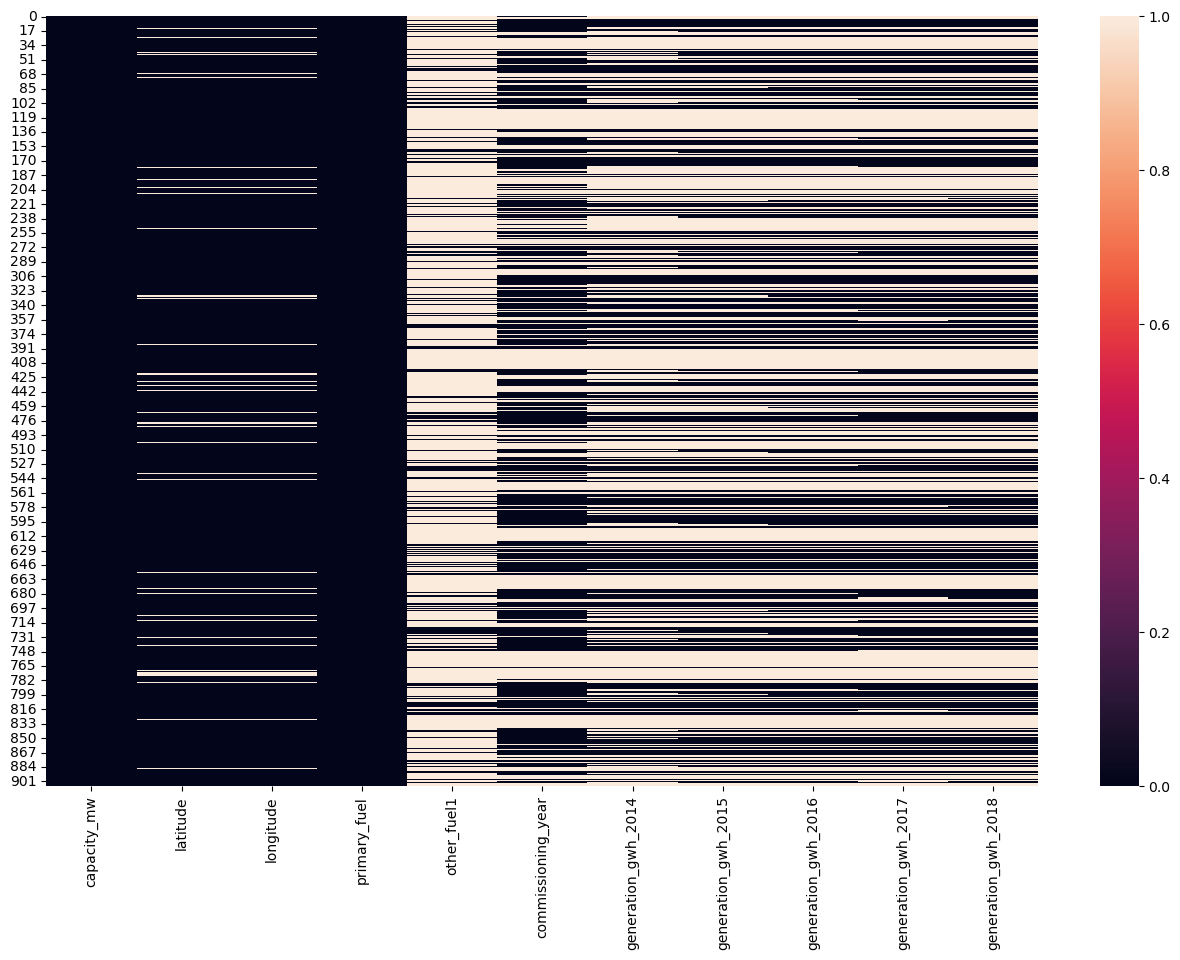

In [16]:
# Heatmap plot with null values
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [17]:
#Finding the percentage of data missing from the dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
null_values=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null=null_values.sort_values(by=["% Missing data"],ascending=False)
df_null=df_null.reset_index(drop=False)
df_null

Missing Values


index Data Type  Missing Values  % Missing data
0           other_fuel1    object             709            78.2
1   generation_gwh_2014   float64             509            56.1
2   generation_gwh_2015   float64             485            53.5
3   generation_gwh_2016   float64             473            52.1
4   generation_gwh_2017   float64             467            51.5
5   generation_gwh_2018   float64             459            50.6
6    commissioning_year   float64             380            41.9
7              latitude   float64              46             5.1
8             longitude   float64              46             5.1
9           capacity_mw   float64               0             0.0
10         primary_fuel    object               0             0.0

### Observations:
- **Features 'other_fuel1', has more than 60% of missing values hence, I will drop this column**
- **I am not dropping other columns with more than 50% of missing values as they are important for building the model. I will work on the imputation for these models**

In [18]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [19]:
df.head(3)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   
2         39.2   21.9038    69.3732         Wind                 NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN

In [20]:
df_1=df.copy()  

### Observations:

- **I need to perform imputation to fill missing/null values in the columns**
- **In this dataset (after dropping some columns), there are many missing values in the columns, hence I don't want to simply apply "simple imputer" to get the imputed dataset. Instead, I will apply various imputation techniques to impute the data.**
- **Then finally I will build ML models with each imputed dataset of all imputation techniques and check the metrics to decide the final imputed dataset to be considered for further processing**
- **In this project, I imputed the data using 3 imputation techniques 1. Simple Imputer 2. KNN Imputer 3. Multiple Iterative Imputer**
- **Before imputing the dataset, I need to encode categorical data as KNN Imputer can't use string data for imputation**

# Encoding of Categorical Features

In [21]:
df_categorical=['primary_fuel']

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate LabelEncoder
mappings = {}
for i in df_categorical:
    df_1[i] = le.fit_transform(df_1[i])
    
    # print the mapping of categories to integers for the current column
    print(f"{i}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # add the mapping of categories to integers to the dictionary
    mappings[f"{i}_num"] = list(range(len(le.classes_)))
    mappings[f"{i}_cat"] = list(le.classes_)
    
print("="*125)    
# print the mappings
for key, value in mappings.items():
    print(f"{key}: {value}")
print("="*125)
    
df_1.head()

primary_fuel: {'Biomass': 0, 'Coal': 1, 'Gas': 2, 'Hydro': 3, 'Nuclear': 4, 'Oil': 5, 'Solar': 6, 'Wind': 7}
primary_fuel_num: [0, 1, 2, 3, 4, 5, 6, 7]
primary_fuel_cat: ['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']


capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1                 NaN   
2         39.2   21.9038    69.3732             7                 NaN   
3        135.0   23.8712    91.3602             2              2004.0   
4       1800.0   21.9603    82.4091             1              2015.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [22]:
# Sorting the columns based on the datatype
df_1.columns.to_series().groupby(df_1.dtypes).groups

{int32: ['primary_fuel'], float64: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']}

### Notes before Imputation:

- **Here, I am trying 3 imputation techniques. I will choose the best one out of these 3 techniques (Simple Imputer, KNN Imputer, Multiple Iterative Imputer) by checking the score from each model**
- **Before imputation, I am splitting the data into train and test data. Then I am doing imputation on both train and test data. I am doing this splitting to make sure that the same set of train and test data goes into all threee ML models after imputation.**
- **Comarison of model scores make more sense with splitting of the data before imputation and again I am using same algorithm on all 3 imputed datasets such that the comparison is right**
- **In this project, I need to peform both regression and classification tasks hence I am going to perform all the above steps for both regression and classification tasks as the target variables are different. The imputed datasets can be different between regression and classification tasks for KNN Imputer and Multiple Iterative Imputer as the imputation of a particular column depends on other columns of the dataset, however for Simple Imputer, the imputed datasets will be same between regression and classification tasks as the imputation is done on each colum independently**

# Missing values Imputation - Simple Imputer

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score

#############################################################################################################

# Simple Imputation for REGRESSION Task
reg_target=['capacity_mw']

regression_imputed_data = {}  # Creating a dictionary to store the data for all 3 imputation techniques

# Split dataset into training and testing sets for regression task
train_reg, test_reg = train_test_split(df_1, test_size=0.2, random_state=42, stratify=None, shuffle=True)
train_reg_X = train_reg.drop(columns=['capacity_mw'])
train_reg_y = train_reg['capacity_mw']
test_reg_X = test_reg.drop(columns=['capacity_mw'])
test_reg_y = test_reg['capacity_mw']


# create separate lists for columns with different imputation strategies
mode_cols = ['primary_fuel','commissioning_year']
median_cols = ['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# create an empty dataframes to hold imputed values
train_reg_X_imputed = pd.DataFrame()
test_reg_X_imputed = pd.DataFrame()

# apply simple imputer with median strategy to median_cols for both train and test data
median_imputer = SimpleImputer(strategy='median')
train_reg_X_imputed[median_cols] = median_imputer.fit_transform(train_reg_X[median_cols])
test_reg_X_imputed[median_cols] = median_imputer.transform(test_reg_X[median_cols])


# apply simple imputer with most_frequent strategy to mode_cols for both train and test
mode_imputer = SimpleImputer(strategy='most_frequent')
train_reg_X_imputed[mode_cols] = mode_imputer.fit_transform(train_reg_X[mode_cols])
test_reg_X_imputed[mode_cols] = mode_imputer.transform(test_reg_X[mode_cols])

# Store imputed data in a single dataframe
train_test_reg_X_imputed = np.concatenate((train_reg_X_imputed, test_reg_X_imputed), axis=0)
train_test_reg_y_imputed = np.concatenate((train_reg_y, test_reg_y), axis=0)
regression_imputed_data["Simple Imputer"] = pd.DataFrame(np.concatenate((train_test_reg_X_imputed, train_test_reg_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_reg_X_imputed.columns.tolist() + reg_target)

# Train regression model on imputed training data and evaluate on imputed testing data
regressor = RandomForestRegressor(random_state=42)
regressor.fit(train_reg_X_imputed, train_reg_y)
r2_sir = r2_score(regressor.predict(test_reg_X_imputed), test_reg_y)
cv_scores_sir = cross_val_score(regressor, train_reg_X_imputed, train_reg_y, cv=5, scoring='r2')
print("Simple Imputer", 'Regression Test R2 score:', round(r2_sir,2),",", 'CV R2 score:', round(np.mean(cv_scores_sir),2))

print('-'*100)

##############################################################################################################

# Simple Imputation for CLASSIFICATION Task
class_target=['primary_fuel']

classification_imputed_data = {}  # Creating a dictionary to store the data for all 3 imputation techniques

# Split dataset into training and testing sets for classification task
train_class, test_class = train_test_split(df_1, test_size=0.2, random_state=42, stratify=None, shuffle=True)
train_class_X = train_class.drop(columns=['primary_fuel'])
train_class_y = train_class['primary_fuel']
test_class_X = test_class.drop(columns=['primary_fuel'])
test_class_y = test_class['primary_fuel']

# create separate lists for columns with different imputation strategies
mode_cols = ['commissioning_year']
median_cols = ['capacity_mw','latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# create an empty dataframes to hold imputed values
train_class_X_imputed = pd.DataFrame()
test_class_X_imputed = pd.DataFrame()

# apply simple imputer with median strategy to median_cols for both train and test data
median_imputer = SimpleImputer(strategy='median')
train_class_X_imputed[median_cols] = median_imputer.fit_transform(train_class_X[median_cols])
test_class_X_imputed[median_cols] = median_imputer.transform(test_class_X[median_cols])

# apply simple imputer with most_frequent strategy to mode_cols for both train and test
mode_imputer = SimpleImputer(strategy='most_frequent')
train_class_X_imputed[mode_cols] = mode_imputer.fit_transform(train_class_X[mode_cols])
test_class_X_imputed[mode_cols] = mode_imputer.transform(test_class_X[mode_cols])

# Store imputed data in a single dataframe
train_test_class_X_imputed = np.concatenate((train_class_X_imputed, test_class_X_imputed), axis=0)
train_test_class_y_imputed = np.concatenate((train_class_y, test_class_y), axis=0)
classification_imputed_data["Simple Imputer"] = pd.DataFrame(np.concatenate((train_test_class_X_imputed, train_test_class_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_class_X_imputed.columns.tolist() + class_target)

# Train classification model on imputed training data and evaluate on imputed testing data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_class_X_imputed, train_class_y)
accuracy_sic = accuracy_score(classifier.predict(test_class_X_imputed), test_class_y)
cv_scores_sic = cross_val_score(classifier, train_class_X_imputed, train_class_y, cv=5, scoring='accuracy')
print("Simple Imputer", 'Classification Test Accuracy:', round(accuracy_sic,2),",", 'CV Accuracy:', round(np.mean(cv_scores_sic),2))

Simple Imputer Regression Test R2 score: 0.85 , CV R2 score: 0.87
----------------------------------------------------------------------------------------------------
Simple Imputer Classification Test Accuracy: 0.79 , CV Accuracy: 0.78


# Missing values Imputation - KNN and Multi Iterative Imputer

In [24]:
# Define imputation techniques 
imputation_techniques = [
    ('KNN Imputer', KNNImputer(n_neighbors=5)),
    ('Multiple Iterative Imputer', IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), max_iter=10))
]  # Used Random Forest Regressor for Multiple Iterative Imputer

print("Simple Imputer", 'Regression Test R2 score:', round(r2_sir,2),",", 'CV R2 score:', round(np.mean(cv_scores_sir),2))
# Impute both train and test data for REGRESSION task

for name, imputer in imputation_techniques:
    # Apply imputation technique to training and testing data
    imputer.fit(train_reg_X)
    train_reg_X_imputed = imputer.transform(train_reg_X)
    test_reg_X_imputed = imputer.transform(test_reg_X)

    # Store imputed data in a single dataframe
    train_test_reg_X_imputed = np.concatenate((train_reg_X_imputed, test_reg_X_imputed), axis=0)
    train_test_reg_y_imputed = np.concatenate((train_reg_y, test_reg_y), axis=0)
    regression_imputed_data[name] = pd.DataFrame(np.concatenate((train_test_reg_X_imputed, train_test_reg_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_reg_X.columns.tolist() + reg_target)

    # Train regression model on imputed training data and evaluate on imputed testing data
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(train_reg_X_imputed, train_reg_y)
    r2 = r2_score(regressor.predict(test_reg_X_imputed), test_reg_y)
    cv_scores = cross_val_score(regressor, train_reg_X_imputed, train_reg_y, cv=5, scoring='r2')
    print(name, 'Regression Test R2 score:', round(r2,2),",", 'CV R2 score:', round(np.mean(cv_scores),2))

print('-'*100)


print("Simple Imputer", 'Classification Test Accuracy:', round(accuracy_sic,2),",", 'CV Accuracy:', round(np.mean(cv_scores_sic),2))
# Impute both train and test data for CLASSIFICATION task

for name, imputer in imputation_techniques:
    # Apply imputation technique to training and testing data
    imputer.fit(train_class_X)
    train_class_X_imputed = imputer.transform(train_class_X)
    test_class_X_imputed = imputer.transform(test_class_X)
    
    # Store imputed data in a single dataframe
    train_test_class_X_imputed = np.concatenate((train_class_X_imputed, test_class_X_imputed), axis=0)
    train_test_class_y_imputed = np.concatenate((train_class_y, test_class_y), axis=0)
    classification_imputed_data[name] = pd.DataFrame(np.concatenate((train_test_class_X_imputed, train_test_class_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_class_X.columns.tolist() + class_target)
    
    # Train classification model on imputed training data and evaluate on imputed testing data
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(train_class_X_imputed, train_class_y)
    accuracy = accuracy_score(classifier.predict(test_class_X_imputed), test_class_y)
    cv_scores = cross_val_score(classifier, train_class_X_imputed, train_class_y, cv=5, scoring='accuracy')
    print(name, 'Classification Test Accuracy:', round(accuracy,2),",", 'CV Accuracy:', round(np.mean(cv_scores),2))

Simple Imputer Regression Test R2 score: 0.85 , CV R2 score: 0.87
KNN Imputer Regression Test R2 score: 0.77 , CV R2 score: 0.81
Multiple Iterative Imputer Regression Test R2 score: 0.84 , CV R2 score: 0.84
----------------------------------------------------------------------------------------------------
Simple Imputer Classification Test Accuracy: 0.79 , CV Accuracy: 0.78
KNN Imputer Classification Test Accuracy: 0.75 , CV Accuracy: 0.7
Multiple Iterative Imputer Classification Test Accuracy: 0.73 , CV Accuracy: 0.72


### Observations:

- **Simple Imputer Regression Test R2 score: 0.85 , CV R2 score: 0.87**
- **KNN Imputer Regression Test R2 score: 0.77 , CV R2 score: 0.81**
- **Multiple Iterative Imputer Regression Test R2 score: 0.84 , CV R2 score: 0.84**
- **----------------------------------------------------------------------------------------------------------------------**
- **Simple Imputer Classification Test Accuracy: 0.79 , CV Accuracy: 0.78**
- **KNN Imputer Classification Test Accuracy: 0.75 , CV Accuracy: 0.7**
- **Multiple Iterative Imputer Classification Test Accuracy: 0.73 , CV Accuracy: 0.72**
- **-----------------------------------------------------------------------------------------------------------------------**
- **Simple Imputer score values are better than other imputation techniques (KNN and Multi Iterative Imputers) for both regression and classification tasks, hence considering the imputed data from "Simple Imputer" for EDA and building the model** 

In [25]:
regression_imputed_data["Simple Imputer"].head()

latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0   21.5837    72.2222           844.113738            749.26485   
1   21.0782    77.9009          1920.971000           5629.66300   
2   23.9151    71.9424           844.113738            749.26485   
3   21.8948    76.6814           844.113738            749.26485   
4   21.8948    76.6814           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   
3             827.7405           868.042975            833.70055   
4             827.7405           868.042975            833.70055   

   primary_fuel  commissioning_year  capacity_mw  
0           1.0              2016.0        500.0  
1           1.0              2014.0       1350.0  
2           6.0              2015.0         15.2  
3           6.0              2014.0         28.0  
4           3.0              1949.0          9.3

In [26]:
classification_imputed_data["Simple Imputer"].head(5)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   
3         28.0   21.8948    76.6814           844.113738            749.26485   
4          9.3   21.8948    76.6814           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   
3             827.7405           868.042975            833.70055   
4             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0           1.0  
1              2014.0           1.0  
2              2015.0           6.0  
3              2014.0           6.0  
4              1949.0           3.0

In [27]:
# As I have decided to use simple imputer, then imputed data should be same between regression and classification tasks,
# Here I am copying the imputed dataset from classification task into df_2 for further processing
df_2=classification_imputed_data["Simple Imputer"].copy()
df_2.head()

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   
3         28.0   21.8948    76.6814           844.113738            749.26485   
4          9.3   21.8948    76.6814           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   
3             827.7405           868.042975            833.70055   
4             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0           1.0  
1              2014.0           1.0  
2              2015.0           6.0  
3              2014.0           6.0  
4              1949.0           3.0

## ** Imputation is completed **

## For EDA purpose, for all categorical features, mapping the categorical names to encoded numbers

In [28]:
# In this step, I am mapping the target variable names to to encoded numbers in the imputed dataset for EDA purpose

# Dictionary mapping each number to a name for target variable

primary_fuel = {
    0: "Biomass",
    1: "Coal",
    2: "Gas",
    3: "Hydro",
    4: "Nuclear",
    5: "Oil",
    6: "Solar",
    7: "Wind"
}  

# map each number in the "primary_fuel" column to its corresponding name using the "primary_fuel" dictionary
df_2["primary_fuel"] = df_2["primary_fuel"].map(primary_fuel)

# convert the "primary_fuel" column to object data type using the astype method
df_2["primary_fuel"] = df_2["primary_fuel"].astype(str)

df_2["primary_fuel"].head()

0     Coal
1     Coal
2    Solar
3    Solar
4    Hydro
Name: primary_fuel, dtype: object

# Segregating columns based on data type for better EDA

In [29]:
df_3=df_2.copy()

In [30]:
# Sorting the columns based on the datatype
df_3.columns.to_series().groupby(df_3.dtypes).groups

{float64: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'commissioning_year'], object: ['primary_fuel']}

In [31]:
df_categorical=['primary_fuel']
df_numerical=['capacity_mw', 'latitude', 'longitude', 'commissioning_year',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

In [32]:
df_numerical=df_3[df_numerical]
df_categorical=df_3[df_categorical]

# Statistical Summary:

In [33]:
# Statistical summary for numerical data
df_numerical.describe().T

count         mean          std        min          25%  \
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.233262     6.081073     8.1689    17.072000   
longitude            907.0    77.425170     4.815364    68.6447    74.388900   
commissioning_year   907.0  2004.594267    15.734928  1927.0000  1998.000000   
generation_gwh_2014  907.0  1540.815525  2779.475127     0.0000   844.113738   
generation_gwh_2015  907.0  1530.435748  2979.593916     0.0000   749.264850   
generation_gwh_2016  907.0  1612.575362  2992.375205     0.0000   827.740500   
generation_gwh_2017  907.0  1682.899849  3039.850258     0.0000   868.042975   
generation_gwh_2018  907.0  1706.536702  3157.088505     0.0000   824.842340   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.894800    25.176450     34.649  
longitude              76.681400    79.206100     95.408  
commissioning_year   2014.000000  2015.000000   2018.000  
generation_gwh_2014   844.113738   844.113738  28127.000  
generation_gwh_2015   749.264850   749.264850  30539.000  
generation_gwh_2016   827.740500   827.740500  30015.000  
generation_gwh_2017   868.042975   868.042975  35116.000  
generation_gwh_2018   833.700550   833.700550  35136.000

#### Observations:
- **count is same for all the columns.Hence,there are no null values**
- **Maximum capacity of a power plant is 4760mw and avg capacity is 326.22mw**
- **very less difference between mean and median for latitude and longitude shows very little skewness**
- **power plant was first put into operation and started generating electricity in 1927,and in 2018 a new power plant started operating**
- **Total amount of electricity generated by a power plant in gigawatt-hours (GWh) during the year 2018 is maximum 35136Gwh**
- **Electricity generated by a power plant is less in year 2014 when compared to remaining years**
- **Mean is greater than median for most of the features hence the data is right-skewed**
- **large difference between 75% and max shows the presence of outliers in dataset**

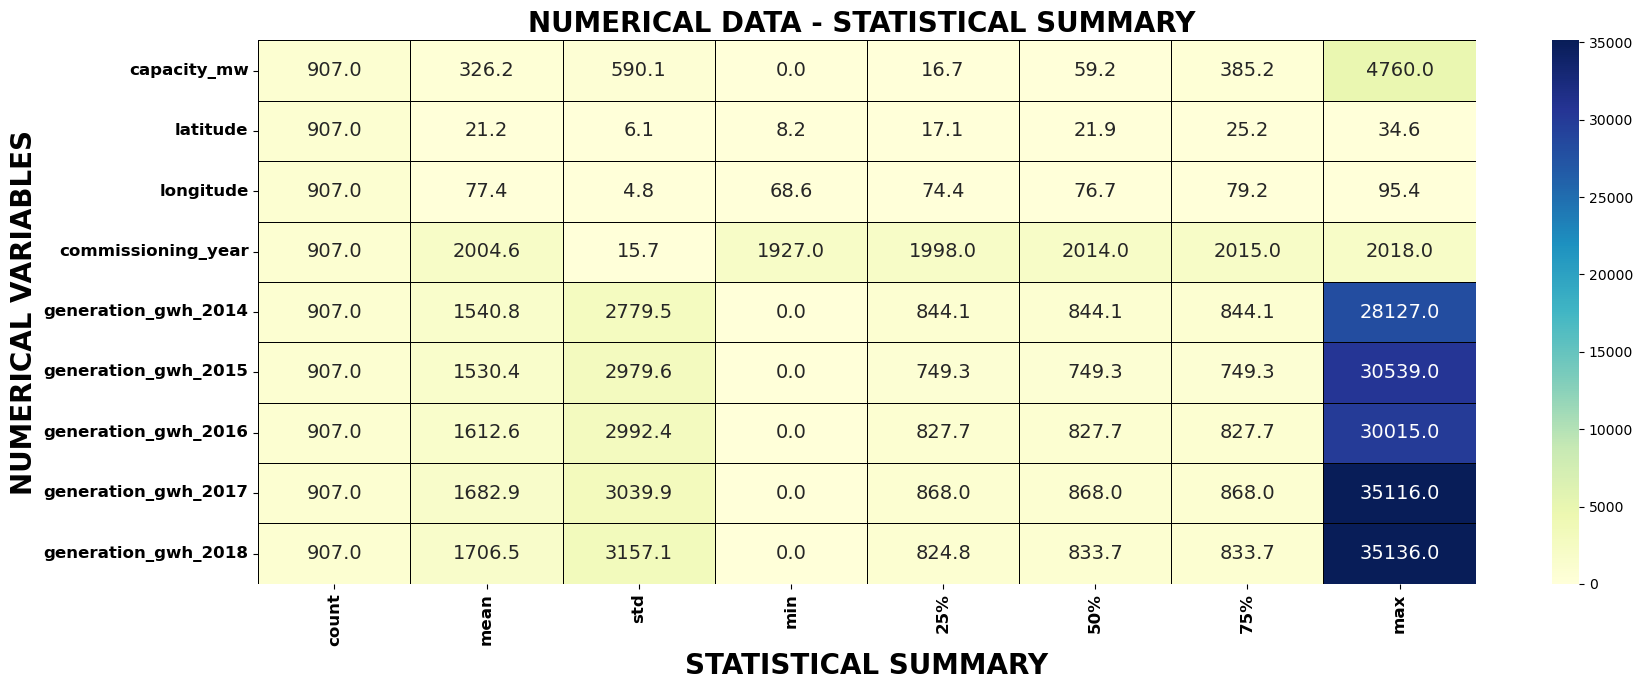

In [34]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(18,7))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

In [35]:
## Statistical summary for categorical data
df_categorical.describe(include='O').T

count unique   top freq
primary_fuel   907      8  Coal  258

#### Observations:
- **unique shows the uniqueness present in each column.Total 8 types of primary fuels are used for power generation**
- **Top indicates the mode of each column like coal is mode for primary fuel column**
- **Maximum capacity of a power plant is 4760mw and avg capacity is 326.22mw**
- **freq is frequency of model value in each columns**

# Visualization of data

### Univariate Graphical Analysis for Numerical data

In [36]:
len(df_numerical.columns)

9

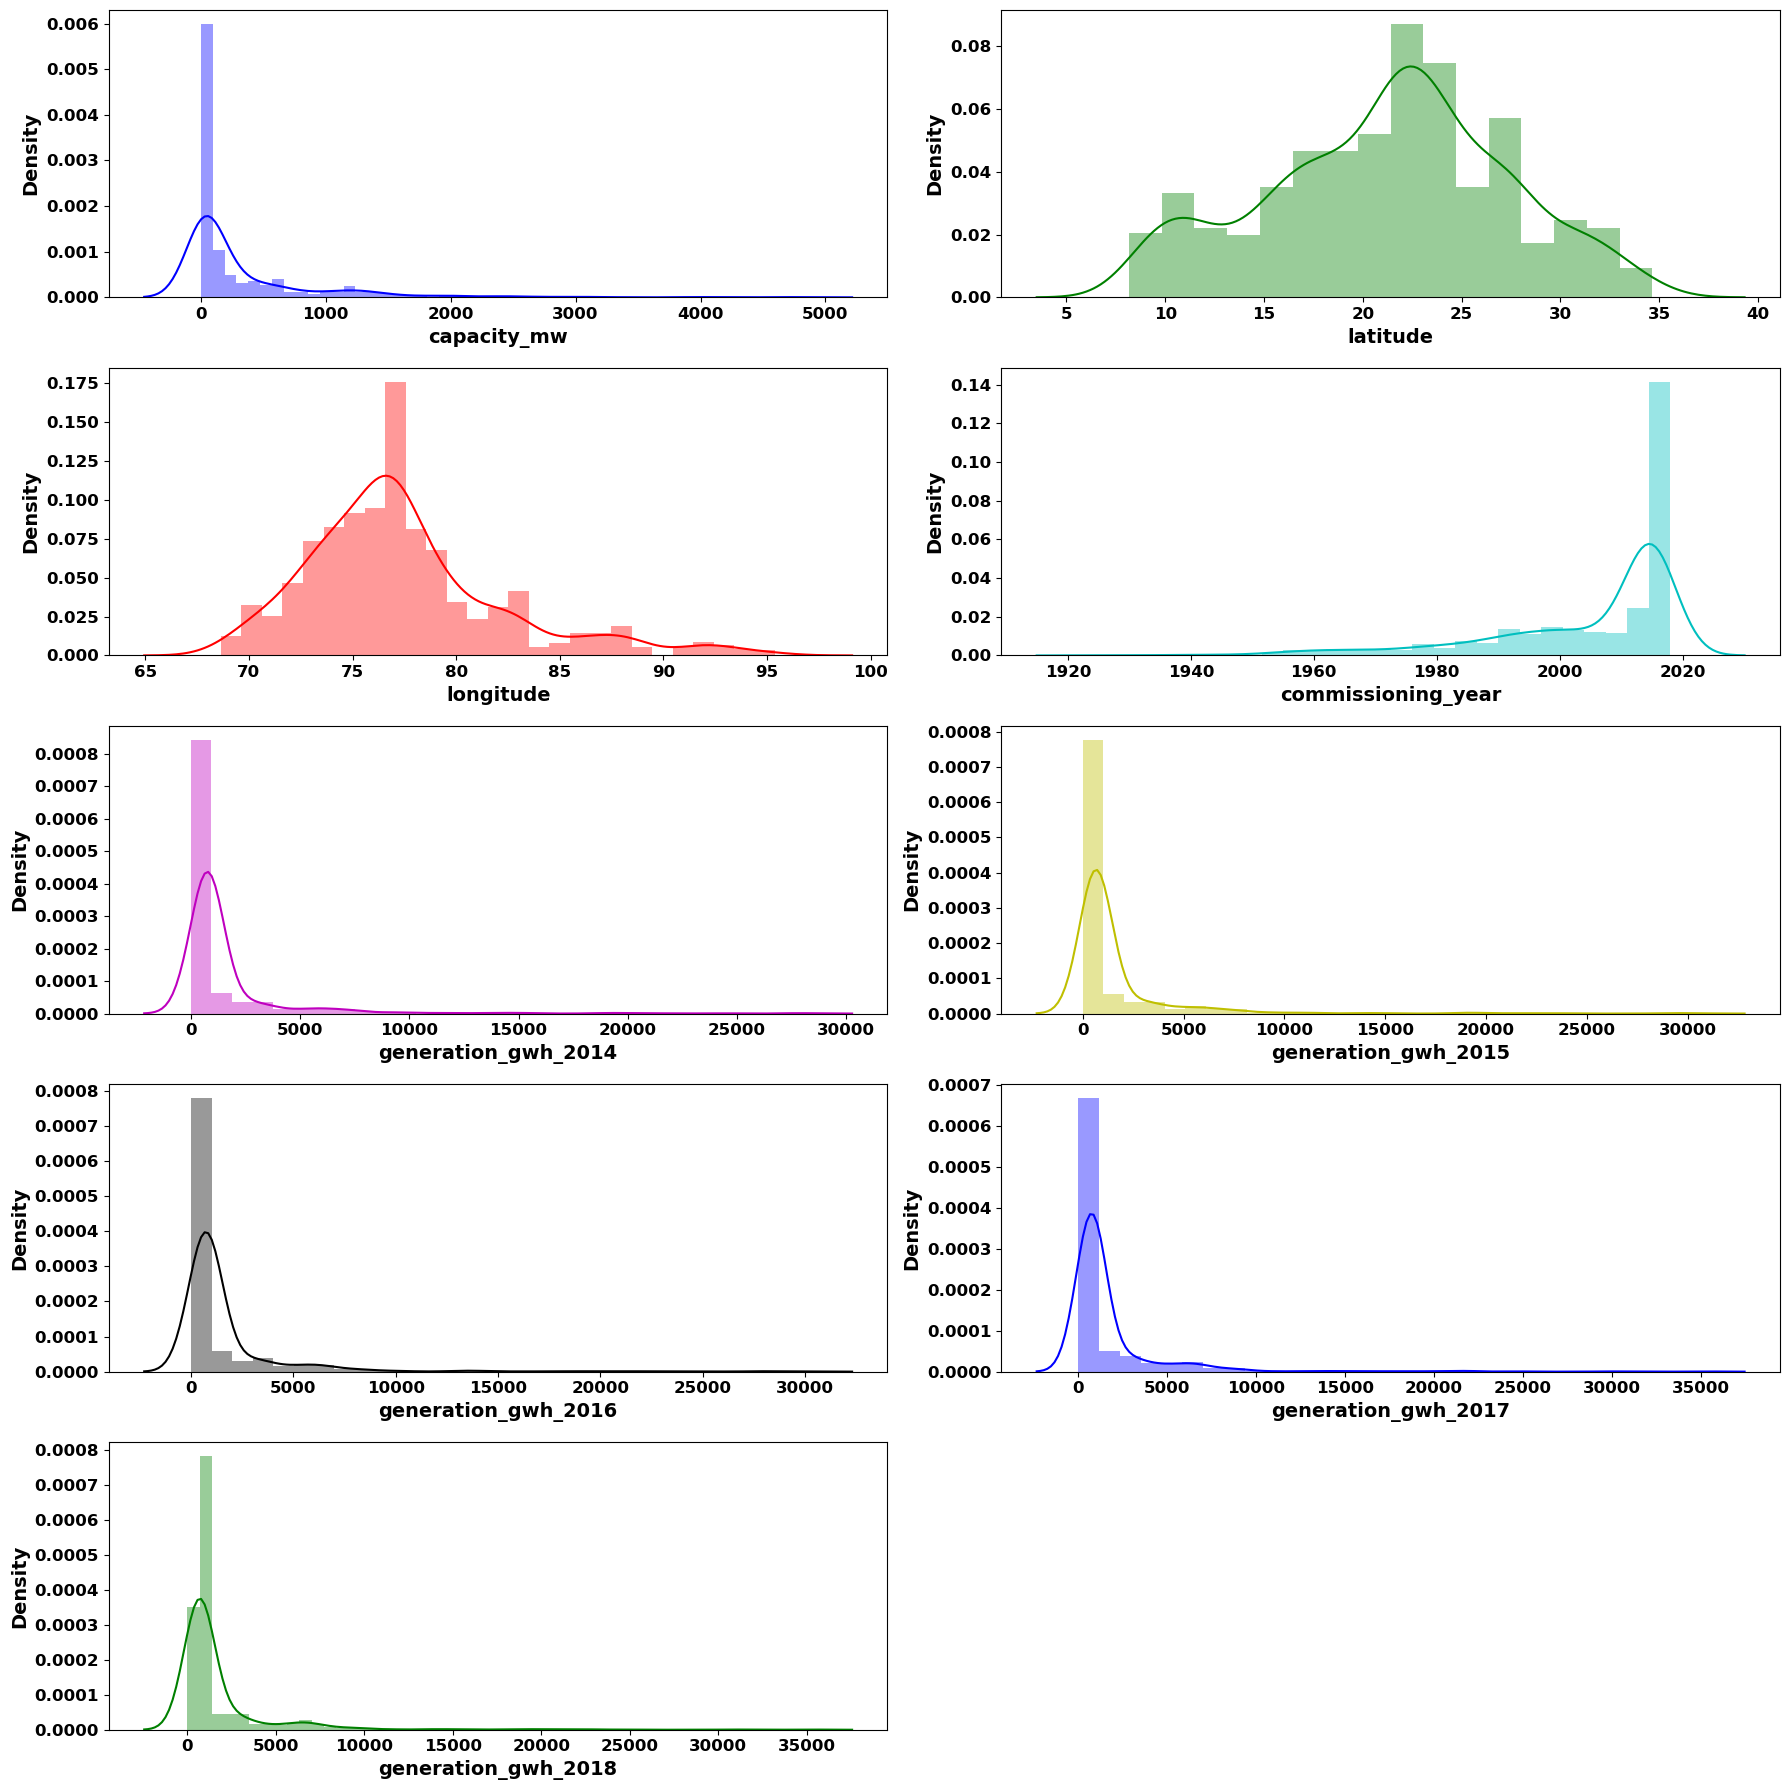

In [37]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,2,plotnum)
        sns.distplot(df_3[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **Amount of power generation increased in 2018 when compared to 2014.i.e,power generation increased along with the years**
- **commissioning_year represents the year in which the power plant was connected to the grid and began producing power for consumption.
many power plants started after 2000 year**
- **capacity of power plant varies from 0 to above 4000mw**


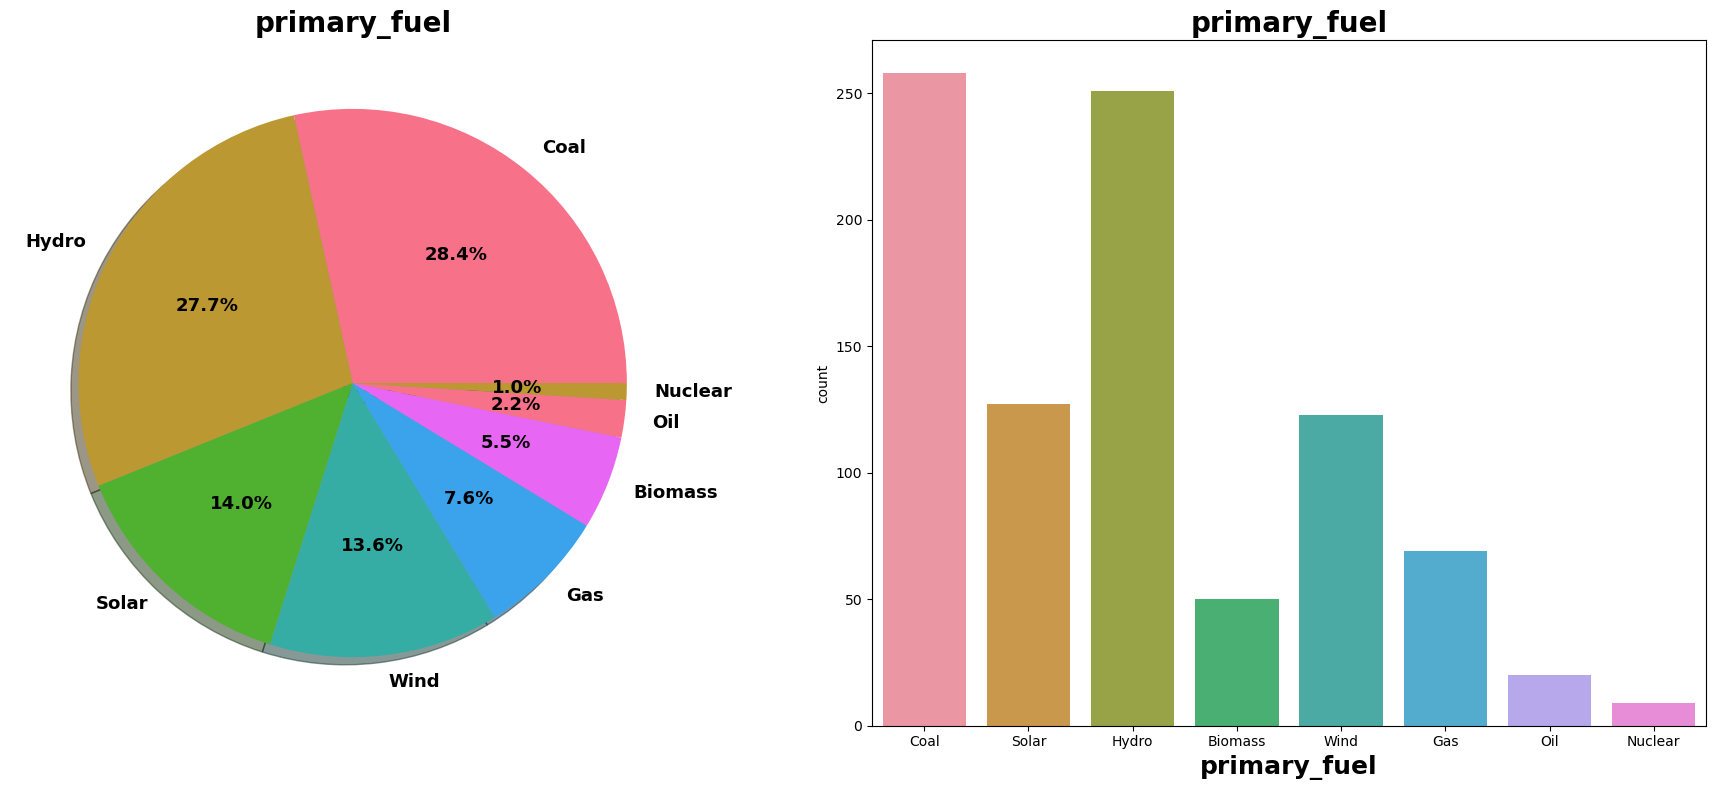

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df_3['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df_3,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- **primary fuel used in the power plant is coal with 28.4% next comes hydro power plant with 27.7%**
- **Nuclear power plants are only 1%**

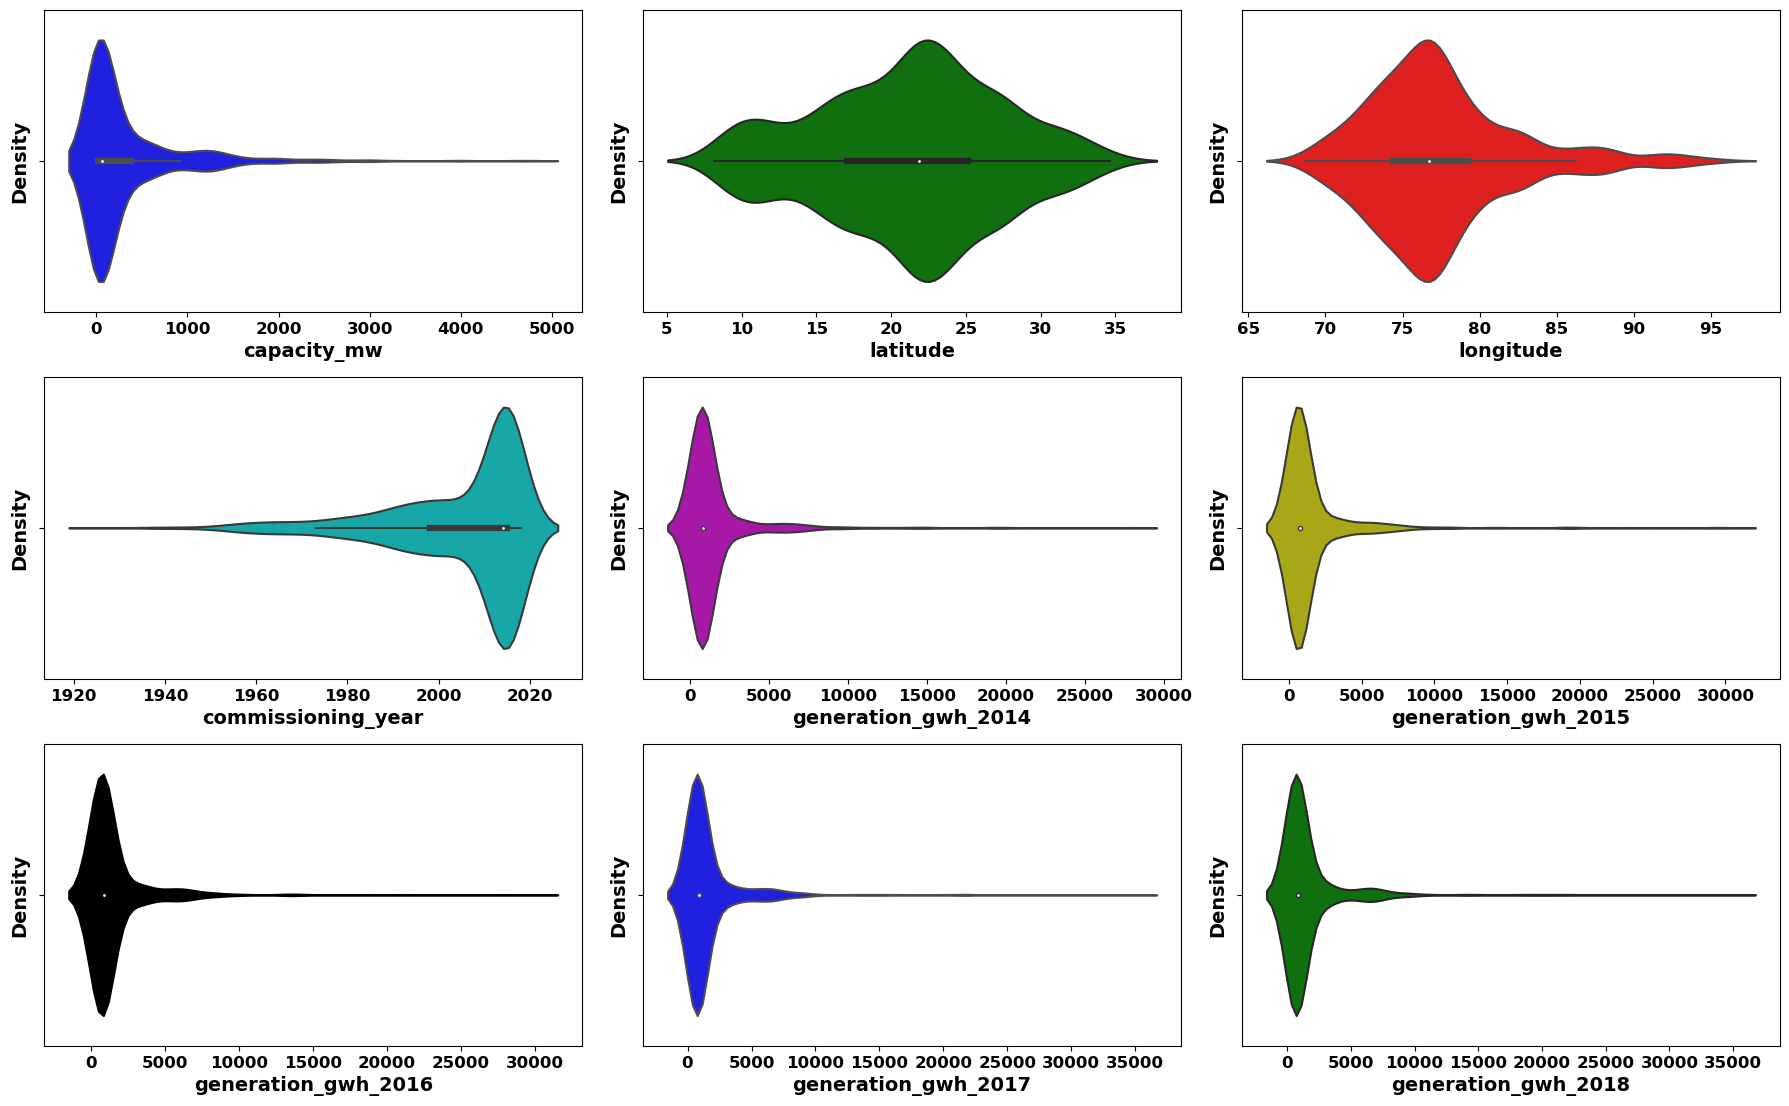

In [39]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,3,plotnum)
        sns.violinplot(df_3[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Bivariate Graphical Analysis 

In [40]:
df_numerical.shape

(907, 9)

In [41]:
df_num=df_numerical.columns
df_num

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

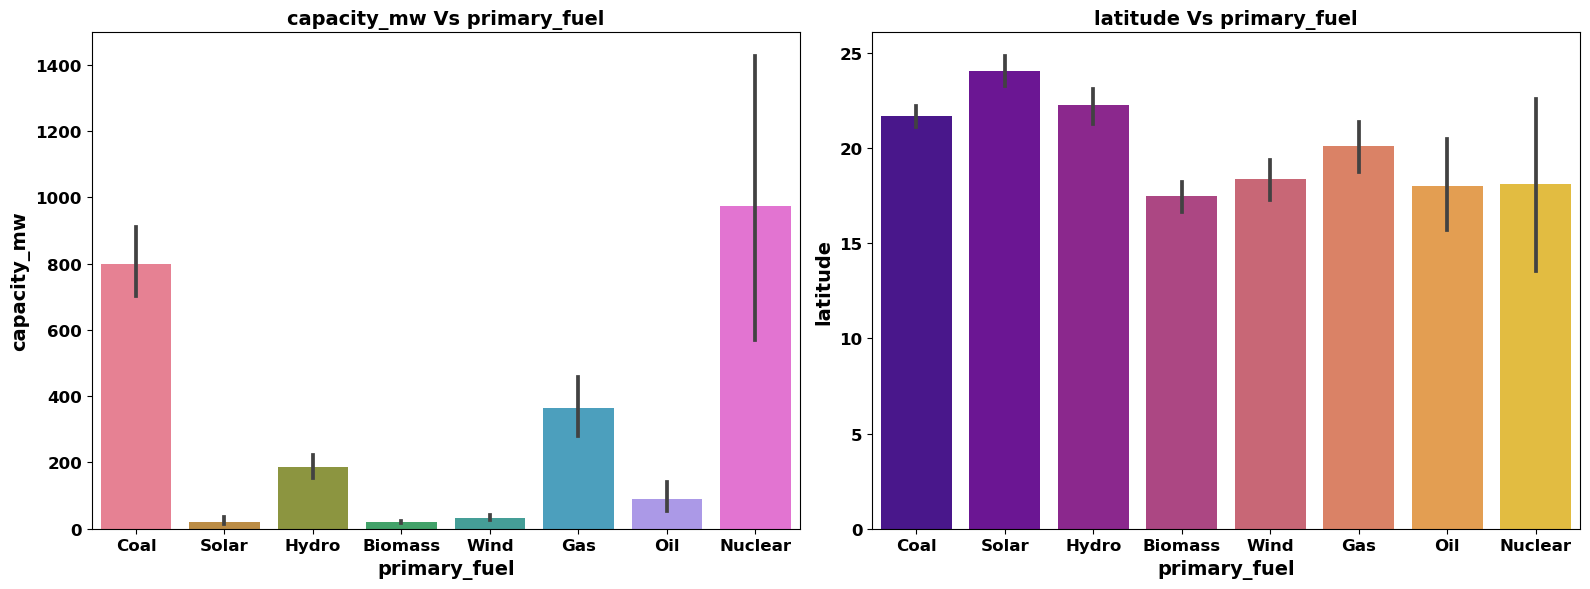

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[0]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df_3['primary_fuel'],df_3[df_num[1]], palette = 'plasma')
plt.title('{} Vs primary_fuel'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **The capacity of Nuclear power plant is more than other power plants.Next comes coal power plant**
- **power plants with solar and biomass are generating very less amount of power when compared to others**

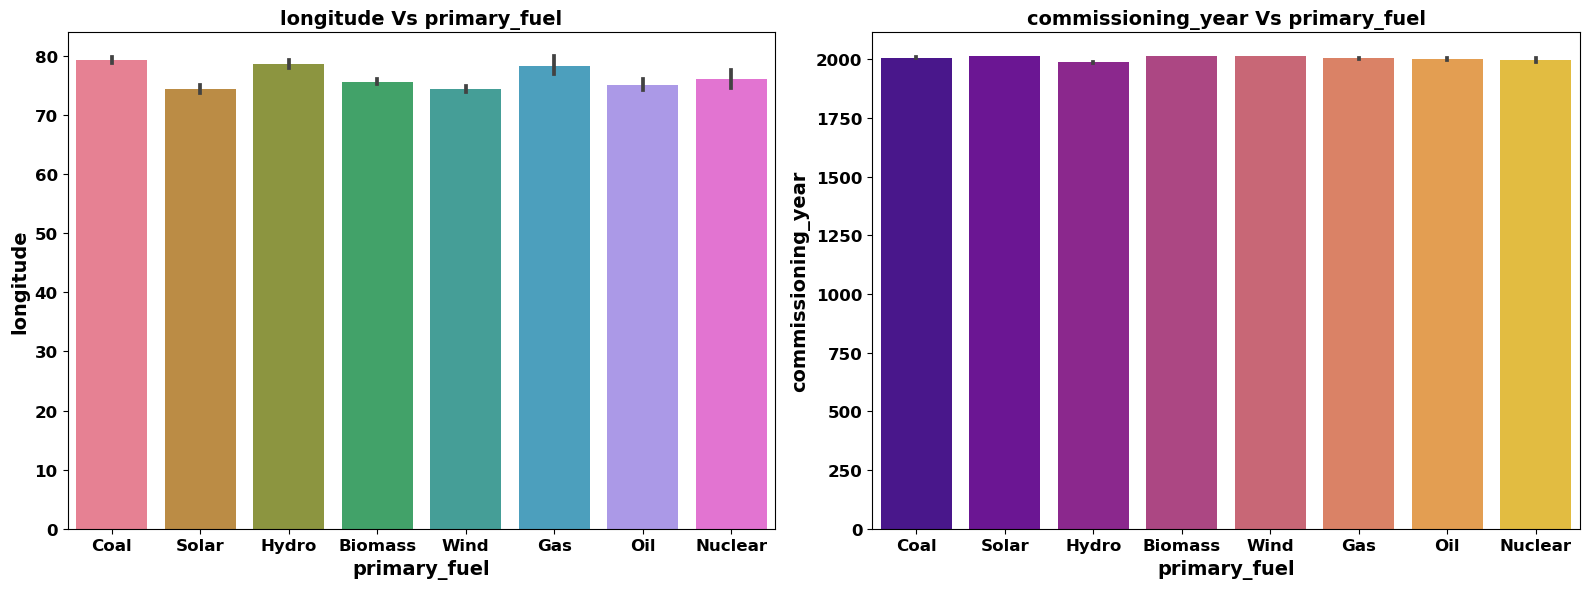

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[2]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[2]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df_3['primary_fuel'],df_3[df_num[3]], palette = 'plasma')
plt.title('{} Vs primary_fuel'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Different power plants with different fuels came into existence from 2000 year**

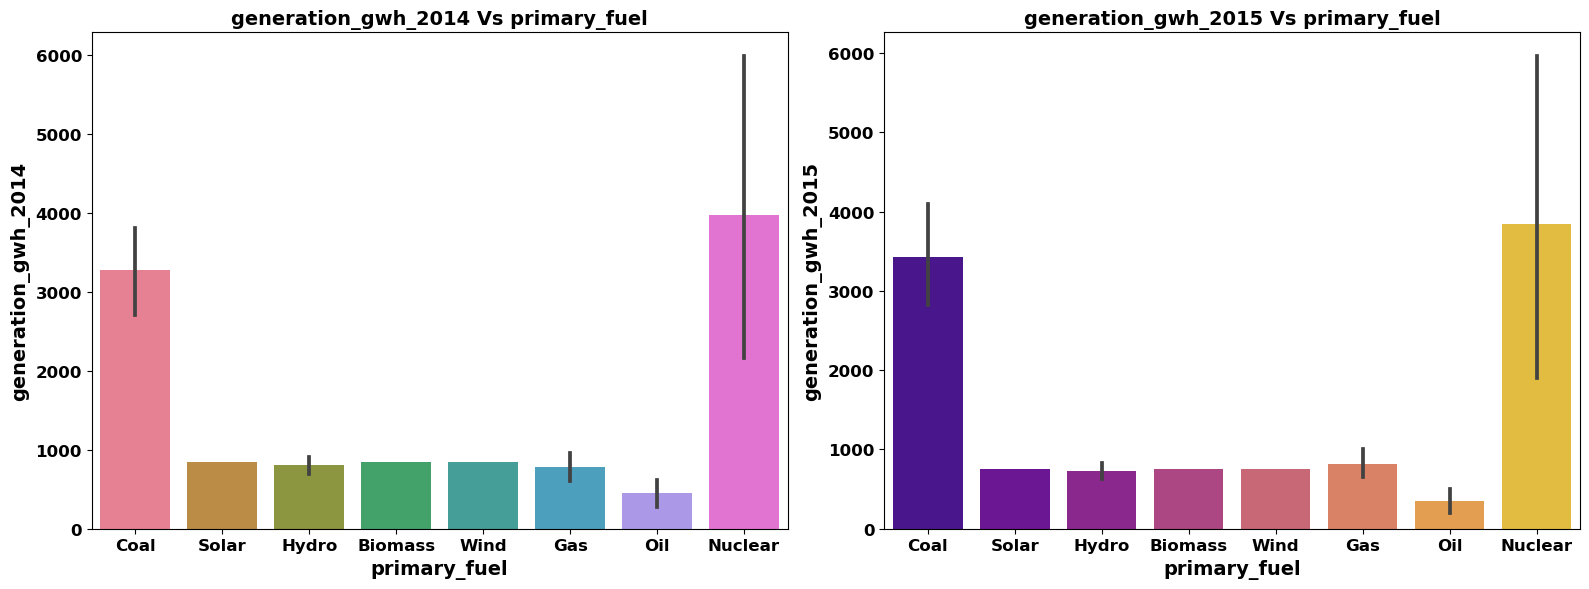

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[4]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[4]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df_3['primary_fuel'],df_3[df_num[5]], palette = 'plasma')
plt.title('{} Vs primary_fuel'.format(df_num[5]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **There is no much difference between power generation in year 2014 and 2015**
- **In both the years Nuclear power plant is generating more**

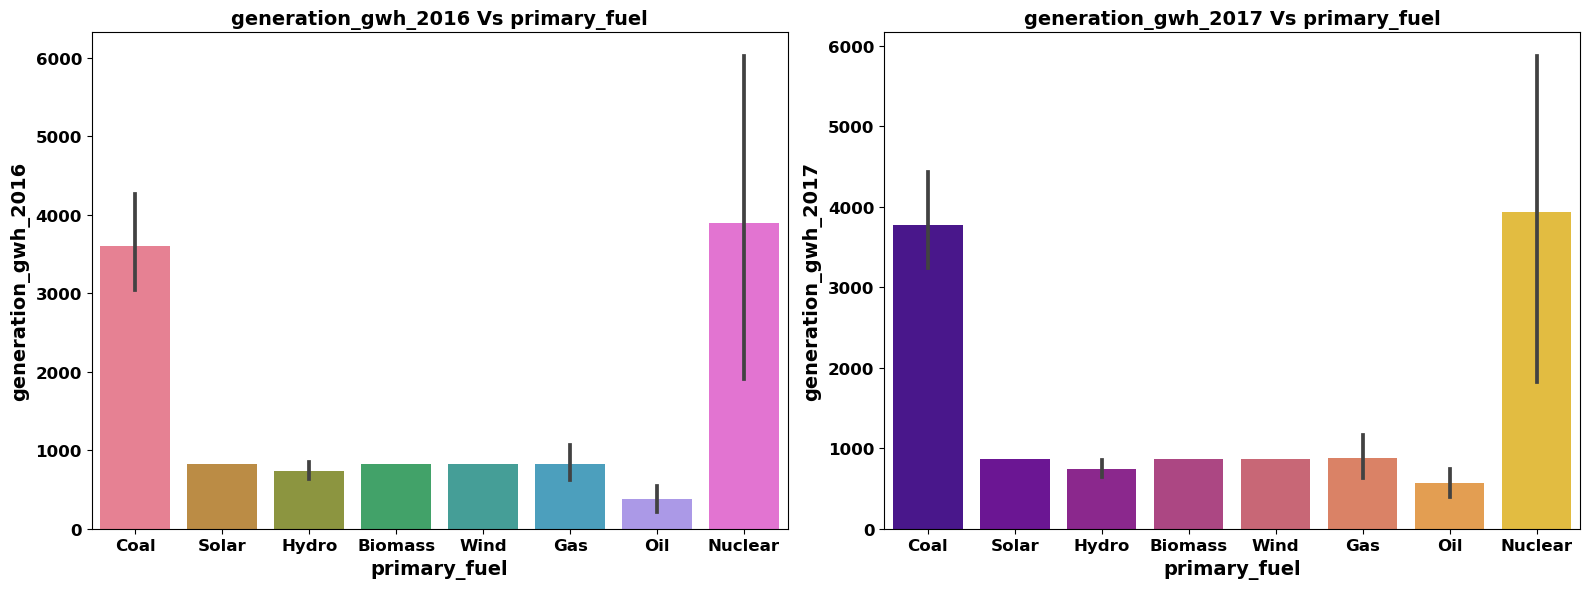

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[6]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[6]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[6], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df_3['primary_fuel'],df_3[df_num[7]], palette = 'plasma')
plt.title('{} Vs primary_fuel'.format(df_num[7]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[7], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Nuclear power plant is generating more in both 2016 and 2017 years**

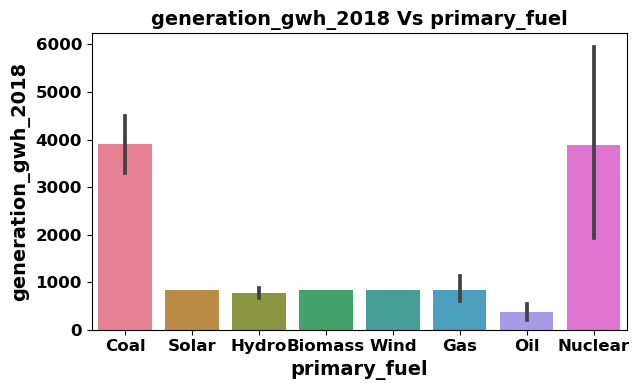

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[8]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[8]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[8], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **Nuclear power plant is generating more in almost all years.Next comes the coal based power plant.power plant with oil as primary fuel is generating less power in all the years**

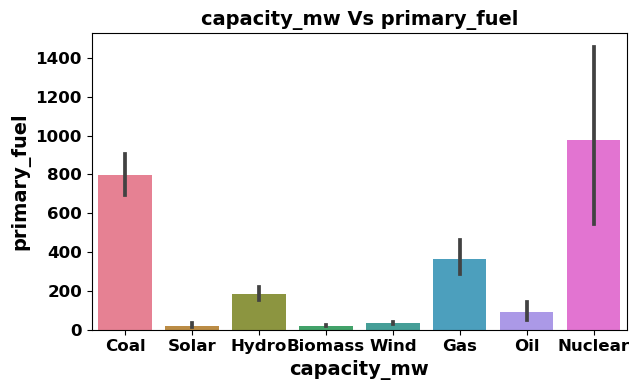

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(df_3['primary_fuel'],df_3[df_num[0]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.ylabel('primary_fuel', fontsize=14,fontweight='bold')
plt.xlabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **solar and Biomass power plants are generating less capacity.**

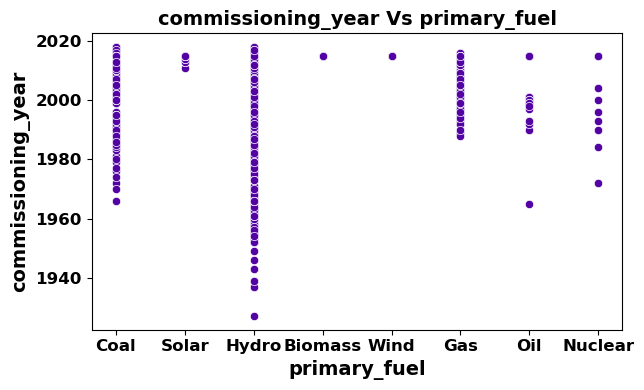

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df_3['primary_fuel'],df_3[df_num[3]], palette = 'husl')
plt.title('{} Vs primary_fuel'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel('primary_fuel', fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **Hydro power plants commissioning_year is before 1940.They came into existence before 1940**
- **solar,biomass and wind power plants started after 2000 year**
- **Nuclear power plants started around 1970's**

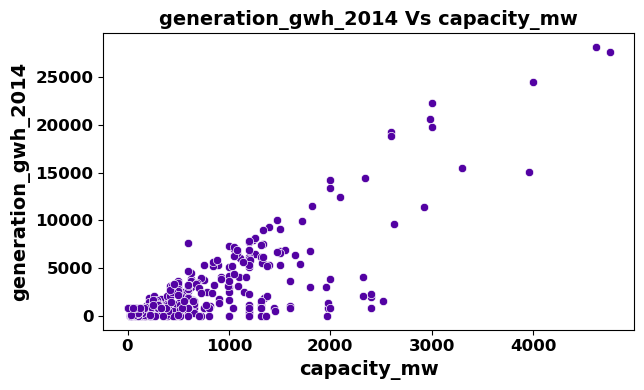

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df_3['capacity_mw'],df_3[df_num[4]], palette = 'husl')
plt.title('{} Vs capacity_mw'.format(df_num[4]),fontsize=14, fontweight='bold')
plt.xlabel('capacity_mw', fontsize=14,fontweight='bold')
plt.ylabel(df_num[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2014**
- **As the electricity generation growth increases, the capacity of plant also increases.**

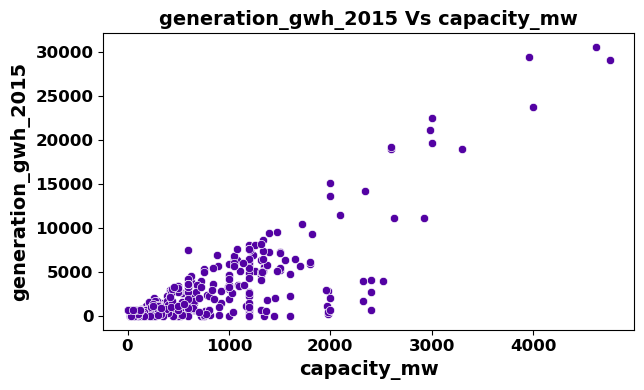

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df_3['capacity_mw'],df_3[df_num[5]], palette = 'hus3')
plt.title('{} Vs capacity_mw'.format(df_num[5]),fontsize=14, fontweight='bold')
plt.xlabel('capacity_mw', fontsize=14,fontweight='bold')
plt.ylabel(df_num[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2015**
- **As the electricity generation growth increases, the capacity of plant also increases.**

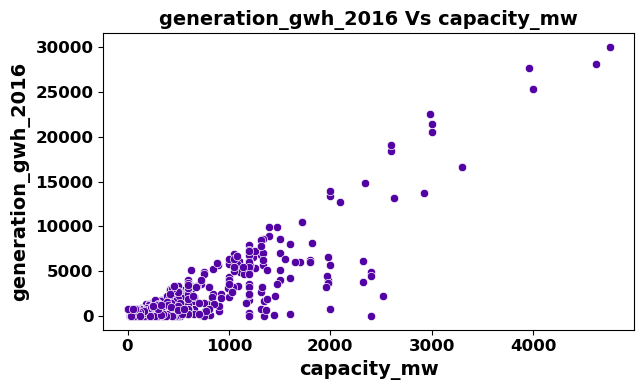

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df_3['capacity_mw'],df_3[df_num[6]], palette ='hue3')
plt.title('{} Vs capacity_mw'.format(df_num[6]),fontsize=14, fontweight='bold')
plt.xlabel('capacity_mw', fontsize=14,fontweight='bold')
plt.ylabel(df_num[6], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2016**
- **As the electricity generation growth increases, the capacity of plant also increases.**

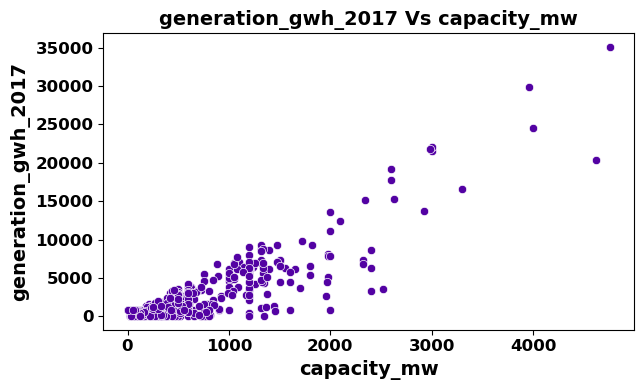

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df_3['capacity_mw'],df_3[df_num[7]], palette ='hue3')
plt.title('{} Vs capacity_mw'.format(df_num[7]),fontsize=14, fontweight='bold')
plt.xlabel('capacity_mw', fontsize=14,fontweight='bold')
plt.ylabel(df_num[7], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2017**
- **As the electricity generation growth increases, the capacity of plant also increases.**

### Multivariate Graphical Analysis

In [53]:
df_3.columns.to_series().groupby(df_3.dtypes).groups

{float64: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'commissioning_year'], object: ['primary_fuel']}

Text(0, 0.5, 'latitude')

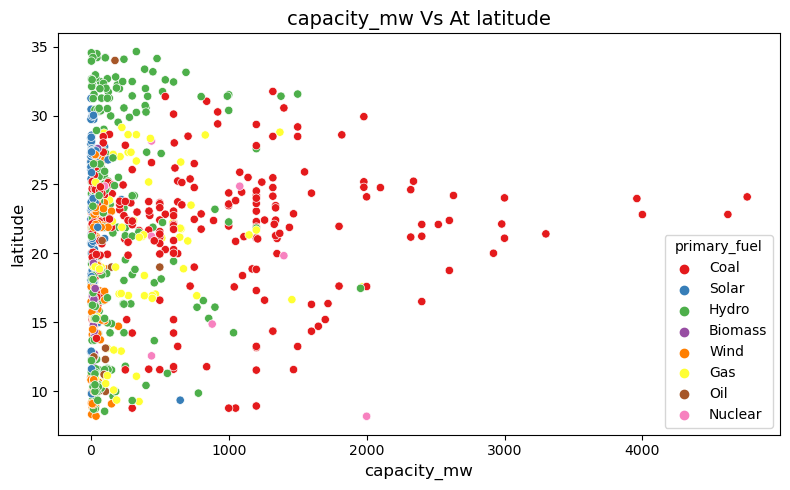

In [54]:
sns.set_palette('Set1')
plt.figure(figsize=[8,5])
plt.title('capacity_mw Vs At latitude',fontsize =14)
sns.scatterplot(df_3['capacity_mw'],df_3['latitude'],hue=df_3['primary_fuel'])
plt.xlabel('capacity_mw',fontsize =12)
plt.ylabel('latitude',fontsize =12)

#### Observation:
- **Location is important feature specially for Nuclear powerplants. These plants lies in between 10 to 35 latitude**
- **Most of the power plants are located between 20 to 25 latitude**

Text(0, 0.5, 'commissioning_year')

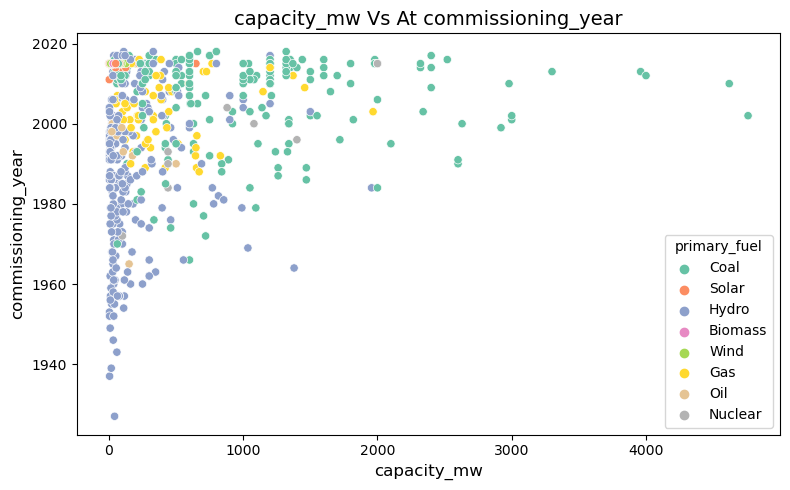

In [55]:
sns.set_palette('Set2')
plt.figure(figsize=[8,5])
plt.title('capacity_mw Vs At commissioning_year',fontsize =14)
sns.scatterplot(df_3['capacity_mw'],df_3['commissioning_year'],hue=df_3['primary_fuel'])
plt.xlabel('capacity_mw',fontsize =12)
plt.ylabel('commissioning_year',fontsize =12)

#### Observation:
- **More number of power plants started working with more capacity between 1990 to current year**
- **old power plants have less capacity when compared to new power plants**

Text(0, 0.5, 'generation_gwh_2014')

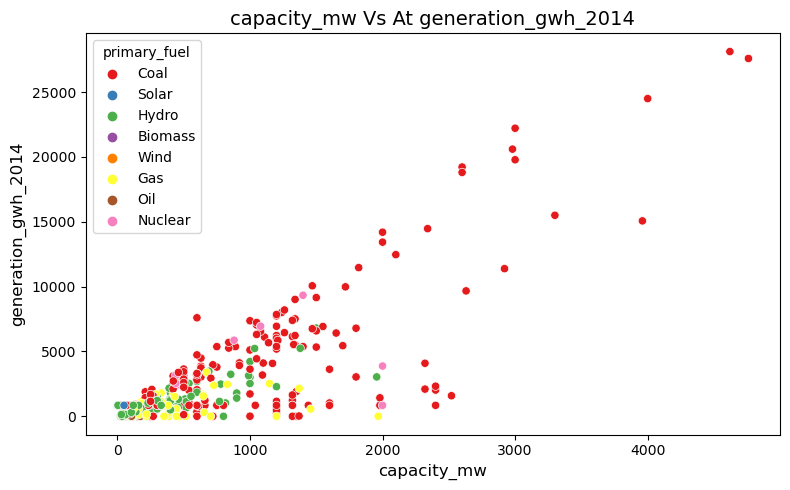

In [56]:
sns.set_palette('Set1')
plt.figure(figsize=[8,5])
plt.title('capacity_mw Vs At generation_gwh_2014',fontsize =14)
sns.scatterplot(df_3['capacity_mw'],df_3['generation_gwh_2014'],hue=df_3['primary_fuel'])
plt.xlabel('capacity_mw',fontsize =12)
plt.ylabel('generation_gwh_2014',fontsize =12)

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2014**
- **As the electricity generation increases, the capacity of plant also increases.**
- **coal is the fuel which is widely used in many power plants**

Text(0, 0.5, 'generation_gwh_2018')

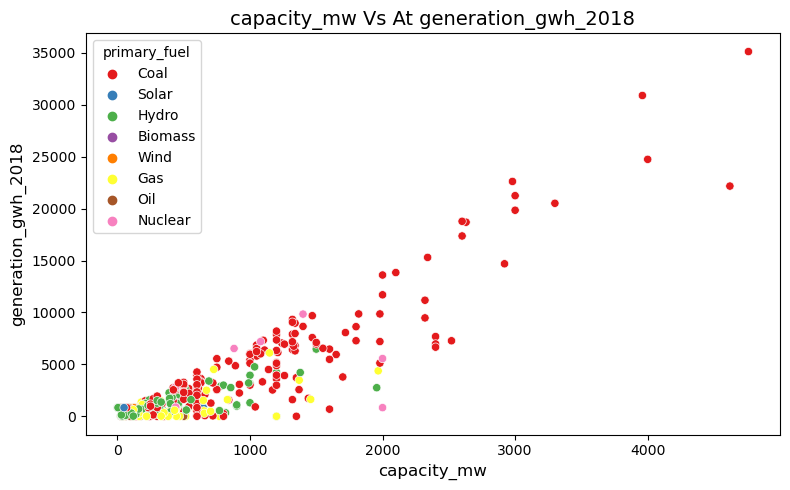

In [57]:
sns.set_palette('Set1')
plt.figure(figsize=[8,5])
plt.title('capacity_mw Vs At generation_gwh_2018',fontsize =14)
sns.scatterplot(df_3['capacity_mw'],df_3['generation_gwh_2018'],hue=df_3['primary_fuel'])
plt.xlabel('capacity_mw',fontsize =12)
plt.ylabel('generation_gwh_2018',fontsize =12)

#### Observation:
- **We can see positive relationship with capacity and generation of power in 2018**
- **As the electricity generation increases, the capacity of plant also increases.**
- **coal is the fuel which is widely used in many power plants**

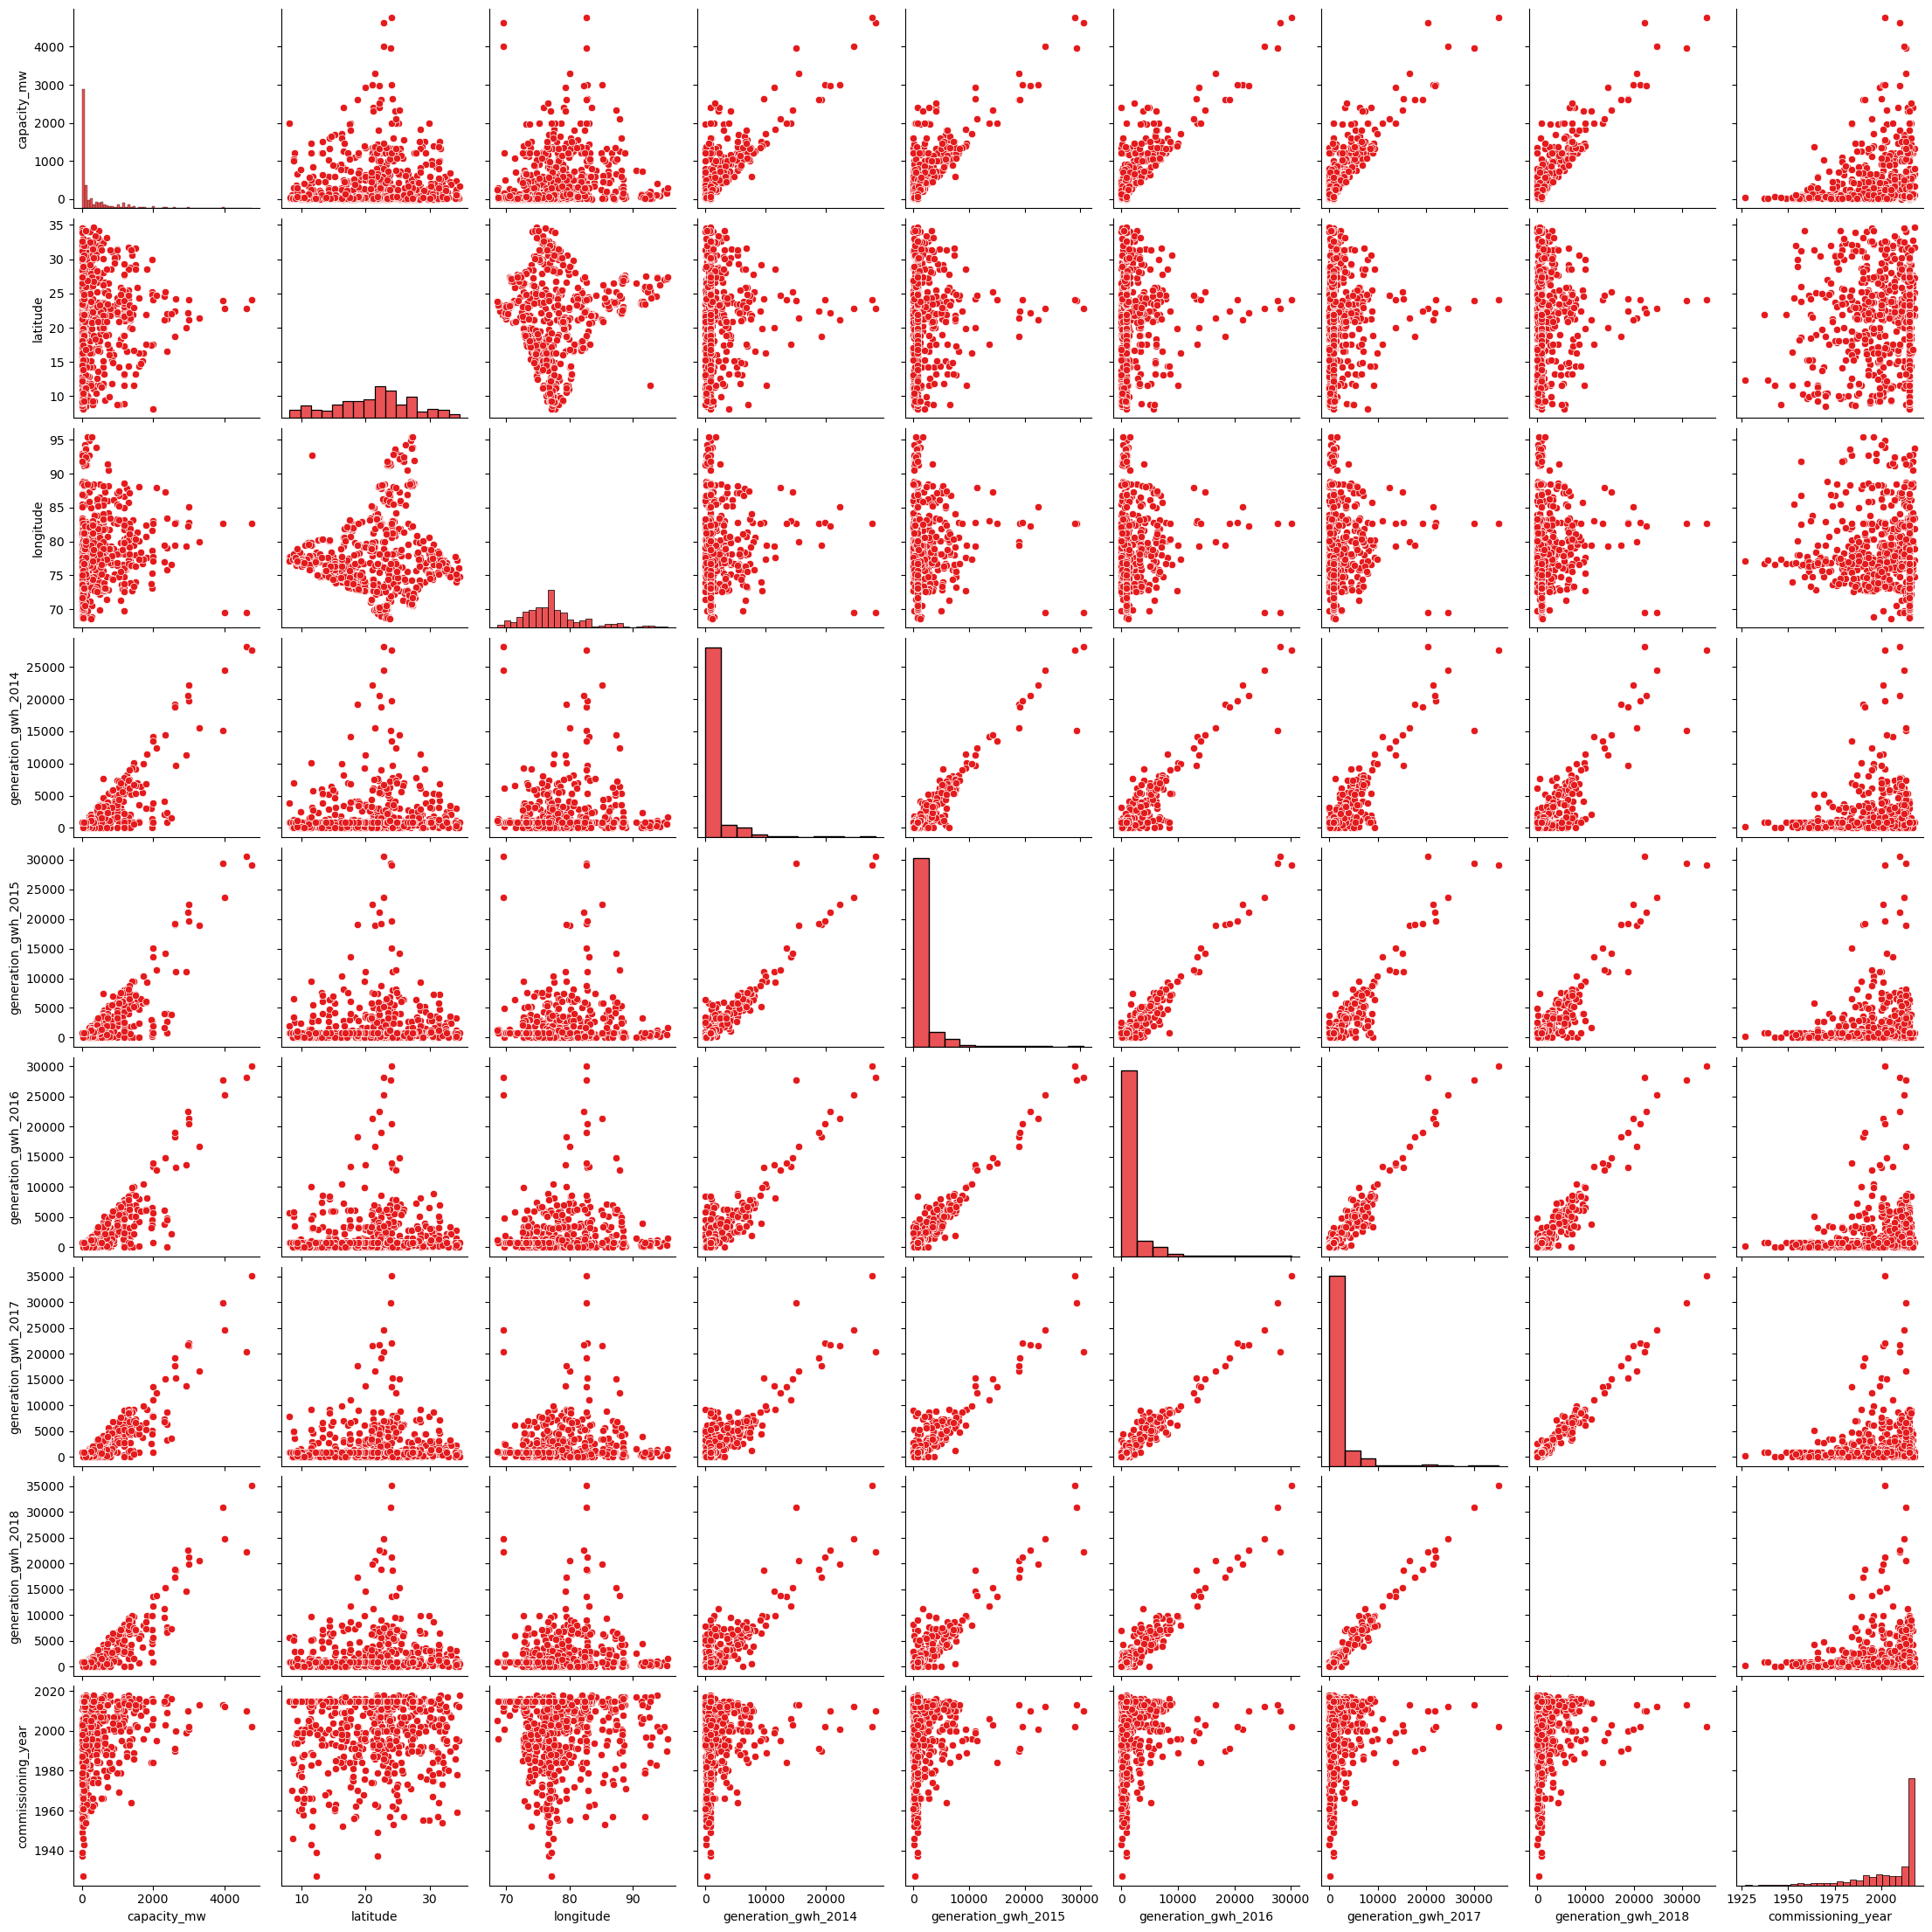

In [58]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df_3)

In [58]:
df_3.head(2)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               49.923              432.135              467.430   
1             1701.008             4350.558             3717.154   

   commissioning_year primary_fuel  
0              2016.0         Coal  
1              2014.0         Coal

# Encoding Categorical Features Again for futher EDA steps

In [59]:
df_categorical=['primary_fuel']
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_categorical:
    df_3[i] = le.fit_transform(df_3[i])
    
df_3.head()

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   
3         28.0   21.8948    76.6814           844.113738            749.26485   
4          9.3   21.8948    76.6814           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   
3             827.7405           868.042975            833.70055   
4             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0             1  
1              2014.0             1  
2              2015.0             6  
3              2014.0             6  
4              1949.0             3

# Checking coefficients of correlation (r)

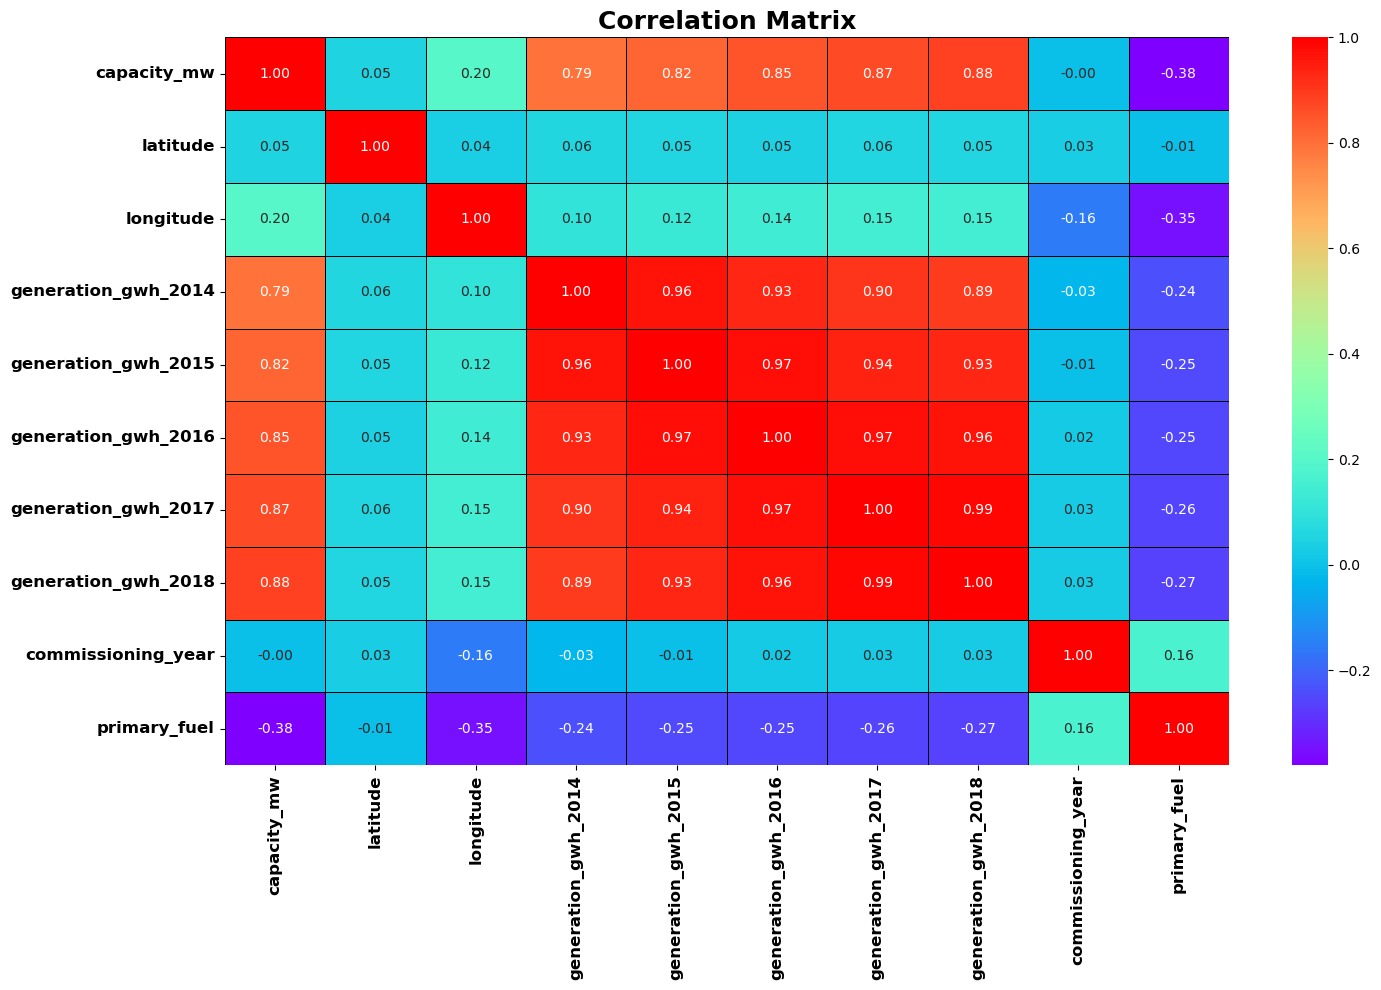

In [60]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df_3.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

# Checking Correlations with Target Variable - Regression Task

In [61]:
df_cr1=df_3.copy()

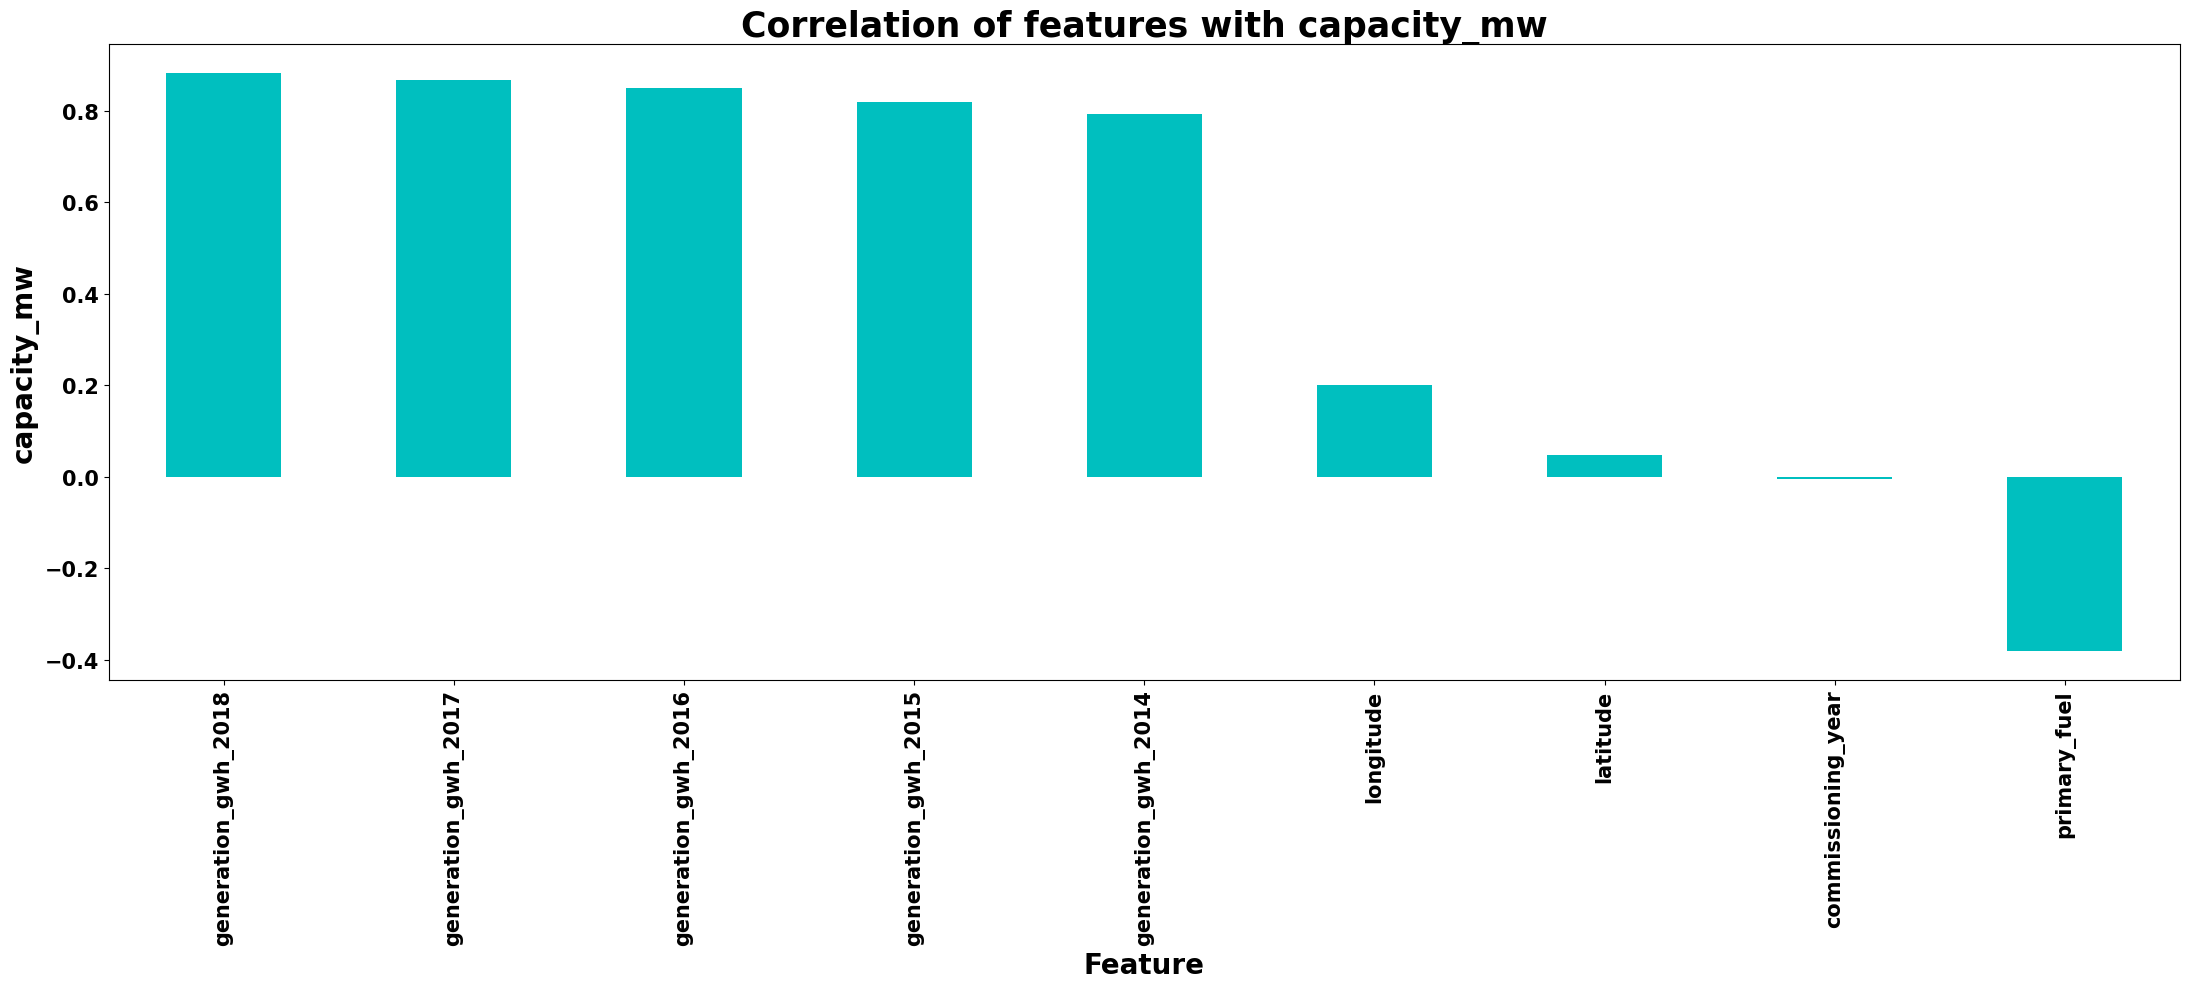

In [62]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('capacity_mw',fontsize=20,fontweight='bold')
plt.title('Correlation of features with capacity_mw',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [63]:
corr_r["primary_fuel"].sort_values(ascending=False) 

primary_fuel           1.000000
commissioning_year     0.164947
latitude              -0.007011
generation_gwh_2014   -0.237983
generation_gwh_2015   -0.246873
generation_gwh_2016   -0.253761
generation_gwh_2017   -0.260232
generation_gwh_2018   -0.265963
longitude             -0.352255
capacity_mw           -0.380395
Name: primary_fuel, dtype: float64

#### Observations for target variable:
- **There are multiple features with weak and strong corrleations**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation** 
- **Considering -0.01 to 0.01 range as very weak correlation with target variable.latitude is weakly correlated**
- **I will check feature scores from SelectKBest algorithm with f-regression test and also with feature importance using ExtraTreeRegressor, then will check if any features have lower score to take futher decisions.**

# Checking Correlations with Target Variable - Classificaiton Task

In [64]:
df_cr2=df_3.copy()

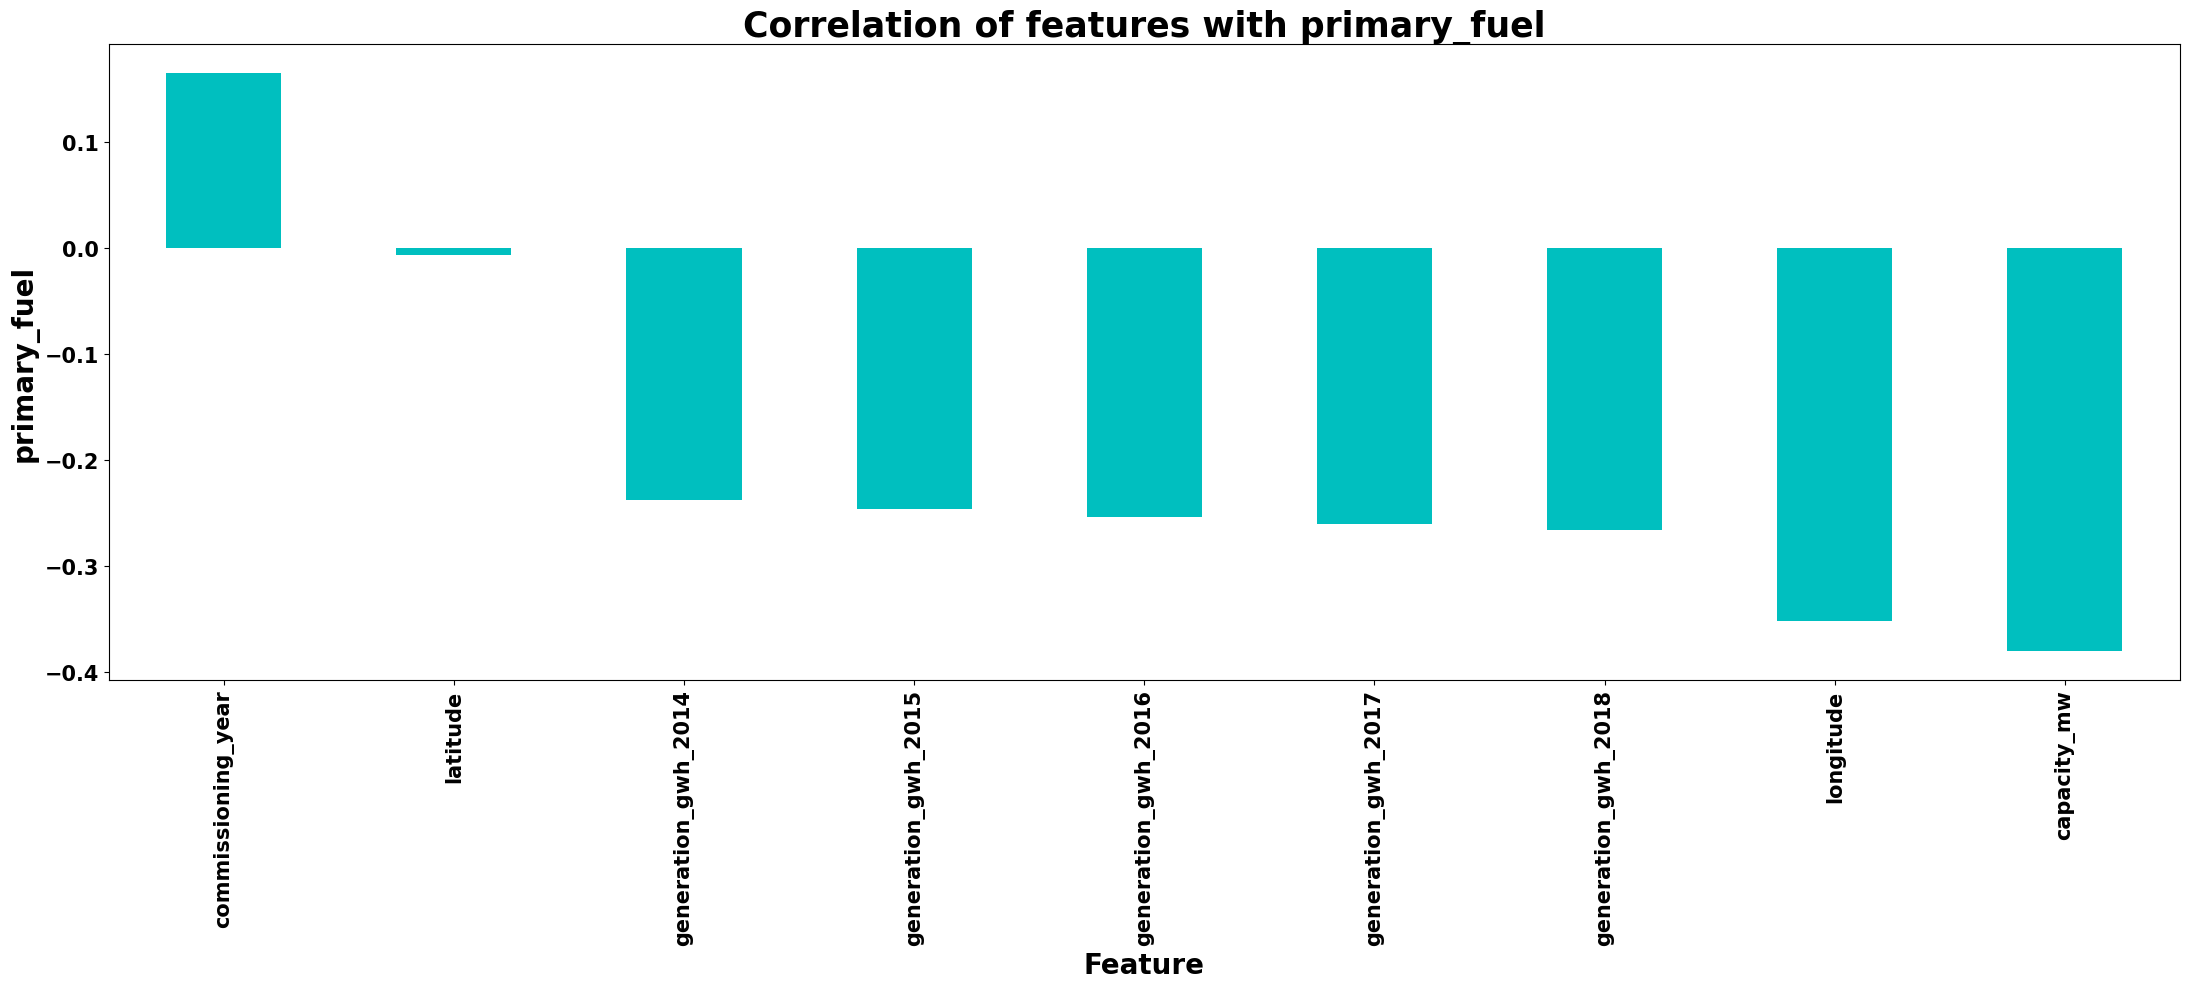

In [65]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('primary_fuel',fontsize=20,fontweight='bold')
plt.title('Correlation of features with primary_fuel',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [66]:
corr_r["capacity_mw"].sort_values(ascending=False) 

capacity_mw            1.000000
generation_gwh_2018    0.881668
generation_gwh_2017    0.866224
generation_gwh_2016    0.849161
generation_gwh_2015    0.818086
generation_gwh_2014    0.791835
longitude              0.199467
latitude               0.048355
commissioning_year    -0.004072
primary_fuel          -0.380395
Name: capacity_mw, dtype: float64

#### Observations for target variable:
- **There are multiple features with weak and strong corrleations**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation** 
- **Considering -0.01 to 0.01 range as very weak correlation with target variable.latitude is weakly correlated**
- **I will check feature scores from SelectKBest algorithm with ANOVA F values and also with feature importance using ExtraTreeClassifier, then will check if any features have lower score to take futher decisions.**

# Checking top features using SelectKBest algorithm - Regression Task

In [67]:
#sklearn.feature_selection.f_regression
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression    # Using f_regression test


x=df_cr1.drop("capacity_mw",axis=1)  # #independent columns
y=df_cr1["capacity_mw"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))#print 18 best features


                 Specs        Score
6  generation_gwh_2018  3159.479971
5  generation_gwh_2017  2719.997449
4  generation_gwh_2016  2339.595284
3  generation_gwh_2015  1831.331227
2  generation_gwh_2014  1521.295664
8         primary_fuel   153.108964
1            longitude    37.499475
0             latitude     2.121054
7   commissioning_year     0.015003


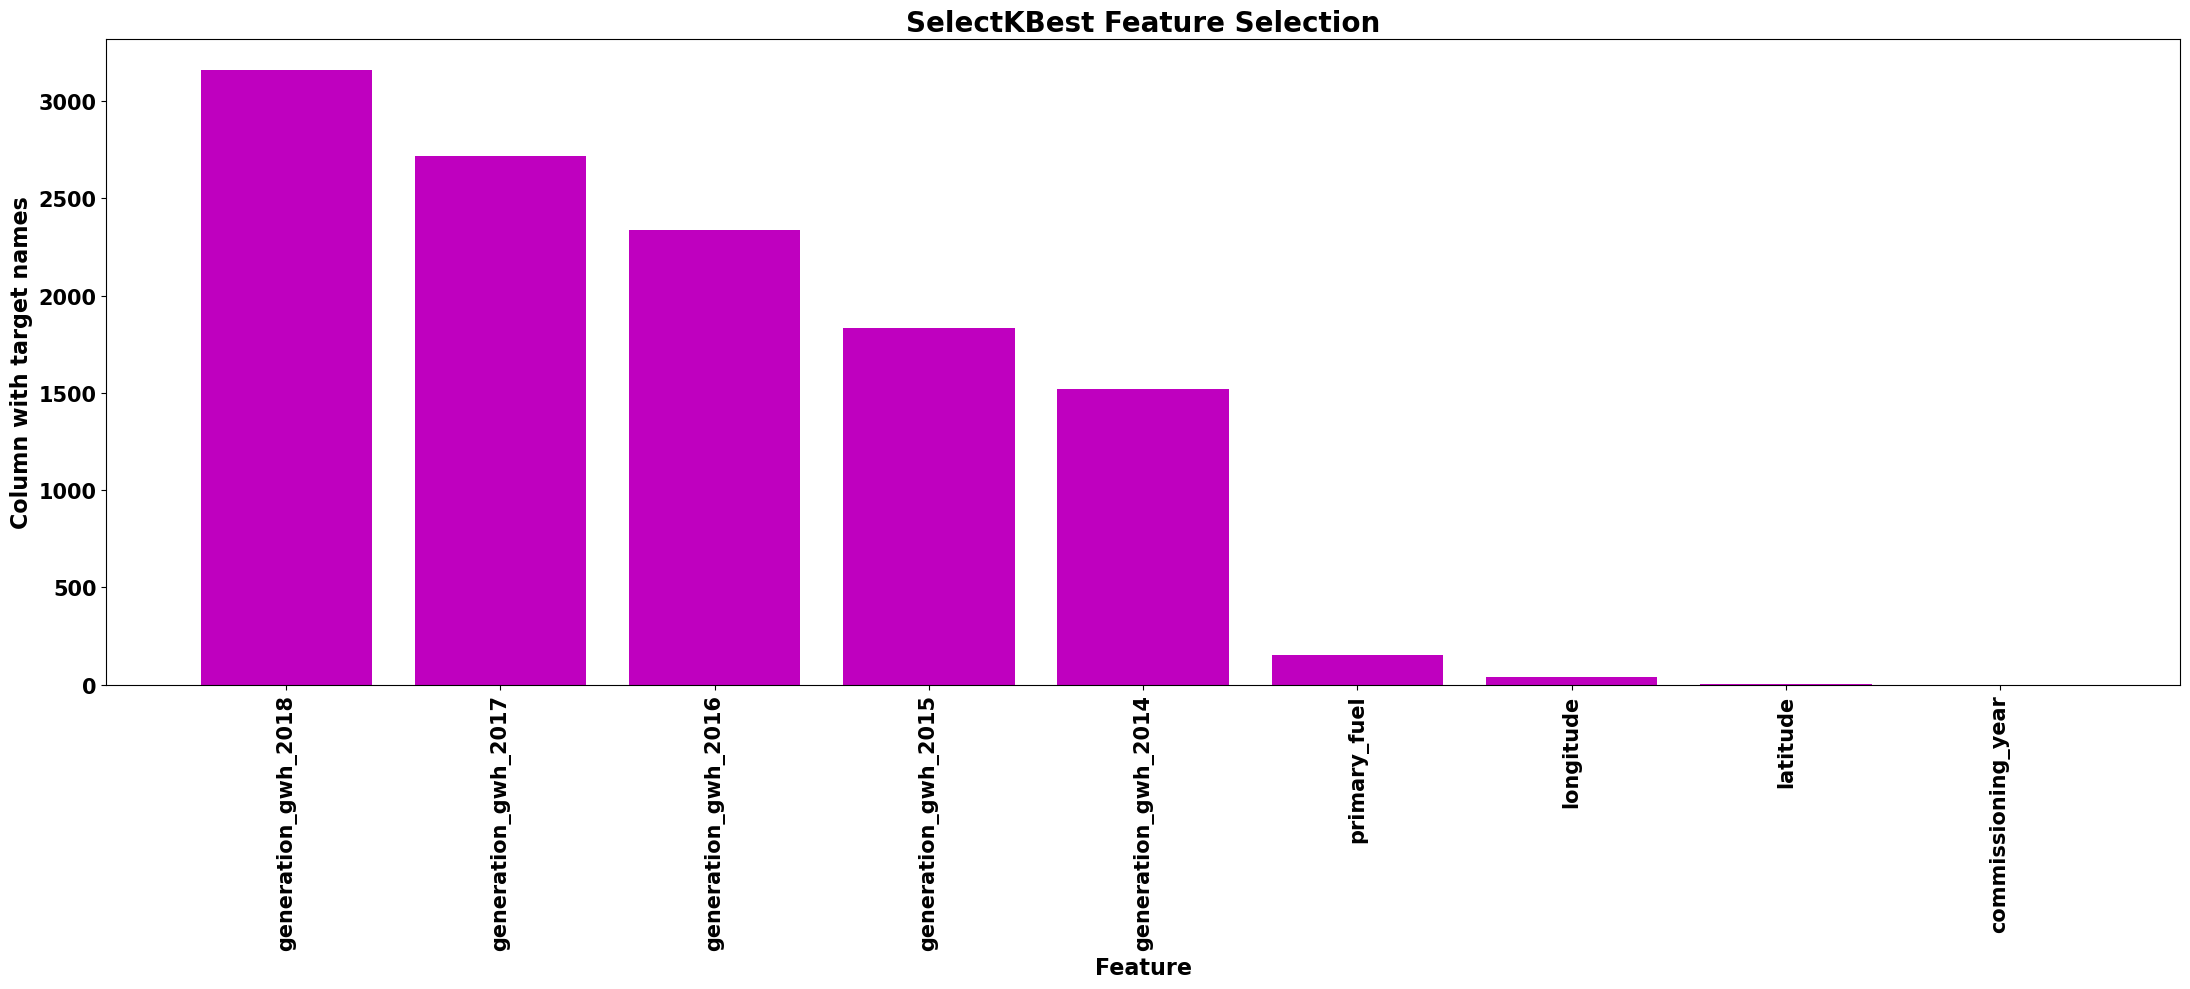

In [68]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using SelectKBest algorithm - Classification Task

In [69]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df_cr2.drop("primary_fuel",axis=1)  #independent columns
y=df_cr2["primary_fuel"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs       Score
0   commissioning_year  103.275125
1          capacity_mw   54.854670
2  generation_gwh_2018   32.382708
3  generation_gwh_2017   31.758719
4  generation_gwh_2016   29.569390
5            longitude   29.546957
6  generation_gwh_2015   26.688841
7  generation_gwh_2014   25.896123
8             latitude   14.571653

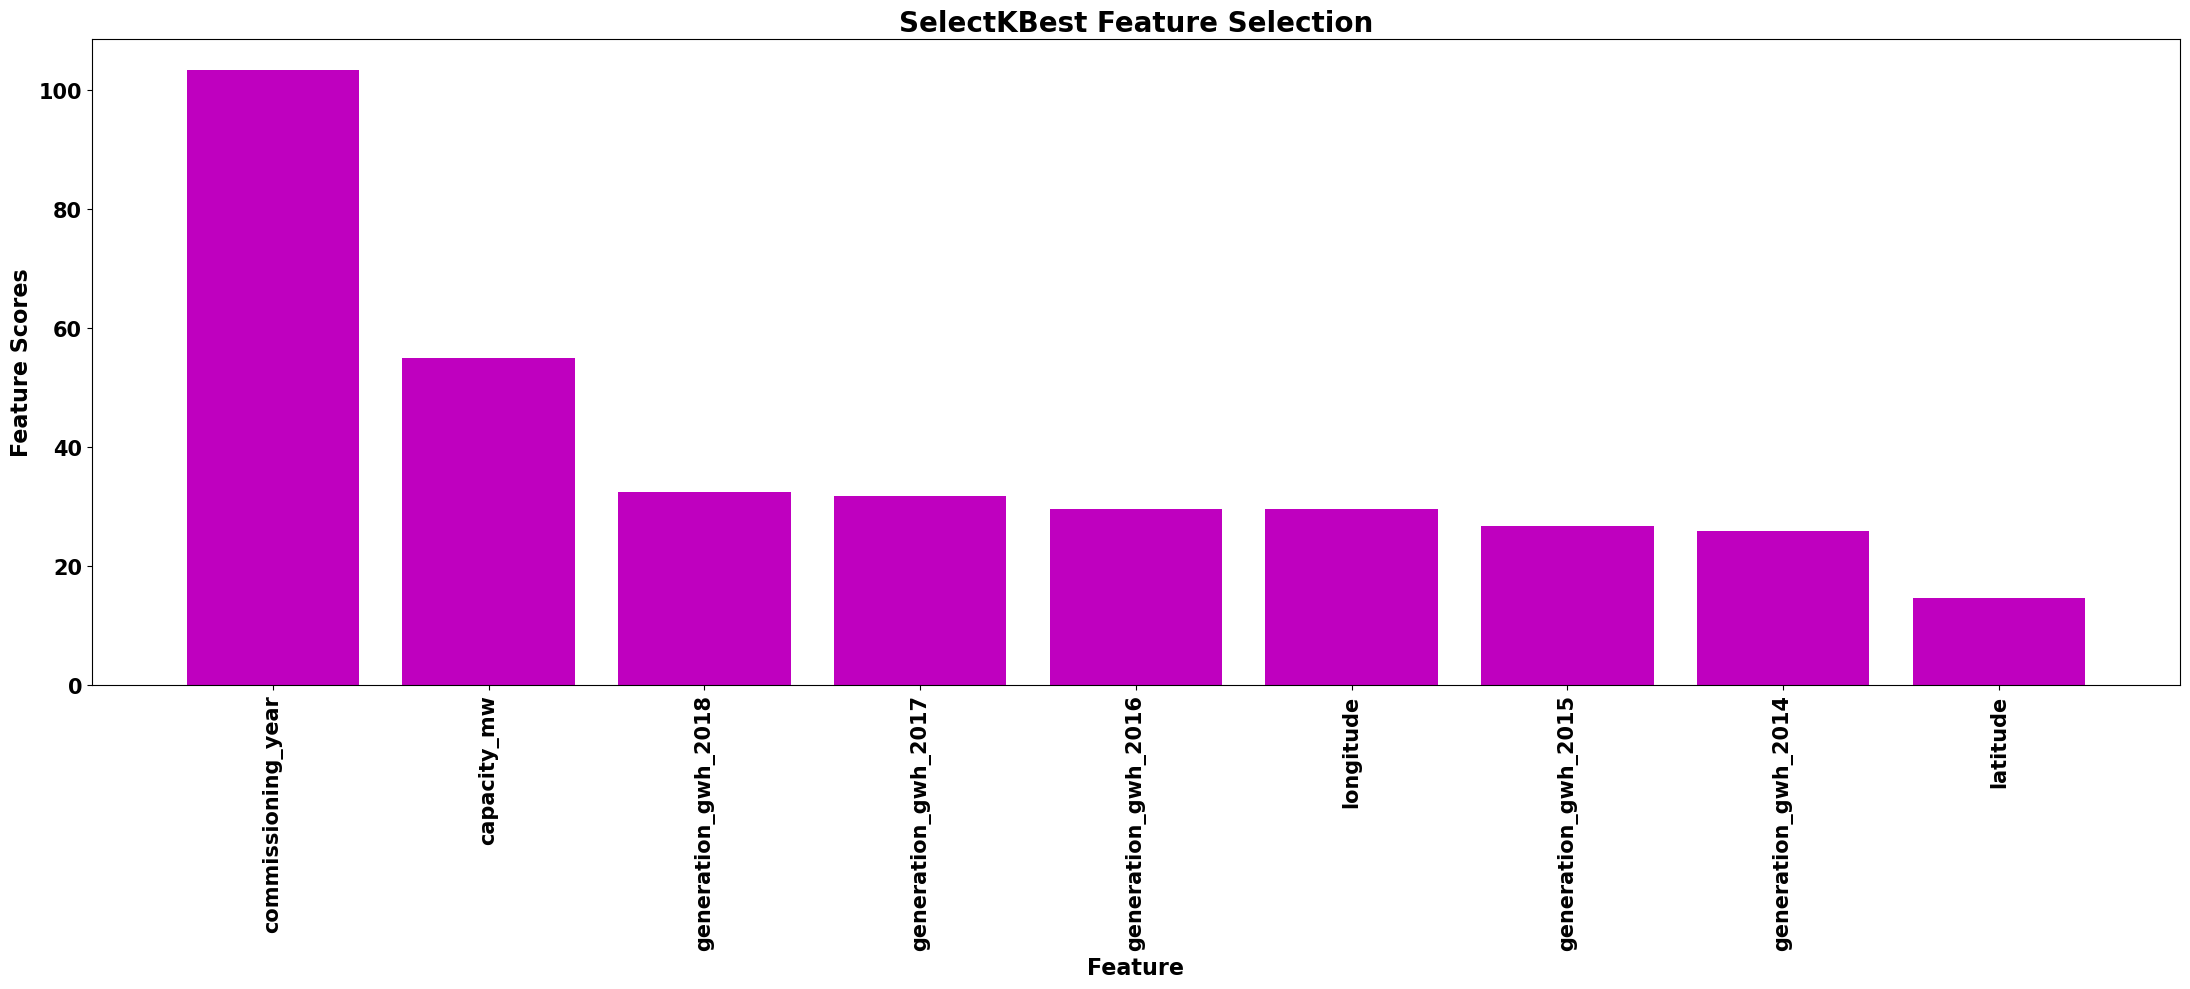

In [70]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using Feature Importance - Extra Tree Regressor

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

x=df_cr1.drop("capacity_mw",axis=1)  # #independent columns
y=df_cr1["capacity_mw"]  # Output variable

model = ExtraTreesRegressor()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
Feature_Importance_scores=featureScores.nlargest(100,'Score')  #Top 100 features
Feature_Importance_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0  generation_gwh_2018  0.339756
1  generation_gwh_2017  0.227355
2  generation_gwh_2016  0.178238
3  generation_gwh_2015  0.121328
4  generation_gwh_2014  0.069793
5         primary_fuel  0.018885
6            longitude  0.016320
7             latitude  0.015689
8   commissioning_year  0.012635

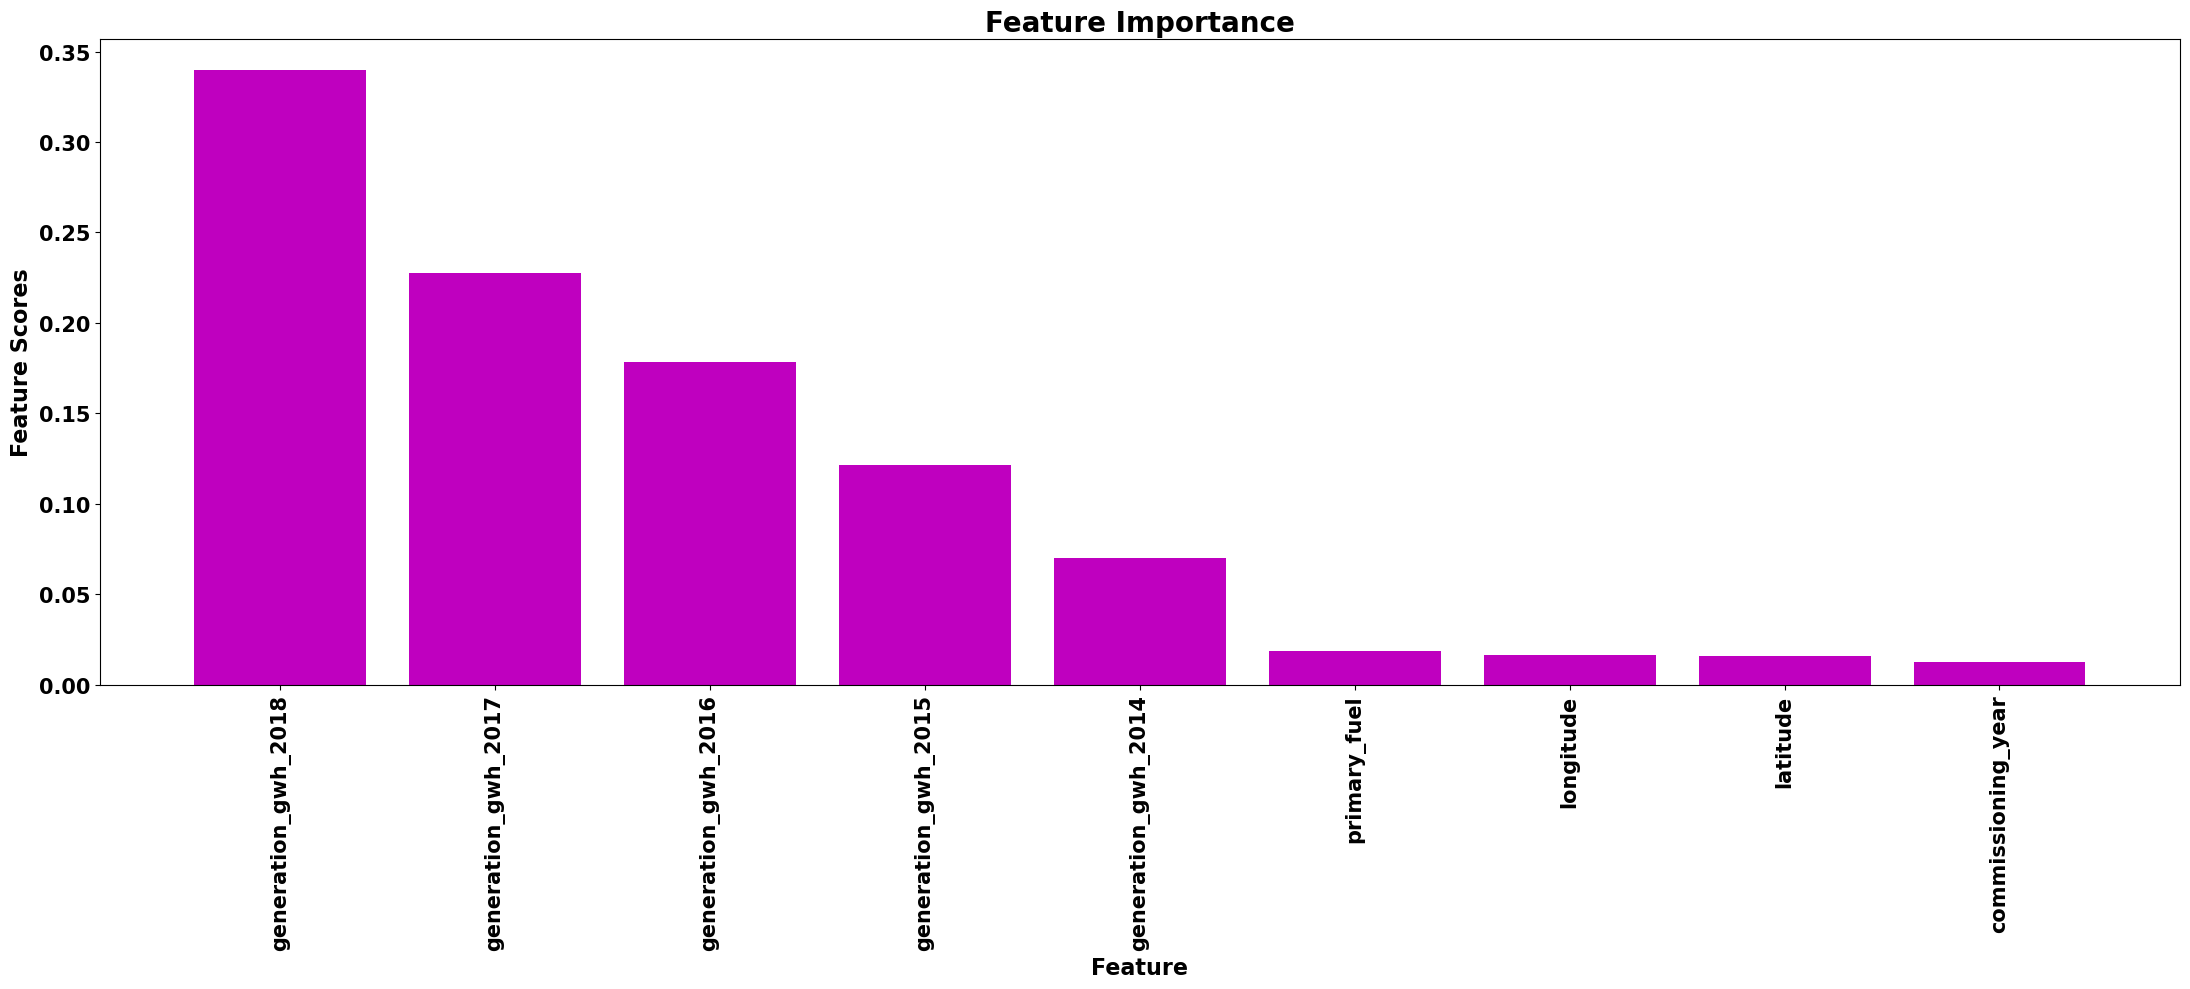

In [72]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using Feature Importance - Extra Tree Classifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

x=df_cr2.drop("primary_fuel",axis=1)  #independent columns
y=df_cr2["primary_fuel"]  # Output variable

model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feature_importance_scores=featureScores.nlargest(100,'Score')  #Top 100 features
feature_importance_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0             latitude  0.207211
1            longitude  0.190234
2          capacity_mw  0.163549
3   commissioning_year  0.161683
4  generation_gwh_2018  0.068230
5  generation_gwh_2017  0.055420
6  generation_gwh_2016  0.053265
7  generation_gwh_2015  0.052489
8  generation_gwh_2014  0.047920

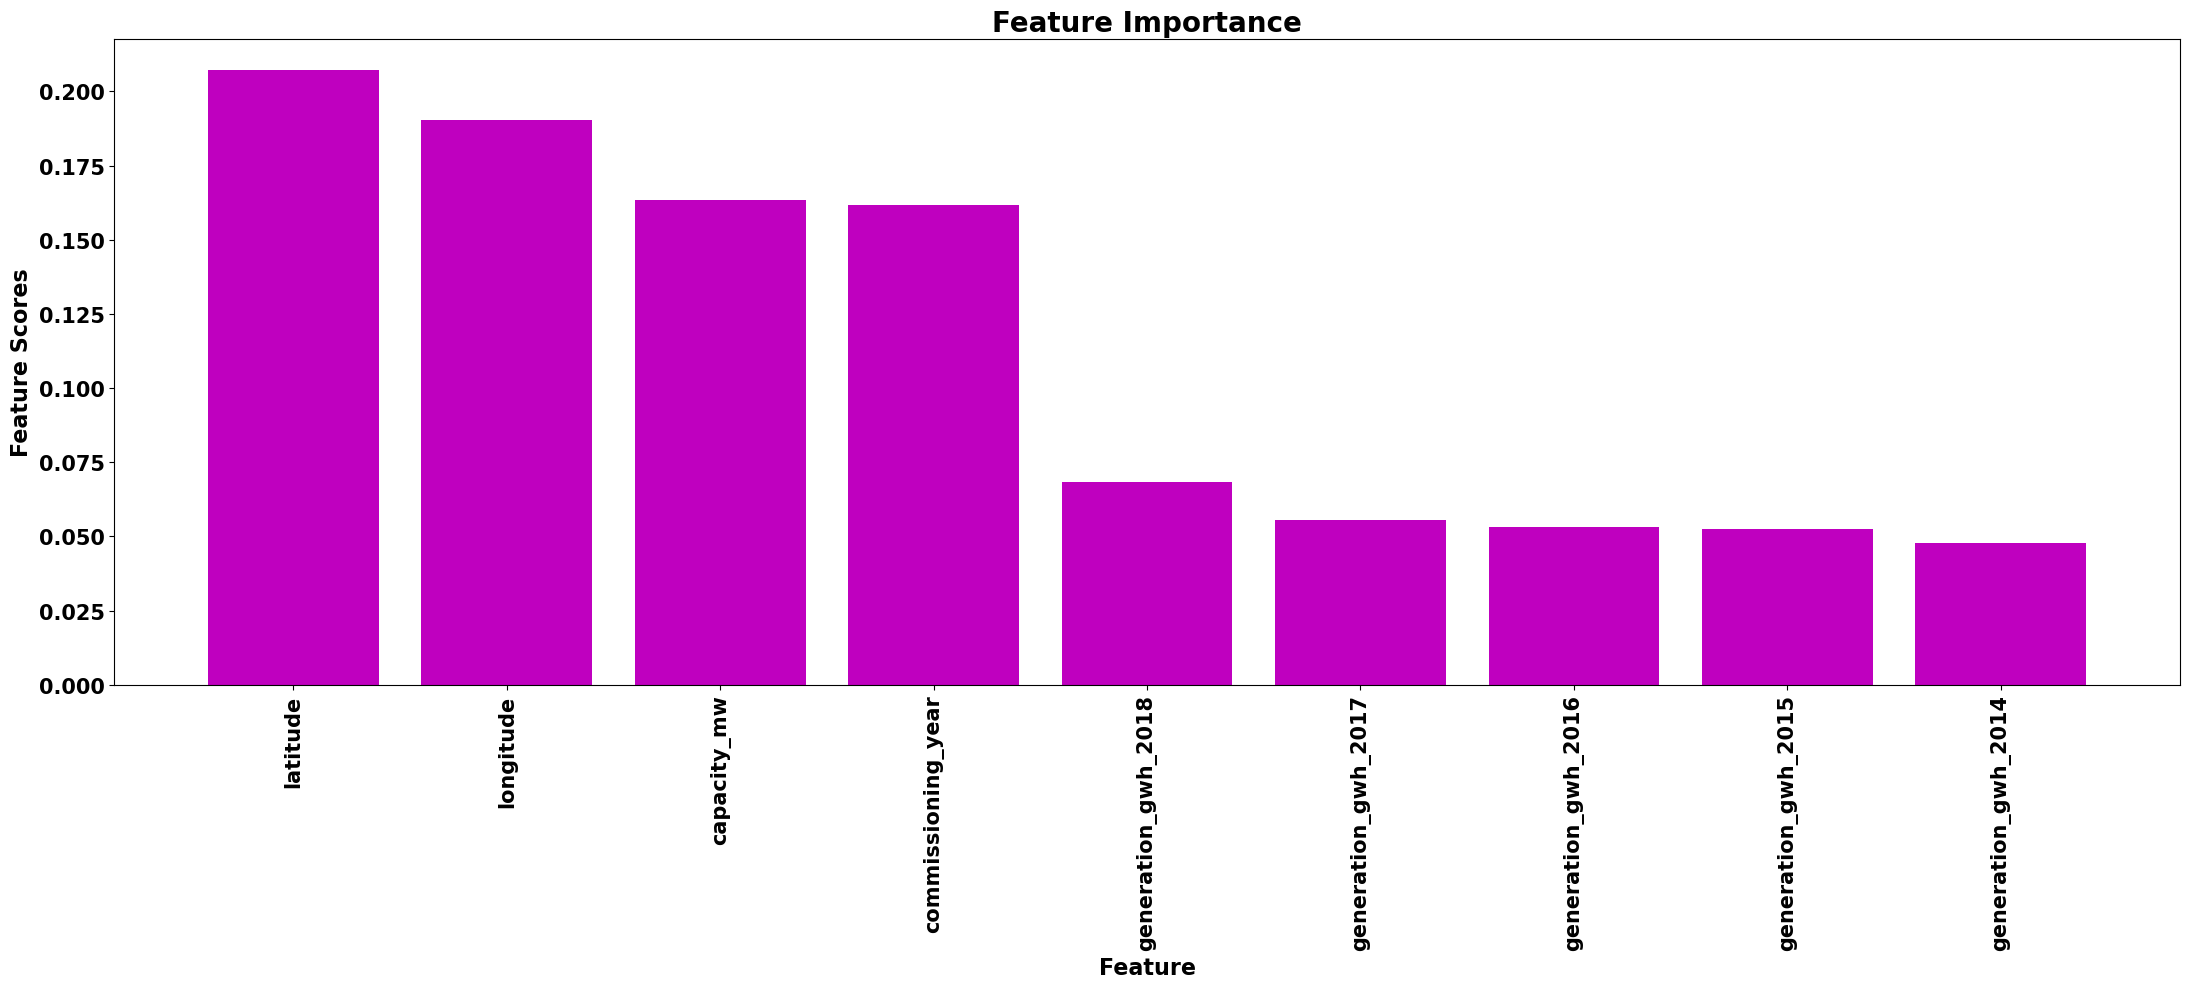

In [74]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

### Observations for Regression Task:

- **Based on the observations from all feature selection techniques checked, I can drop the columns "latitude" and "commissioning_year" for Regression task as the scores of these two columns are low in all the techniques**

In [75]:
df_reg=df_3.drop(["latitude","commissioning_year"],axis=1)
print(df_reg.shape)
df_reg.head(3)

(907, 8)


capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0    72.2222           844.113738            749.26485   
1       1350.0    77.9009          1920.971000           5629.66300   
2         15.2    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  primary_fuel  
0              49.9230           432.135000            467.43000             1  
1            1701.0080          4350.558000           3717.15400             1  
2             827.7405           868.042975            833.70055             6

### Observations for Classification Task:

- **Based on the observations from all feature selection techniques checked, I am not dropping any columns for classification task as the scores of all the features have good relation with target variable "primary_fuel"**

In [76]:
df_clas=df_3.copy()
print(df_clas.shape)
df_clas.head(3)

(907, 10)


capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0             1  
1              2014.0             1  
2              2015.0             6

## To ease EDA, from here onwards, treating regression and classificatin problems seperately

# REGRESSION EDA (To Be Continued)

## Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [77]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for X numerical data as the variance is applicable only for numerical data

In [78]:
# Identifying the X columns with numerical data 

In [79]:
df_reg.head(3)

capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0    72.2222           844.113738            749.26485   
1       1350.0    77.9009          1920.971000           5629.66300   
2         15.2    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  primary_fuel  
0              49.9230           432.135000            467.43000             1  
1            1701.0080          4350.558000           3717.15400             1  
2             827.7405           868.042975            833.70055             6

In [80]:
df_reg_numerical=df_reg.drop(["primary_fuel","capacity_mw"],axis=1)
df_reg_numerical.head(3)

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0    72.2222           844.113738            749.26485              49.9230   
1    77.9009          1920.971000           5629.66300            1701.0080   
2    71.9424           844.113738            749.26485             827.7405   

   generation_gwh_2017  generation_gwh_2018  
0           432.135000            467.43000  
1          4350.558000           3717.15400  
2           868.042975            833.70055

In [81]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_reg_numerical[list(df_reg_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF               Column
4  67.371855  generation_gwh_2017
3  55.717149  generation_gwh_2016
5  49.362183  generation_gwh_2018
2  42.744803  generation_gwh_2015
1  18.311964  generation_gwh_2014
0   1.371024            longitude

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features**
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As mosf of the features are with VIF values > 10, I will use PCA to reduce the no. of features**
- **I will apply PCA at the end of EDA after scaling the data**

## Checking Outliers

In [82]:
# We check outliers on X numerical data
df_outliers=df_reg_numerical.copy()
df_outliers.head(5)

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0    72.2222           844.113738            749.26485              49.9230   
1    77.9009          1920.971000           5629.66300            1701.0080   
2    71.9424           844.113738            749.26485             827.7405   
3    76.6814           844.113738            749.26485             827.7405   
4    76.6814           844.113738            749.26485             827.7405   

   generation_gwh_2017  generation_gwh_2018  
0           432.135000            467.43000  
1          4350.558000           3717.15400  
2           868.042975            833.70055  
3           868.042975            833.70055  
4           868.042975            833.70055

In [83]:
df_outliers.shape

(907, 6)

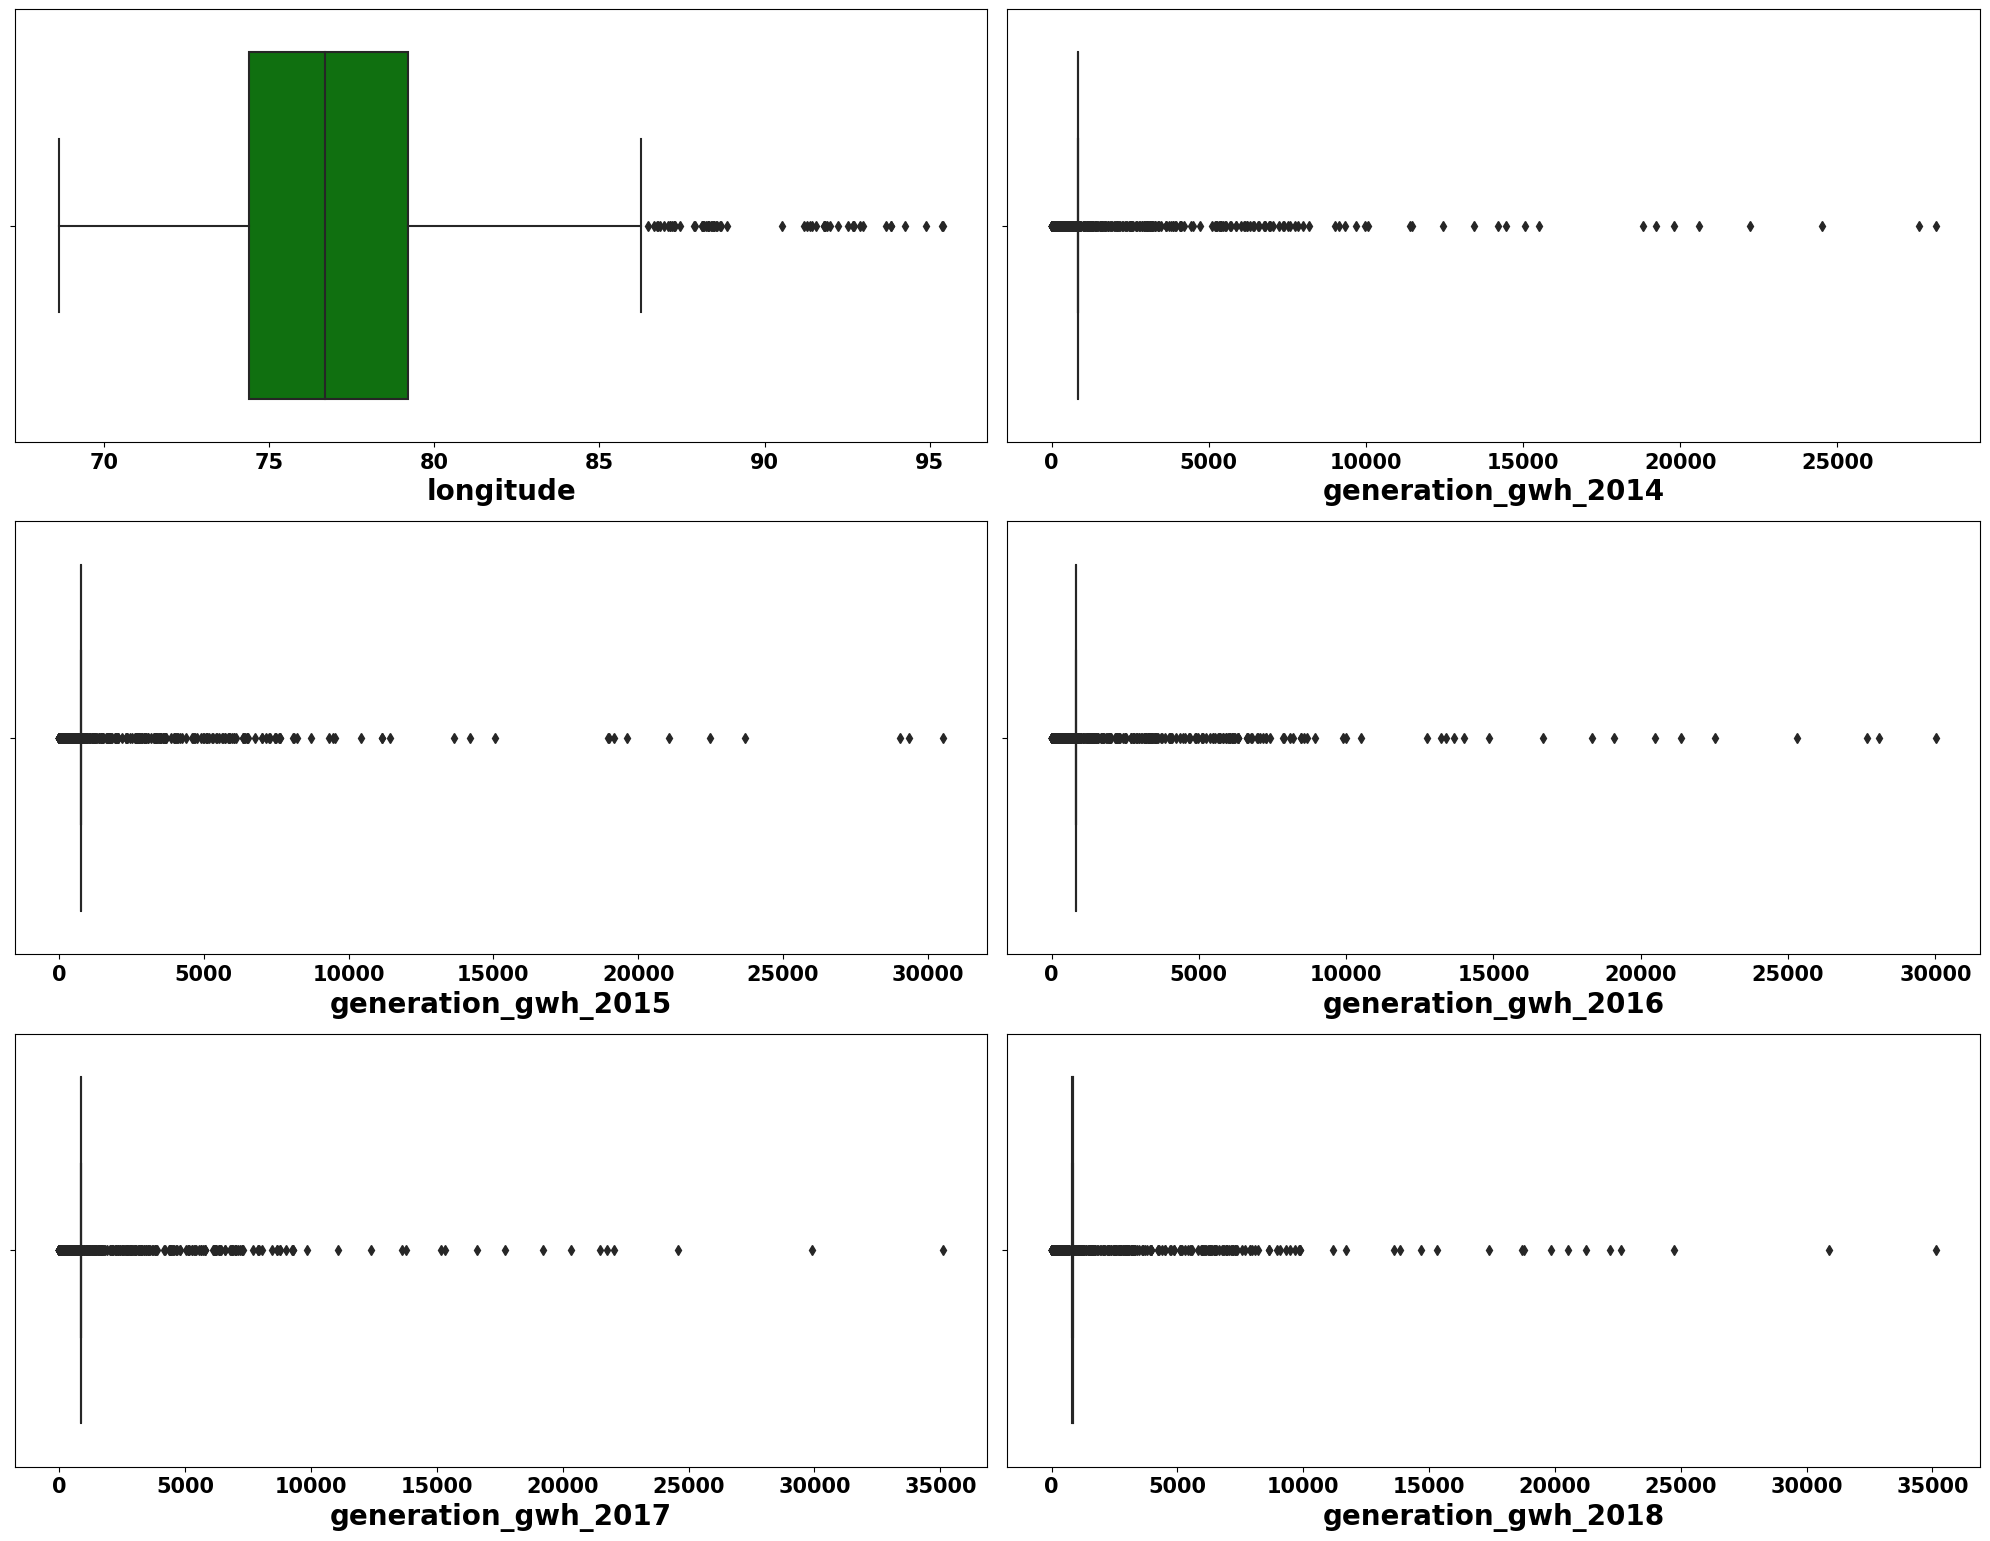

In [84]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

## Removing Outliers using z-score method

In [85]:
df_outliers.shape

(907, 6)

In [86]:
df_reg.shape

(907, 8)

In [87]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([ 15,  60,  60,  60,  60,  60,  62,  63,  76,  76,  76,  76,  76,
         84, 105, 105, 105, 105, 105, 146, 228, 228, 228, 228, 237, 251,
        258, 265, 265, 265, 265, 265, 288, 357, 357, 357, 357, 357, 401,
        401, 401, 401, 401, 419, 421, 421, 421, 421, 421, 447, 472, 472,
        472, 472, 472, 480, 509, 509, 509, 509, 509, 519, 519, 519, 519,
        519, 545, 578, 623, 623, 623, 623, 623, 627, 627, 627, 627, 627,
        652, 670, 703, 703, 703, 703, 703, 747, 783, 794, 864, 885, 885,
        885, 885, 885, 890, 890, 890, 890, 890], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 1, 1, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 2, 3,
        4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
        1, 2, 3, 4, 5, 1, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5,
        0, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0,
        0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5], dtype=int64))

In [88]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_reg_1=df_reg[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

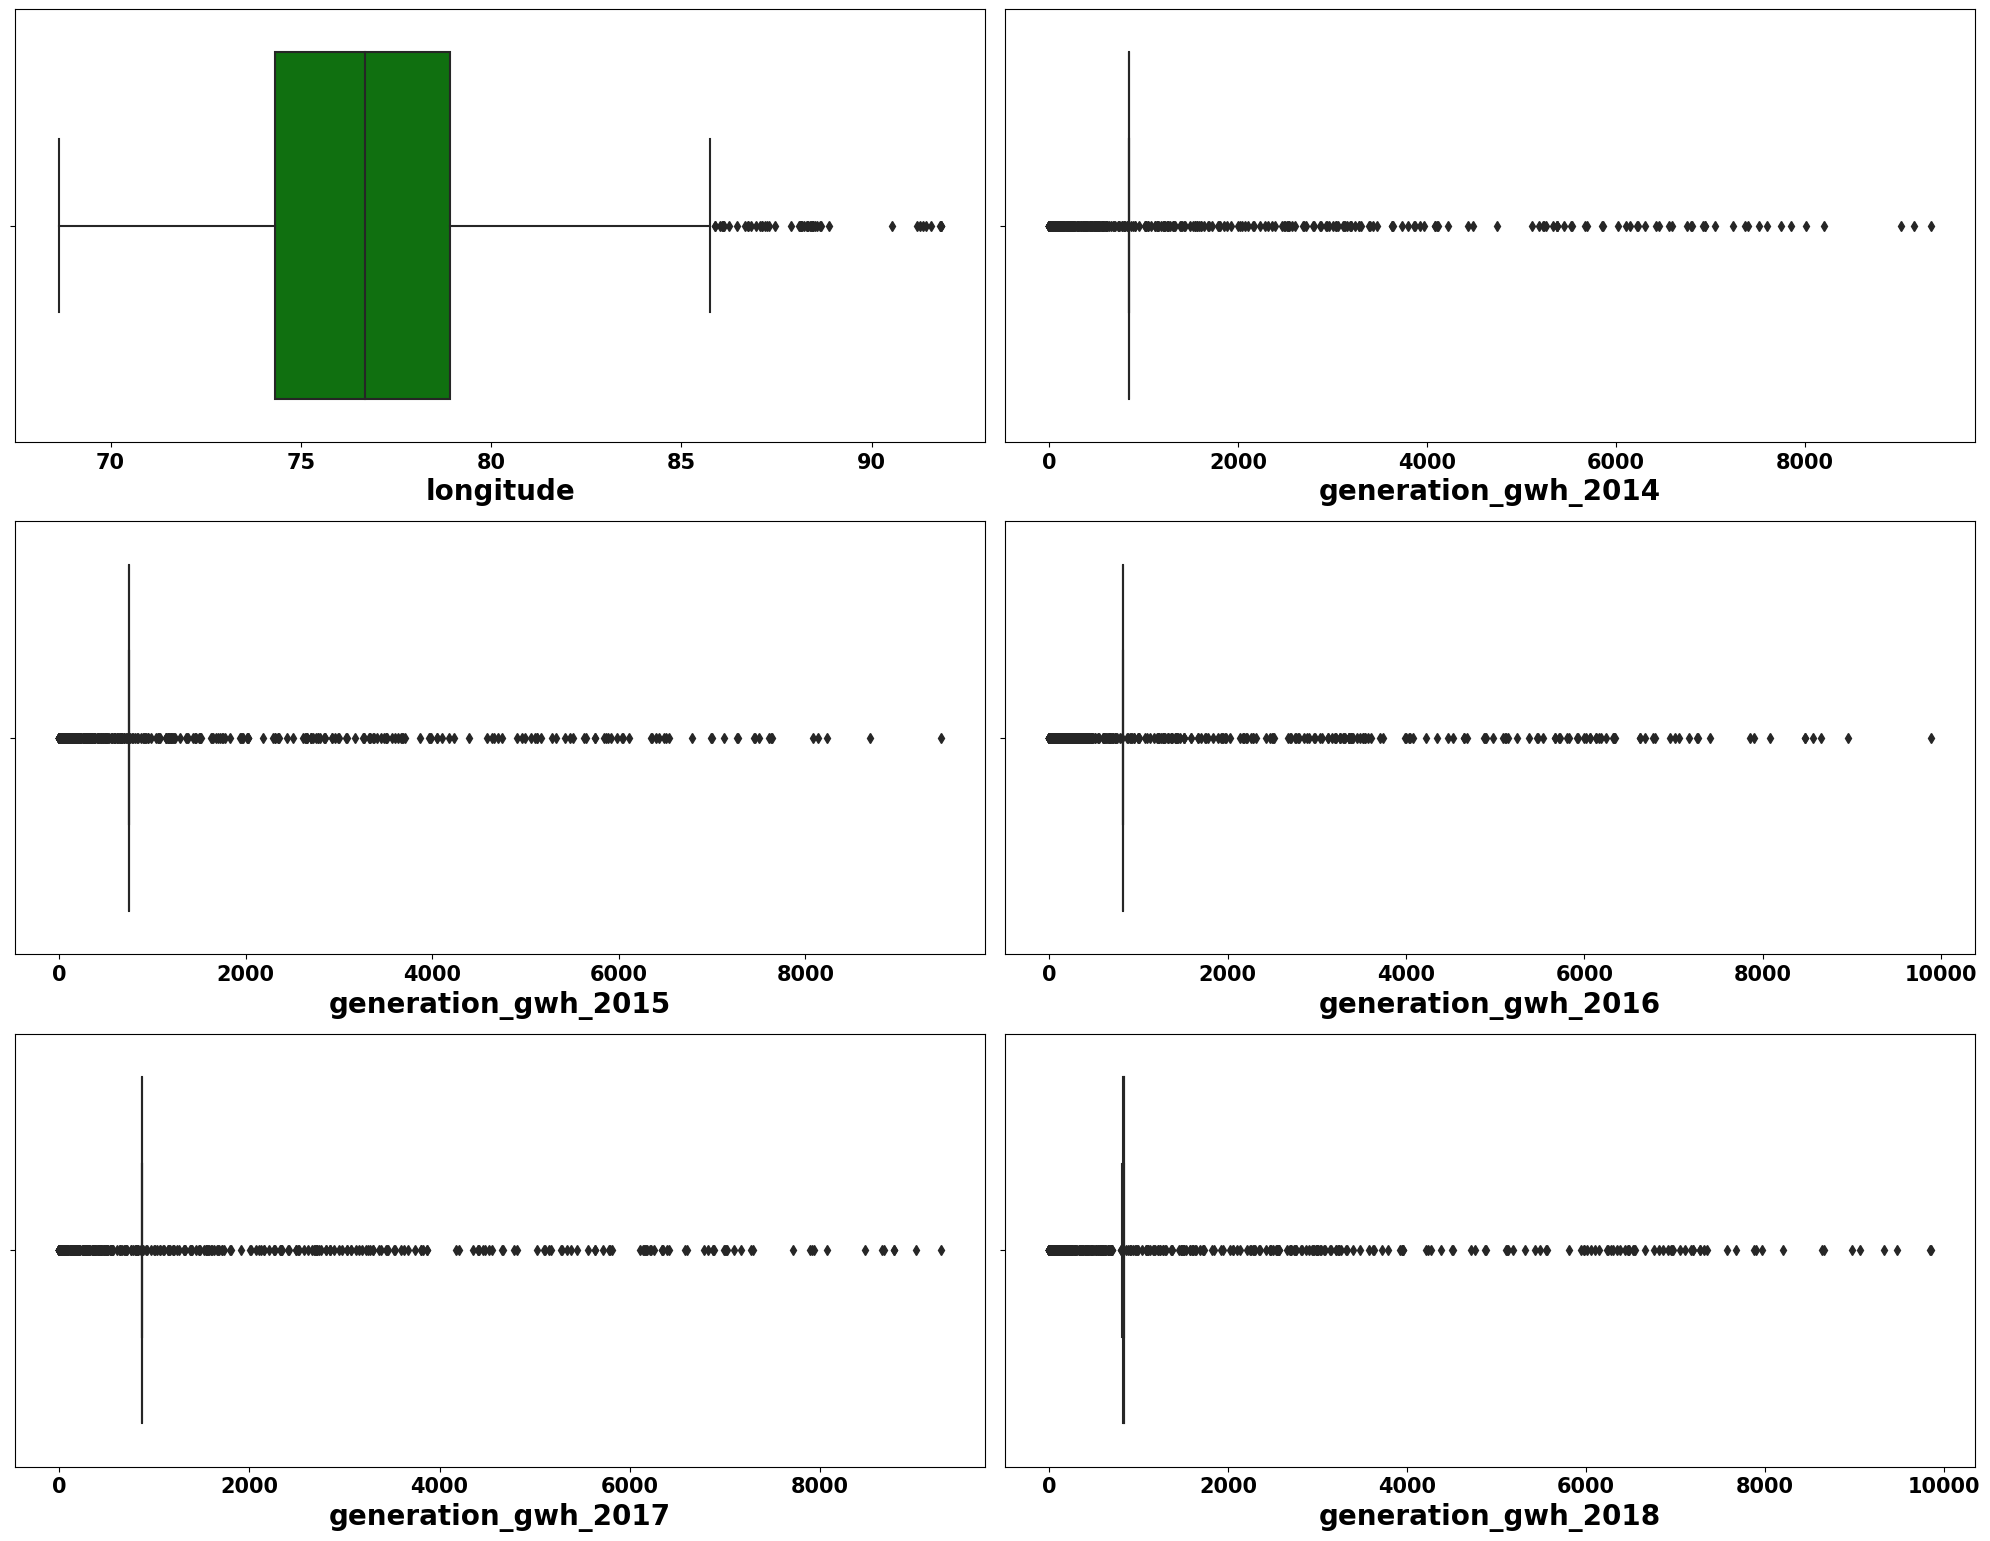

In [89]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [90]:
df_reg_1.shape

(871, 8)

In [91]:
df_reg.shape

(907, 8)

In [92]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_reg.shape[0]-df_reg_1.shape[0])/df_reg.shape[0]*100,1)
loss_percent_zscore

4.0

#### Observations:
- **Data loss with z-score method is 4.0%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

## Removing Outliers using IQR method

In [93]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_reg_2 = df_reg[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

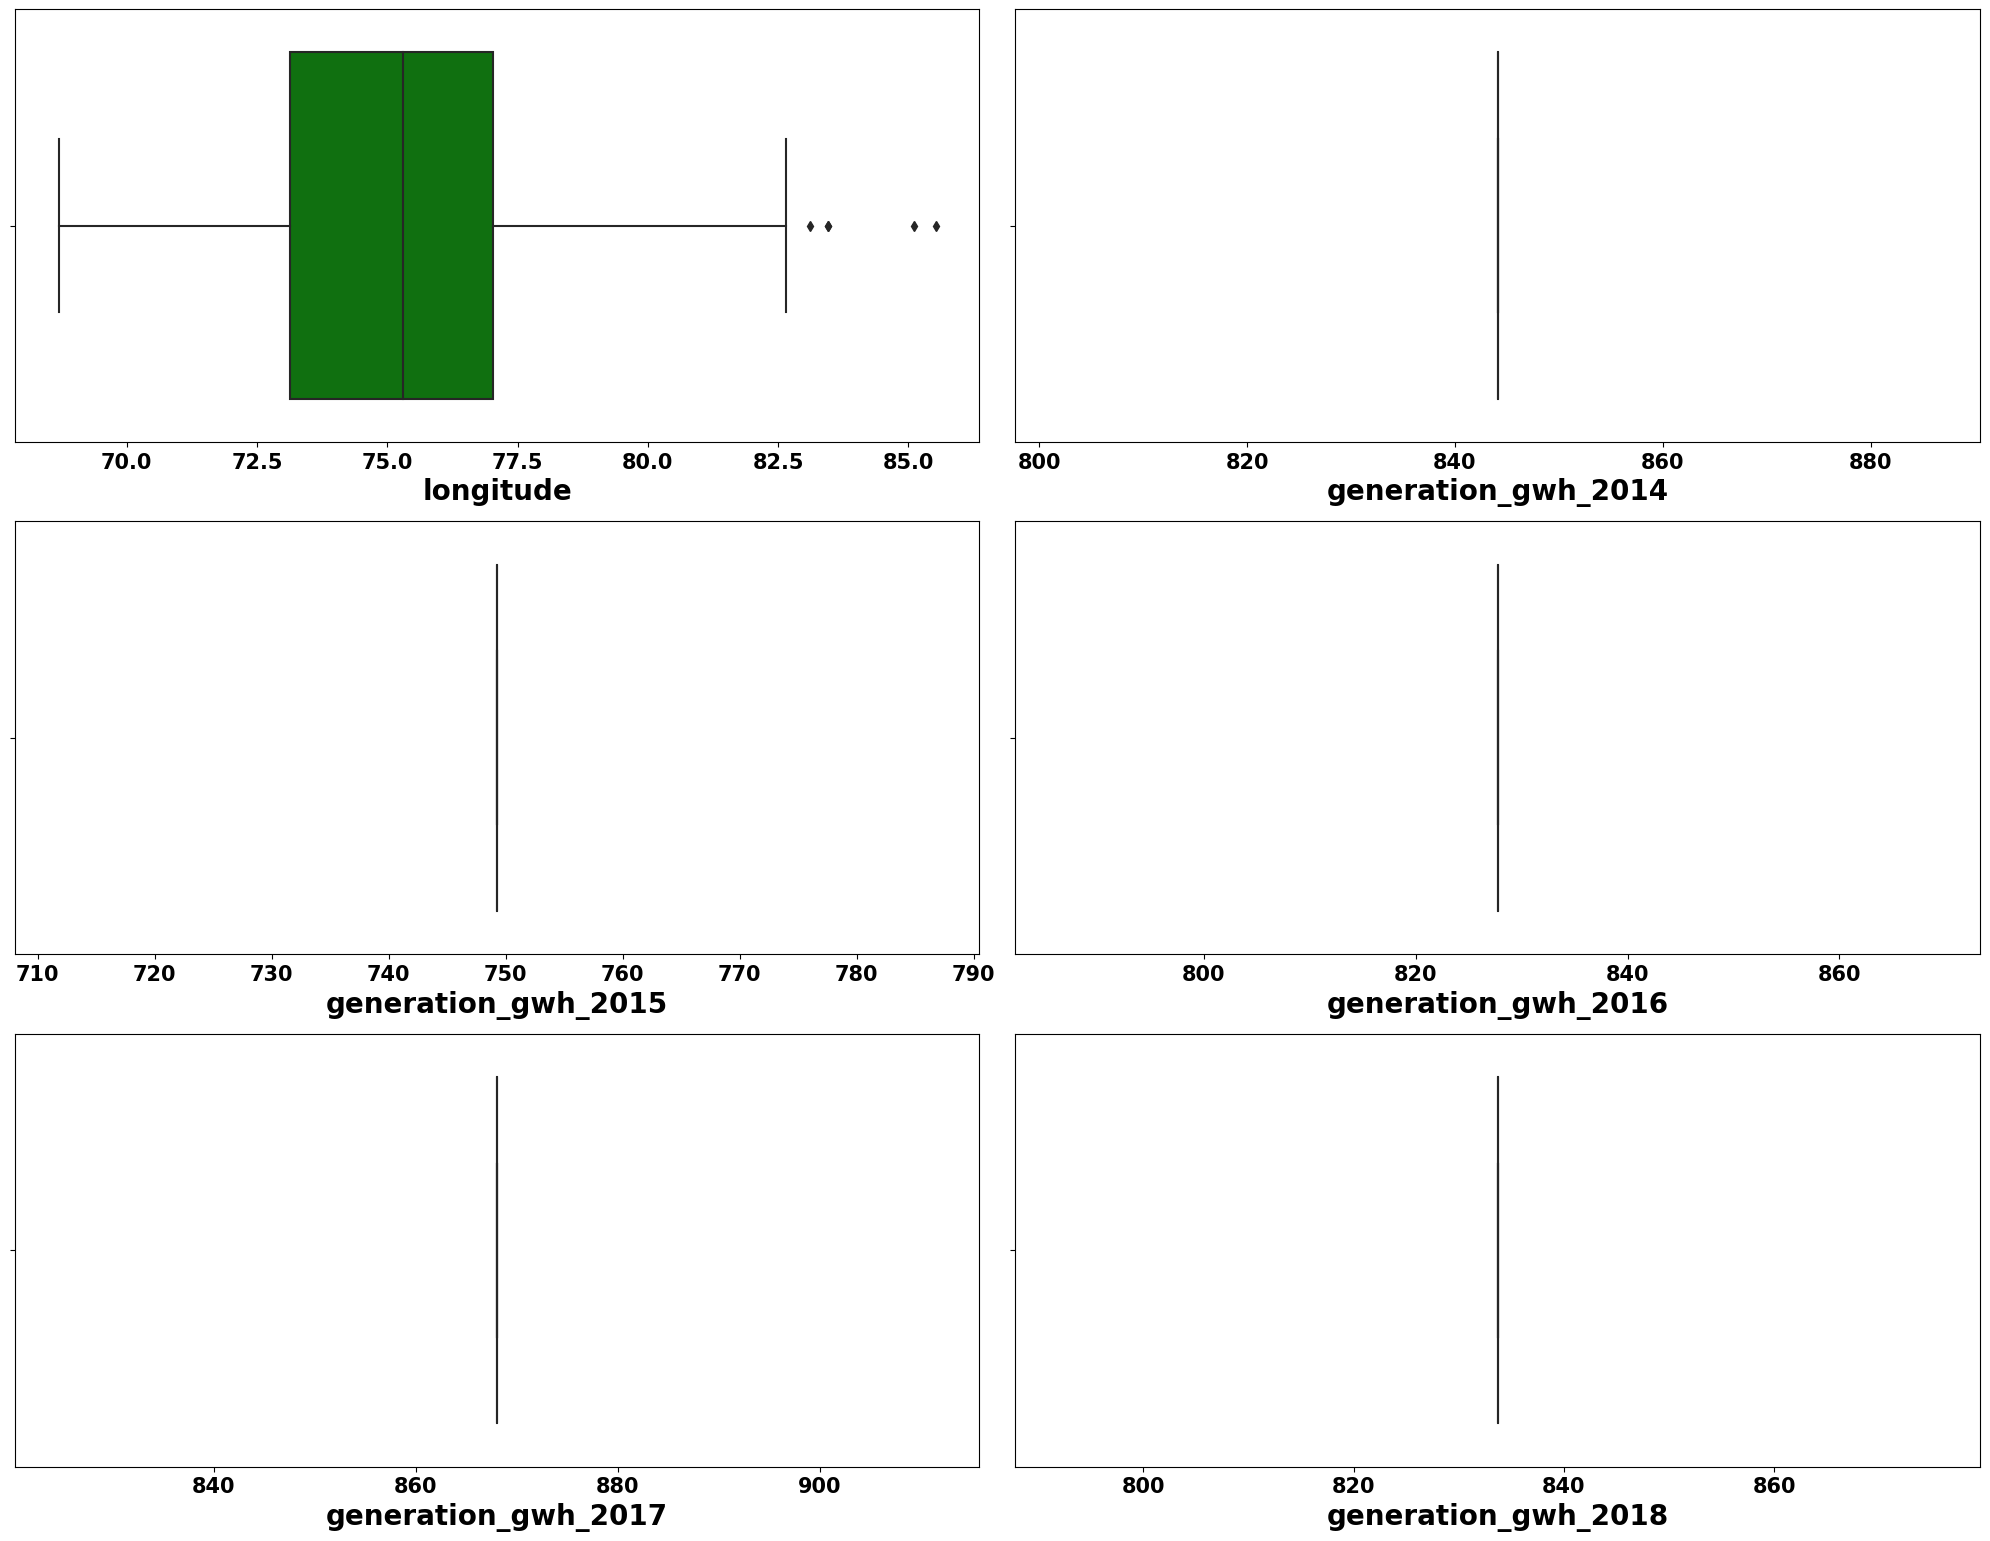

In [94]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_reg_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [95]:
df_reg_2.shape

(450, 8)

In [96]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_reg.shape[0]-df_reg_2.shape[0])/df_reg.shape[0]*100,1)
display(loss_percent_IQR)

50.4

#### Observations: 
- **Data loss with IQR is 50.4% which is higher than data loss with z-score (4.0%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [97]:
df_reg_1.head(3)

capacity_mw  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0    72.2222           844.113738            749.26485   
1       1350.0    77.9009          1920.971000           5629.66300   
2         15.2    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  primary_fuel  
0              49.9230           432.135000            467.43000             1  
1            1701.0080          4350.558000           3717.15400             1  
2             827.7405           868.042975            833.70055             6

In [98]:
x_reg=df_reg_1.drop(['capacity_mw'],axis=1)
y_reg=df_reg_1["capacity_mw"].copy()
df_reg=df_reg_1

In [99]:
x_reg.head(3)

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0    72.2222           844.113738            749.26485              49.9230   
1    77.9009          1920.971000           5629.66300            1701.0080   
2    71.9424           844.113738            749.26485             827.7405   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0           432.135000            467.43000             1  
1          4350.558000           3717.15400             1  
2           868.042975            833.70055             6

In [100]:
y_reg.head(3)

0     500.0
1    1350.0
2      15.2
Name: capacity_mw, dtype: float64

## Skewness Check

In [101]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_reg.drop(['primary_fuel'],axis=1)

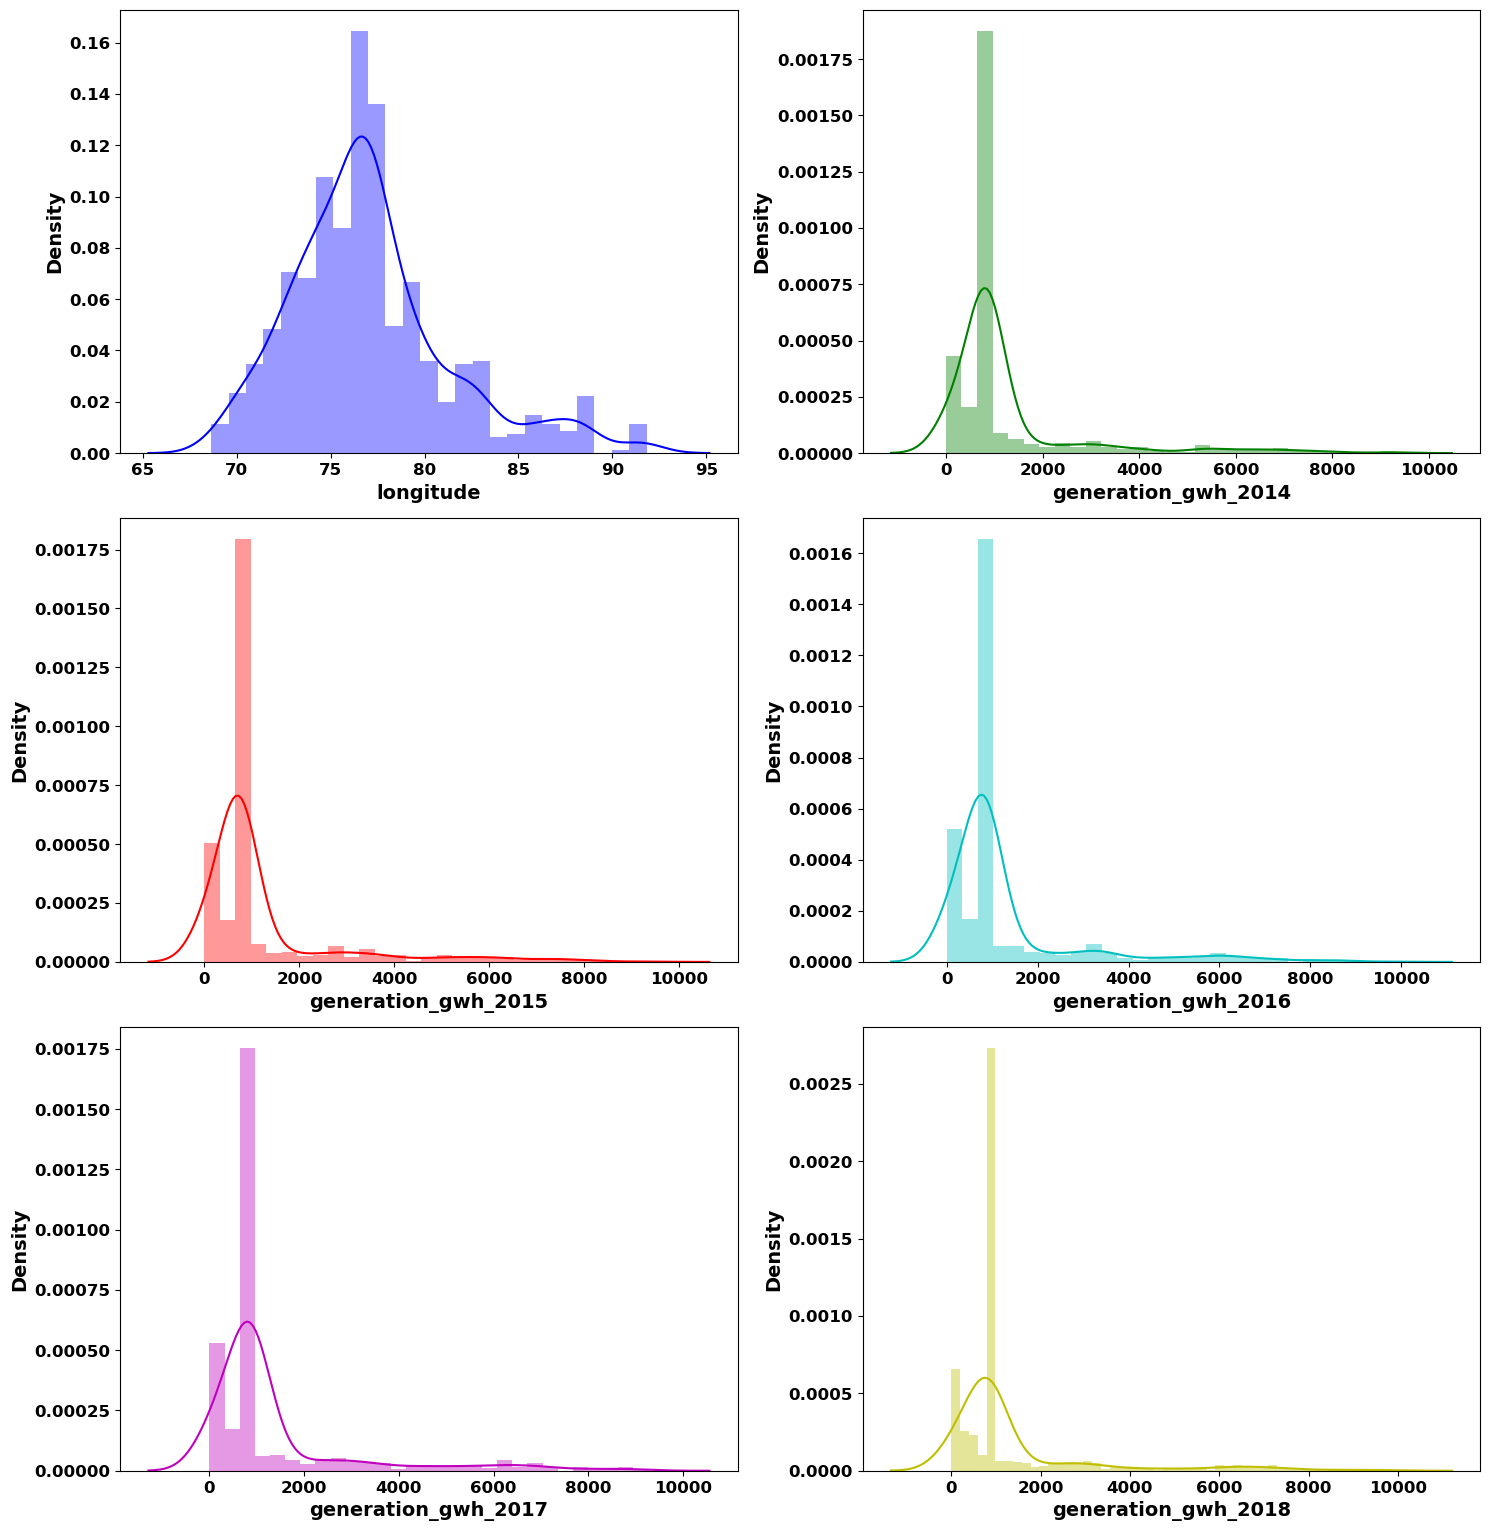

In [102]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [103]:
df_num.skew().sort_values(ascending=False) 

generation_gwh_2014    2.971278
generation_gwh_2015    2.747919
generation_gwh_2016    2.669710
generation_gwh_2018    2.627497
generation_gwh_2017    2.574148
longitude              0.961559
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to reduce skewness

In [104]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

generation_gwh_2014    0.224160
generation_gwh_2015    0.160612
generation_gwh_2016    0.133285
generation_gwh_2018    0.125614
generation_gwh_2017    0.119749
longitude             -0.001964
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.2,+0.2) which is inside the range of -0.5 to 0.5**

In [105]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

longitude             -0.000022
generation_gwh_2015   -0.045369
generation_gwh_2017   -0.046486
generation_gwh_2014   -0.050967
generation_gwh_2016   -0.050970
generation_gwh_2018   -0.051486
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method and better compared to PowerTransformer method**
- **Skewness range: (-0.05,+0.05) which is within the range of -0.5 to 0.5 which is fairly symmetrical**
- **Selected the transformed data from QuantileTransformer method**

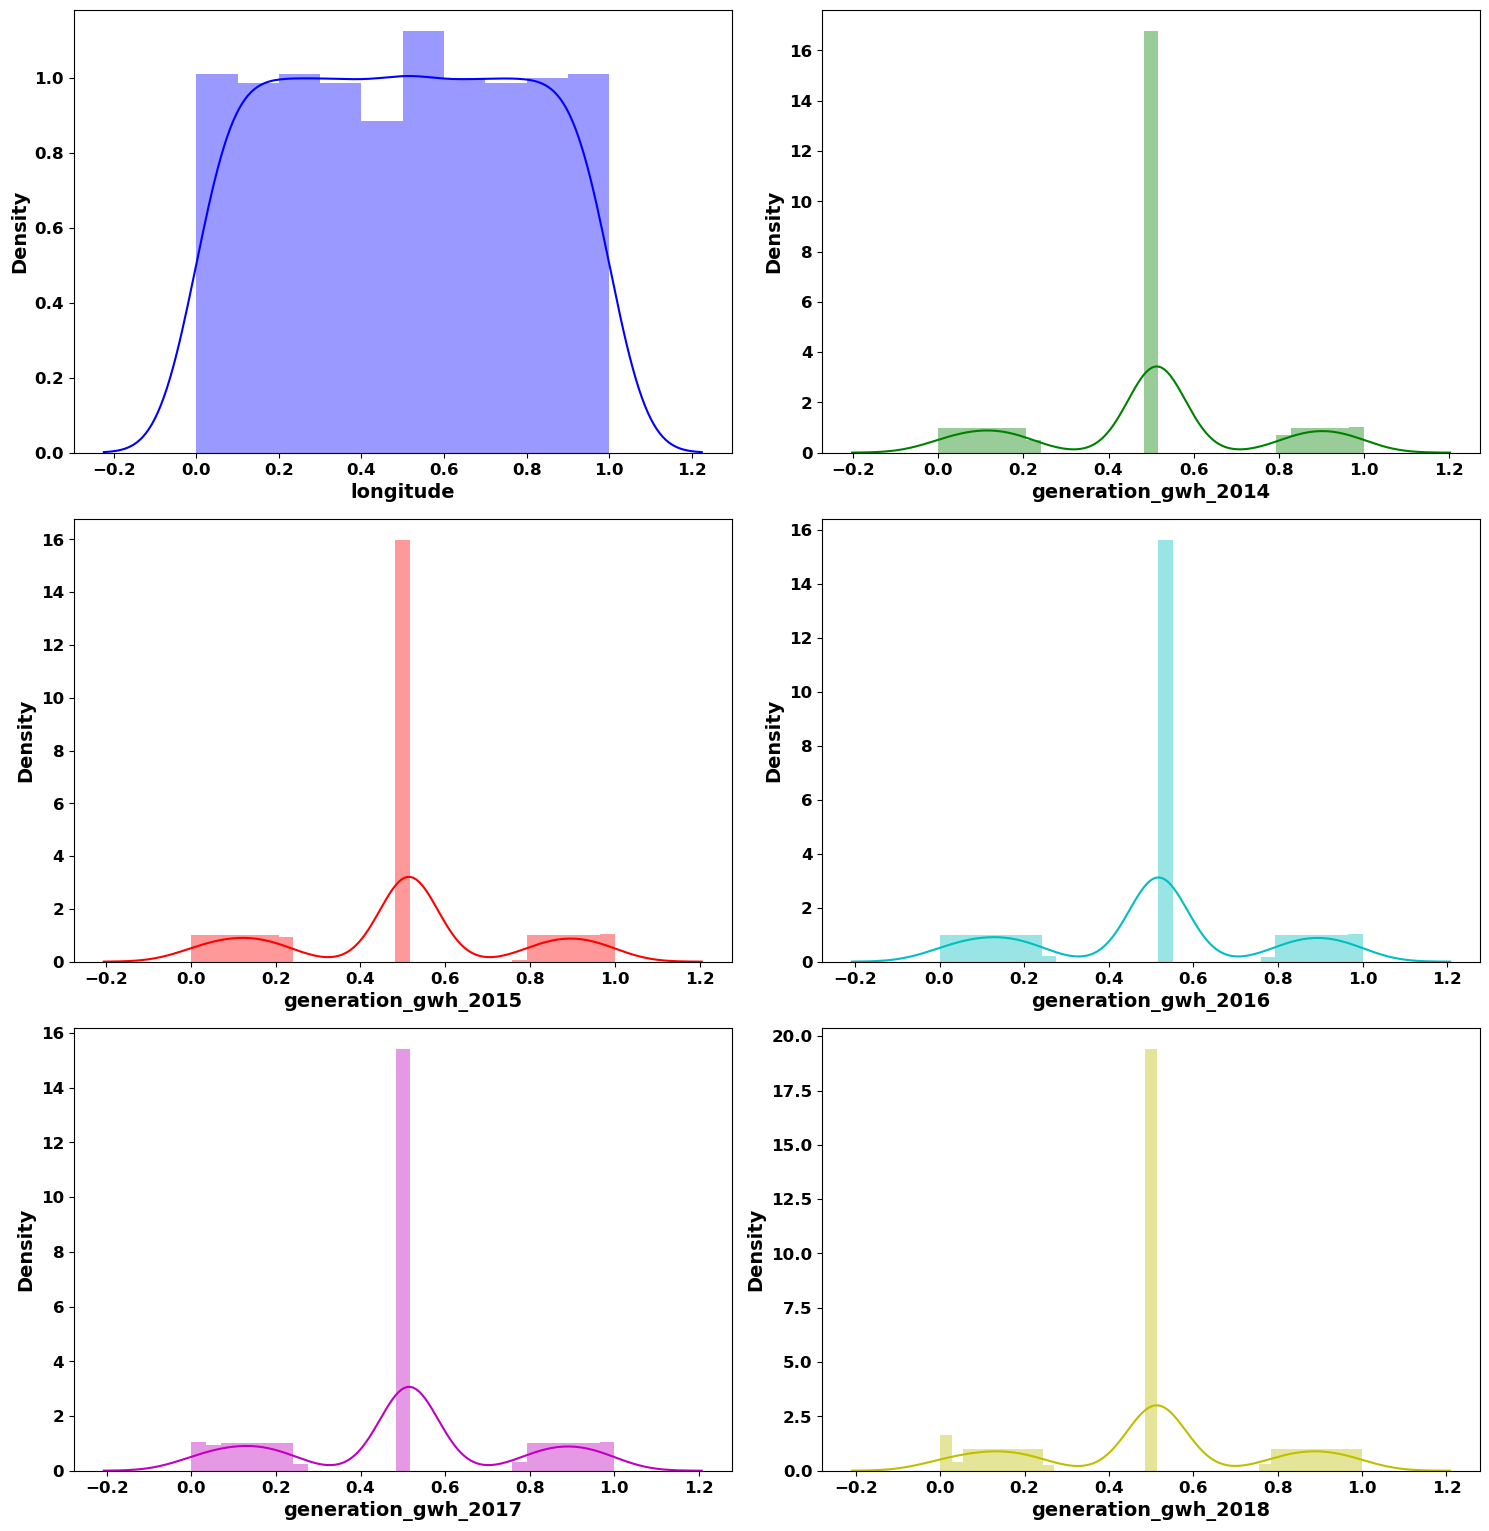

In [106]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [107]:
x_reg.shape

(871, 7)

In [108]:
x_reg.tail(5) # x data including both numerical and categorical features

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
902    80.0525           844.113738            749.26485              12.9350   
903    80.3023          5337.310000           7130.50700            8564.3790   
904    77.0225           844.113738            749.26485             827.7405   
905    85.2072          3382.000000           3362.00000            3359.0000   
906    76.6814           844.113738            749.26485             827.7405   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
902             6.567000             17.21350             3  
903          6605.259000           7111.42000             1  
904           868.042975            833.70055             3  
905          3384.000000           3224.00000             1  
906           868.042975            833.70055             6

In [109]:
new_x=x_reg.reset_index(drop=True)  # reset the index of x data

In [110]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
866    80.0525           844.113738            749.26485              12.9350   
867    80.3023          5337.310000           7130.50700            8564.3790   
868    77.0225           844.113738            749.26485             827.7405   
869    85.2072          3382.000000           3362.00000            3359.0000   
870    76.6814           844.113738            749.26485             827.7405   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
866             6.567000             17.21350             3  
867          6605.259000           7111.42000             1  
868           868.042975            833.70055             3  
869          3384.000000           3224.00000             1  
870           868.042975            833.70055             6

In [111]:
x_qtr.head(5)  # Transformed numerical data

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0   0.096552             0.513218             0.514368             0.063218   
1   0.697701             0.868966             0.959770             0.841379   
2   0.080460             0.513218             0.514368             0.517241   
3   0.514368             0.513218             0.514368             0.517241   
4   0.514368             0.513218             0.514368             0.517241   

   generation_gwh_2017  generation_gwh_2018  
0             0.191954             0.196552  
1             0.920690             0.911494  
2             0.514943             0.513218  
3             0.514943             0.513218  
4             0.514943             0.513218

In [112]:
for i in x_qtr.columns:  
    new_x[i]=x_qtr[i]

In [113]:
new_x.head(5)  # Grouped x data with tranformed numerical data and categorical data

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0   0.096552             0.513218             0.514368             0.063218   
1   0.697701             0.868966             0.959770             0.841379   
2   0.080460             0.513218             0.514368             0.517241   
3   0.514368             0.513218             0.514368             0.517241   
4   0.514368             0.513218             0.514368             0.517241   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0             0.191954             0.196552             1  
1             0.920690             0.911494             1  
2             0.514943             0.513218             6  
3             0.514943             0.513218             6  
4             0.514943             0.513218             3

In [114]:
new_x.shape

(871, 7)

In [115]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

## Scaling data

In [116]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

longitude  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0  -1.396084             0.052669             0.056056            -1.636532   
1   0.684114             1.418603             1.739528             1.282916   
2  -1.451768             0.052669             0.056056             0.066839   
3   0.049713             0.052669             0.056056             0.066839   
4   0.049713             0.052669             0.056056             0.066839   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0            -1.148637            -1.125113     -0.984368  
1             1.574447             1.531642     -0.984368  
2             0.058282             0.051633      1.191735  
3             0.058282             0.051633      1.191735  
4             0.058282             0.051633     -0.113927

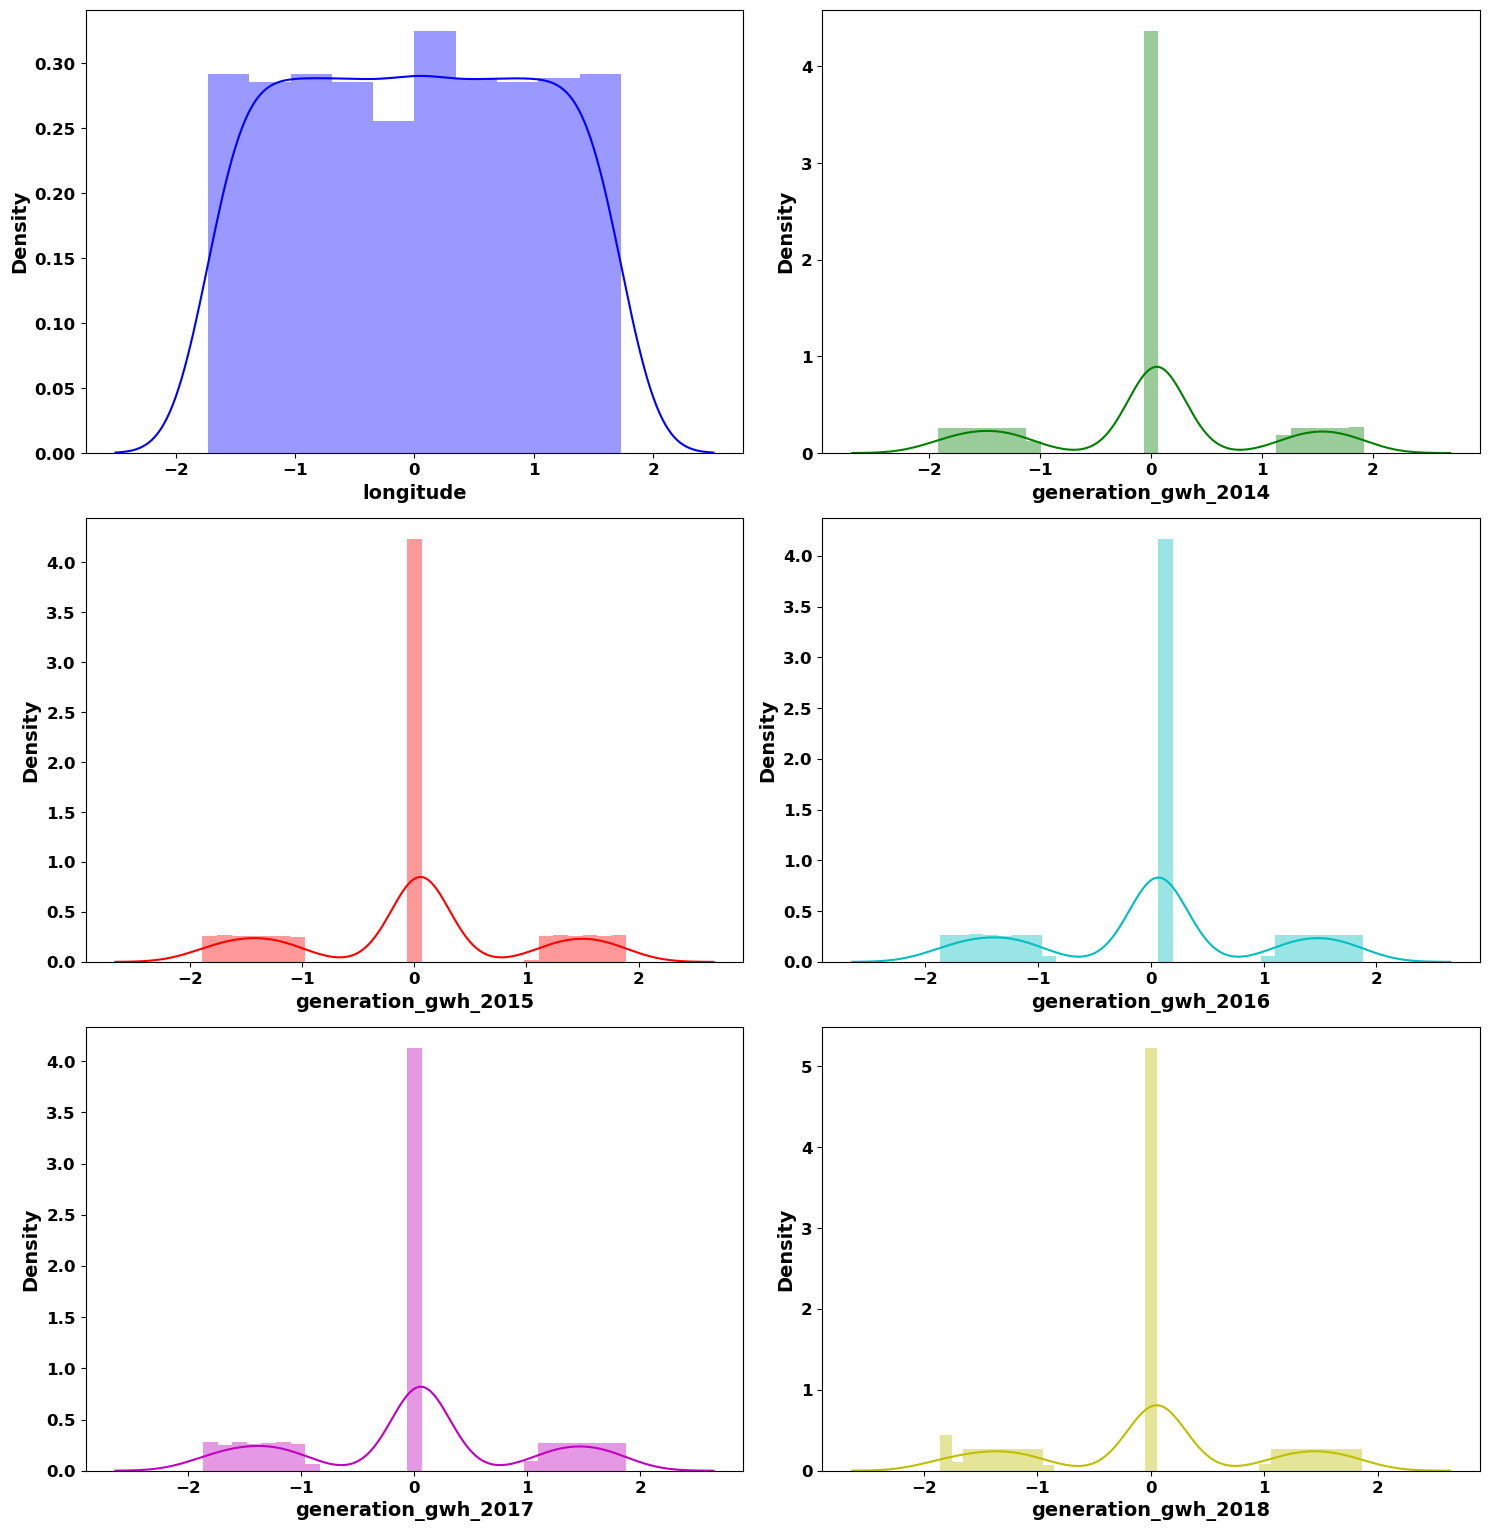

In [117]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [118]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

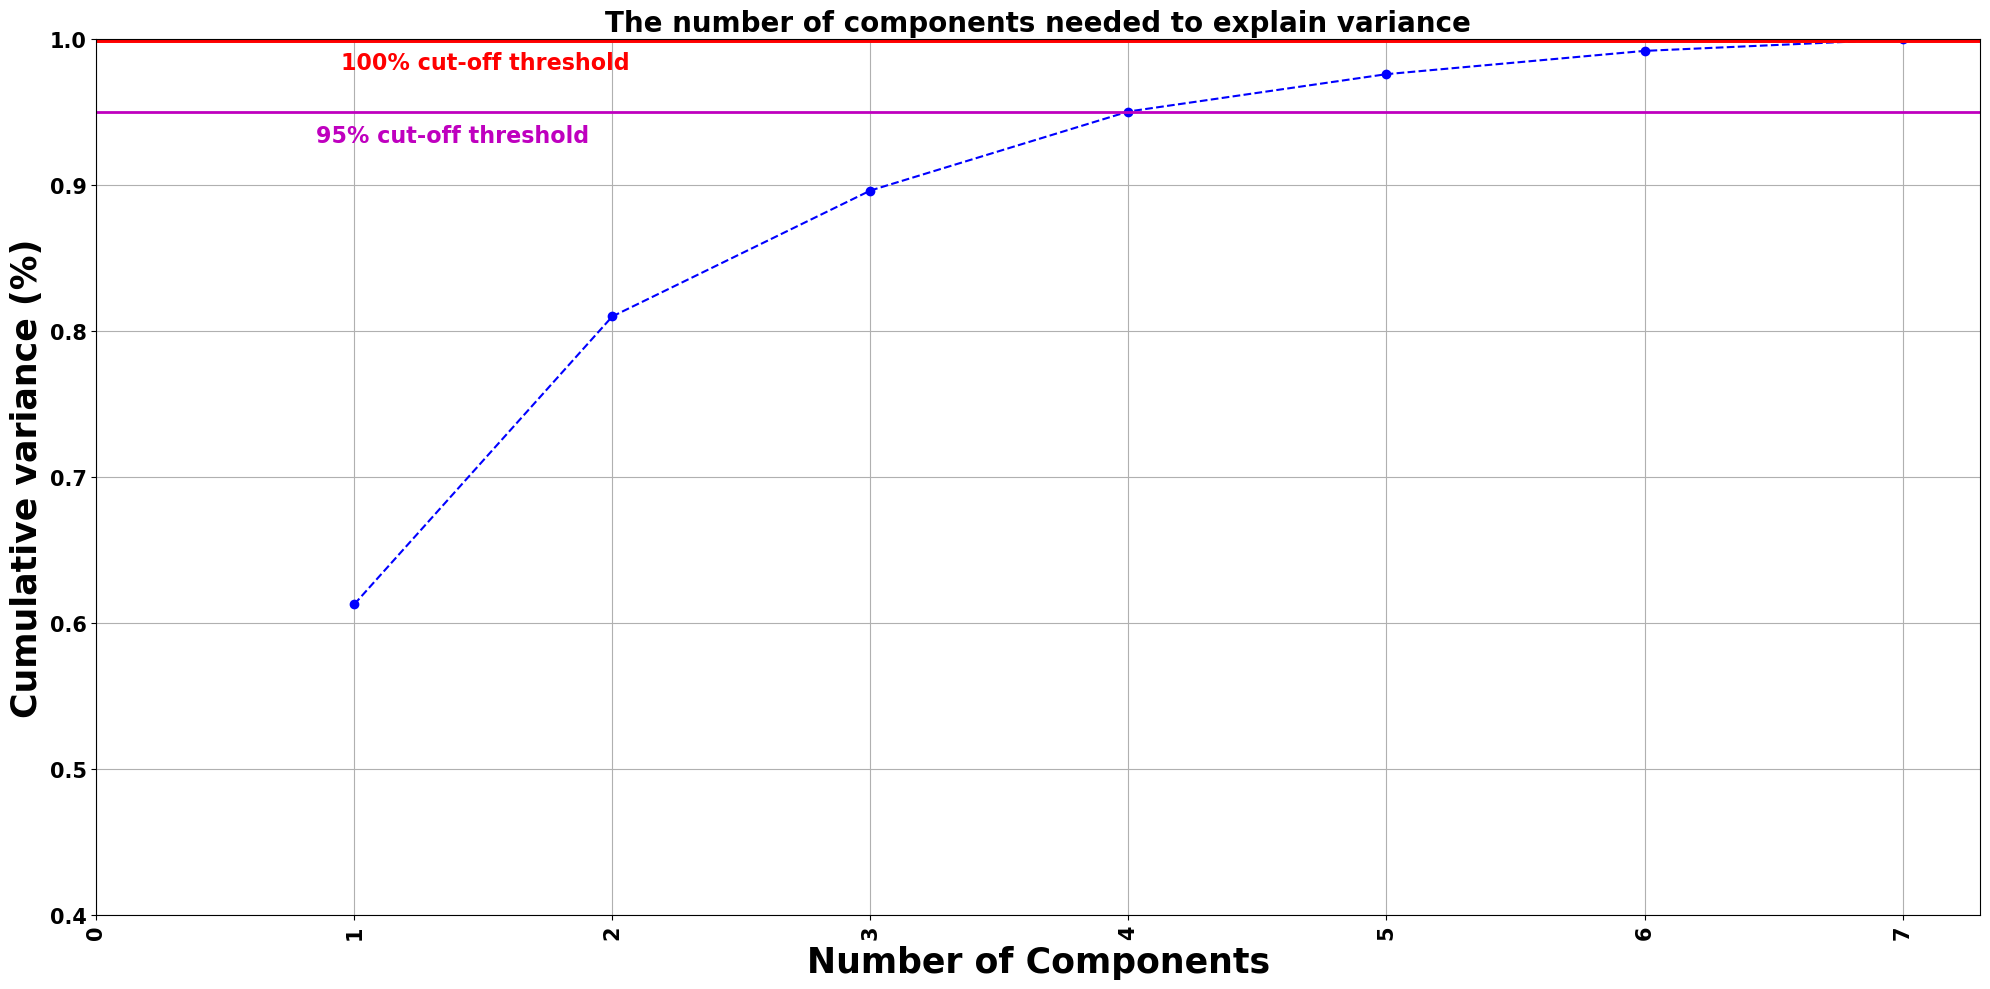

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 4 principal components attribute for 95% of variation in the data. Hence I will pick 4 components for our prediction**
- **I will use 4 features as no. of components in PCA to reduce the dimensions**

In [120]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=4)
x_reg=pca.fit_transform(x)
x_reg=pd.DataFrame(x_reg)
x_reg.head()

0         1         2         3
0 -1.671399  0.258942  1.883270 -1.046534
1  3.450084 -0.939887  0.093995 -0.125098
2  0.010571  1.874504  0.142301  0.090023
3  0.032313  0.798786 -0.892228 -0.054454
4  0.137265 -0.106034  0.041201 -0.001140

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 4 dimensions. This X data can be used for model training**

## Checking Multicollinearity again after PCA transformation

In [121]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_reg[list(x_reg.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
0  1.0       0
1  1.0       1
2  1.0       2
3  1.0       3

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [122]:
y_reg.shape

(871,)

In [123]:
x_reg.shape

(871, 4)

# CLASSIFICATION TASK EDA (To Be Continued)

In [124]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for X numerical data as the variance is applicable only for numerical data

In [125]:
# Identifying the X columns with numerical data 

In [126]:
df_clas.head(3)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0             1  
1              2014.0             1  
2              2015.0             6

In [127]:
df_clas_numerical=df_clas.drop(["primary_fuel"],axis=1)
df_clas_numerical.head(3)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   

   commissioning_year  
0              2016.0  
1              2014.0  
2              2015.0

In [128]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clas_numerical[list(df_clas_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF               Column
8  263.789883   commissioning_year
2  258.024824            longitude
6   67.713670  generation_gwh_2017
5   55.980477  generation_gwh_2016
7   55.534646  generation_gwh_2018
4   42.938024  generation_gwh_2015
3   18.443743  generation_gwh_2014
1   13.328372             latitude
0    6.034591          capacity_mw

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there are multiple features with VIF values > 10, I will use PCA to reduce the no. of features**

## Checking Outliers

In [129]:
# We check outliers on X numerical data
df_outliers=df_clas_numerical.copy()
df_outliers.head(5)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   
3         28.0   21.8948    76.6814           844.113738            749.26485   
4          9.3   21.8948    76.6814           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   
3             827.7405           868.042975            833.70055   
4             827.7405           868.042975            833.70055   

   commissioning_year  
0              2016.0  
1              2014.0  
2              2015.0  
3              2014.0  
4              1949.0

In [130]:
df_outliers.shape

(907, 9)

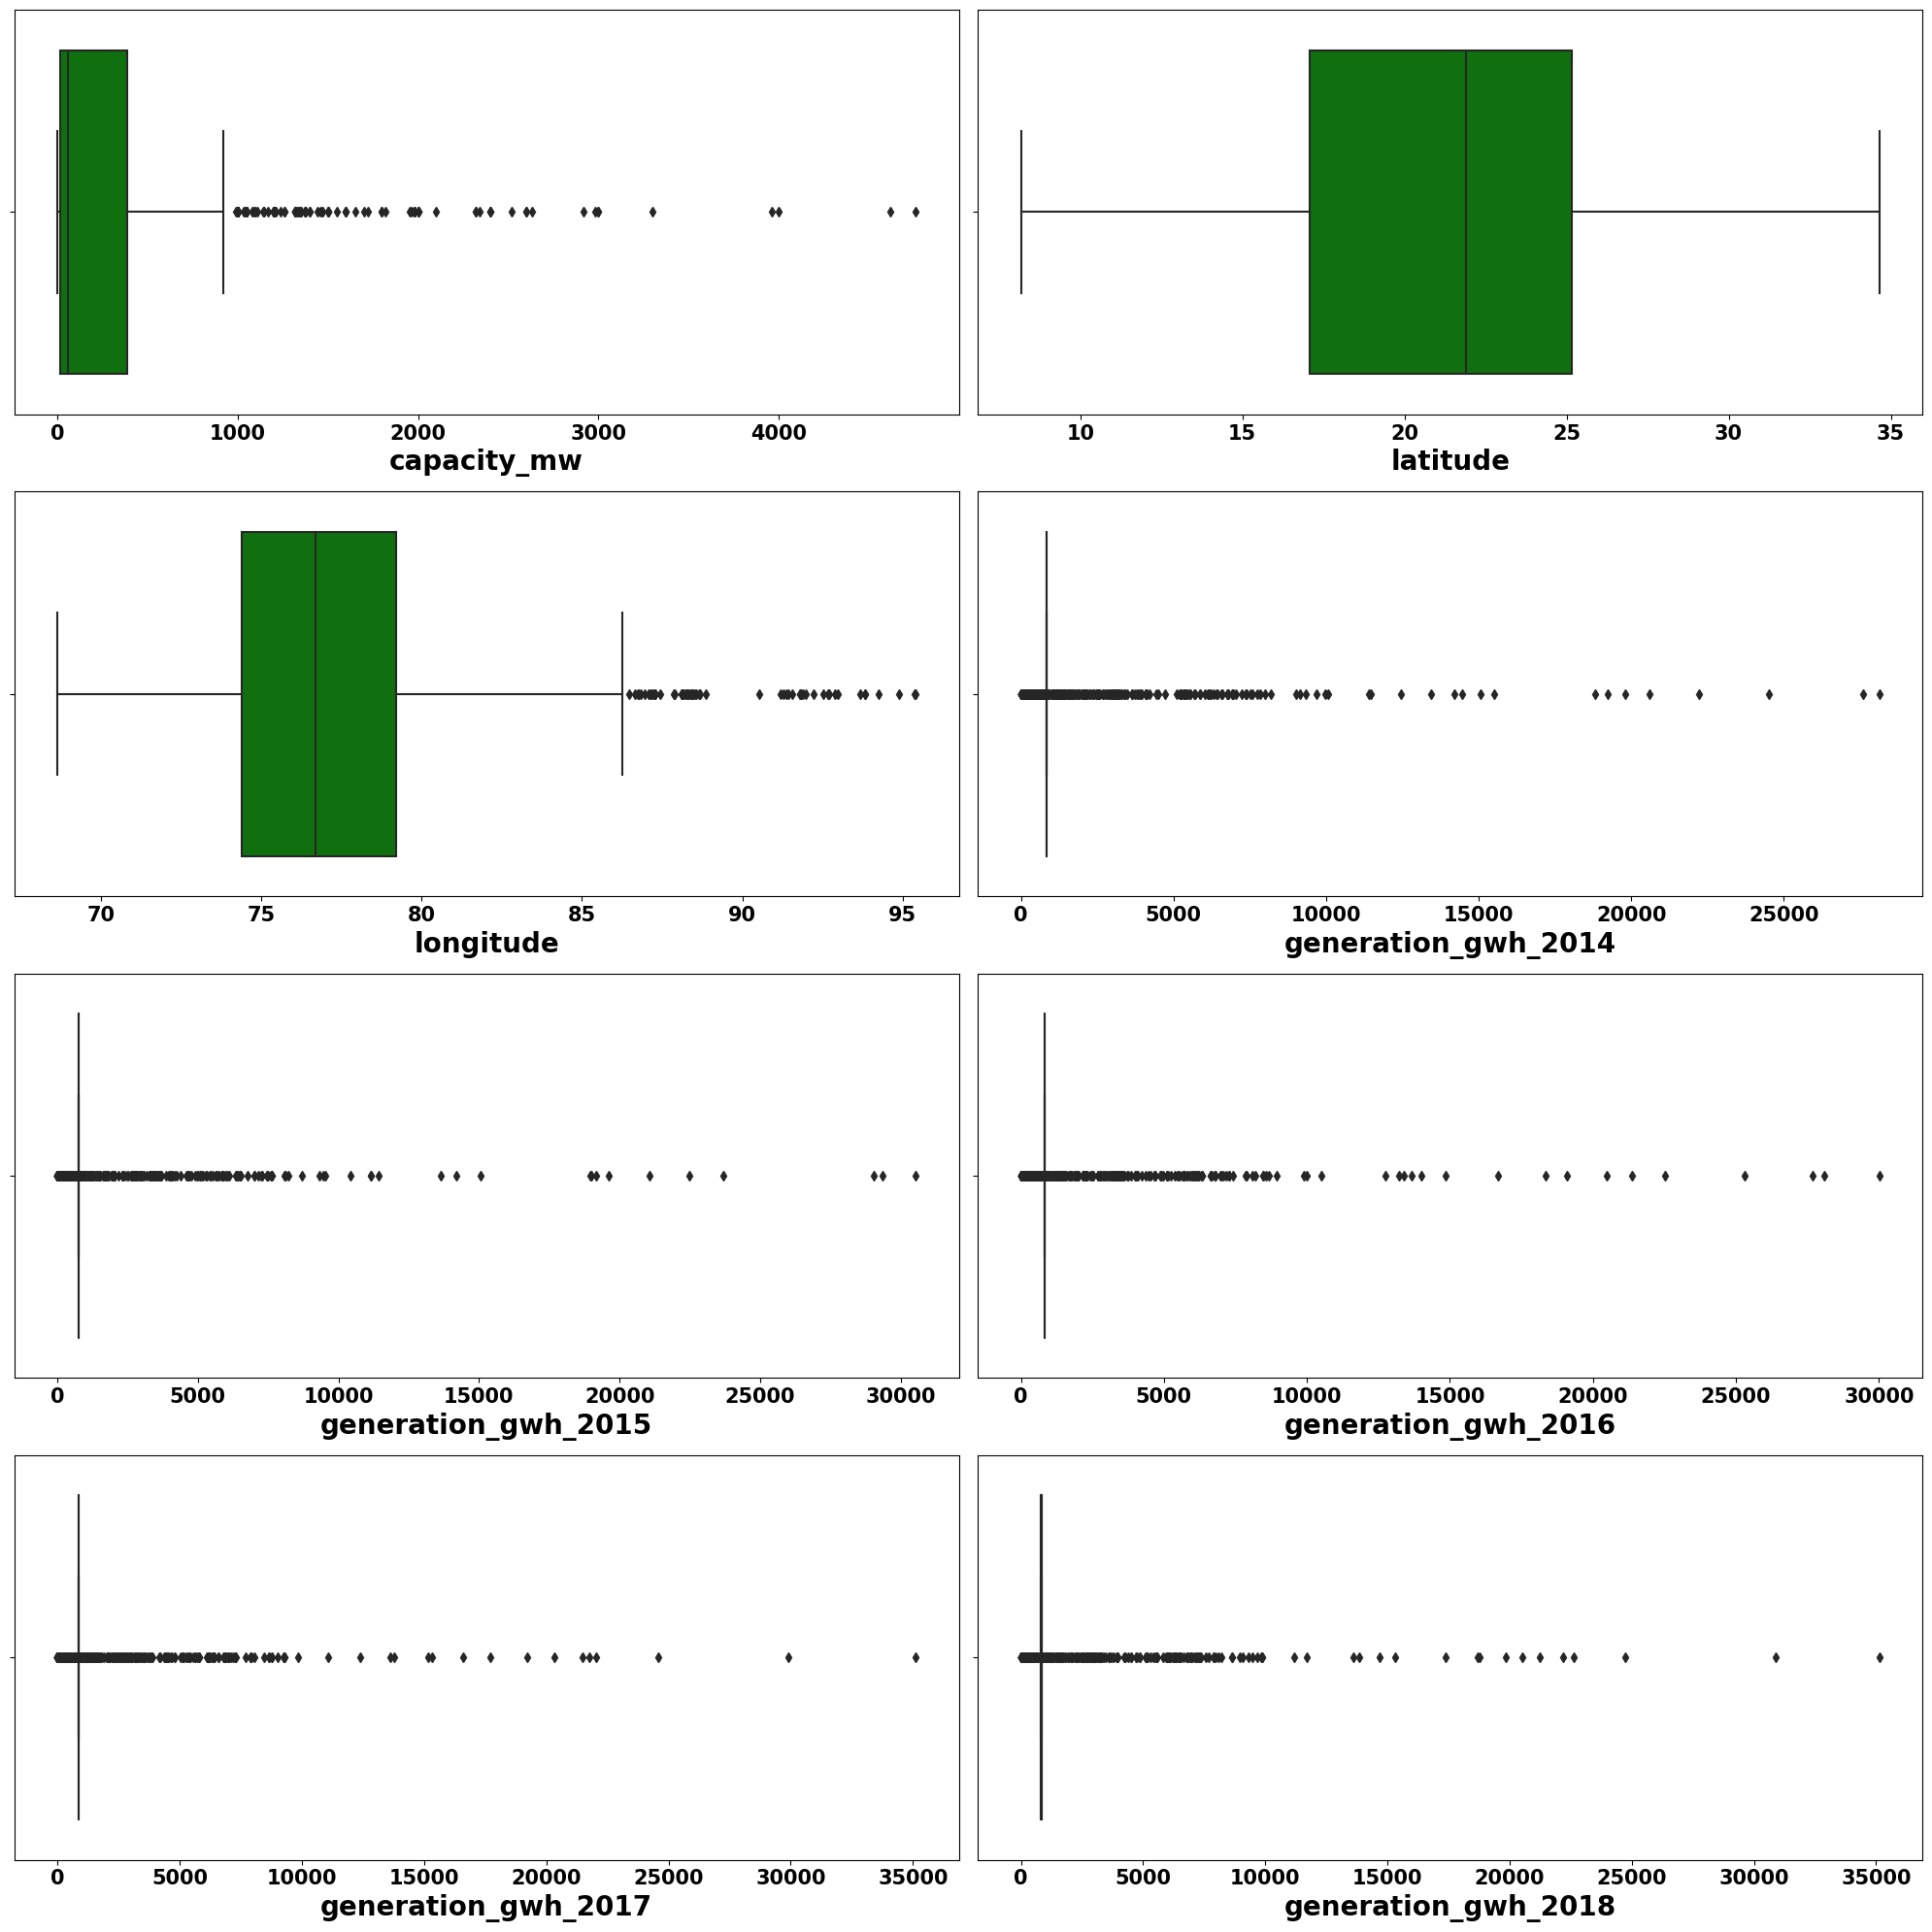

In [131]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

## Removing Outliers using z-score method

In [132]:
df_outliers.shape

(907, 9)

In [133]:
df_clas.shape

(907, 10)

In [134]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([  4,  15,  30,  38,  58,  60,  60,  60,  60,  60,  60,  62,  63,
         66,  69,  76,  76,  76,  76,  76,  76,  84, 102, 105, 105, 105,
        105, 105, 105, 125, 146, 228, 228, 228, 228, 228, 236, 237, 251,
        258, 263, 265, 265, 265, 265, 265, 265, 288, 288, 289, 291, 319,
        321, 357, 357, 357, 357, 357, 357, 401, 401, 401, 401, 401, 401,
        419, 421, 421, 421, 421, 421, 447, 460, 472, 472, 472, 472, 472,
        472, 480, 509, 509, 509, 509, 509, 509, 519, 519, 519, 519, 519,
        519, 545, 571, 578, 583, 623, 623, 623, 623, 623, 627, 627, 627,
        627, 627, 627, 652, 653, 670, 671, 703, 703, 703, 703, 703, 703,
        727, 744, 747, 761, 783, 794, 798, 864, 885, 885, 885, 885, 885,
        885, 890, 890, 890, 890, 890, 890], dtype=int64),
 array([8, 2, 0, 0, 8, 0, 3, 4, 5, 6, 7, 3, 3, 8, 8, 0, 3, 4, 5, 6, 7, 2,
        8, 0, 3, 4, 5, 6, 7, 8, 2, 0, 4, 5, 6, 7, 8, 2, 2, 2, 8, 0, 3, 4,
        5, 6, 7, 0, 7, 0, 8, 8, 8, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5,

In [135]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_clas_1=df_clas[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

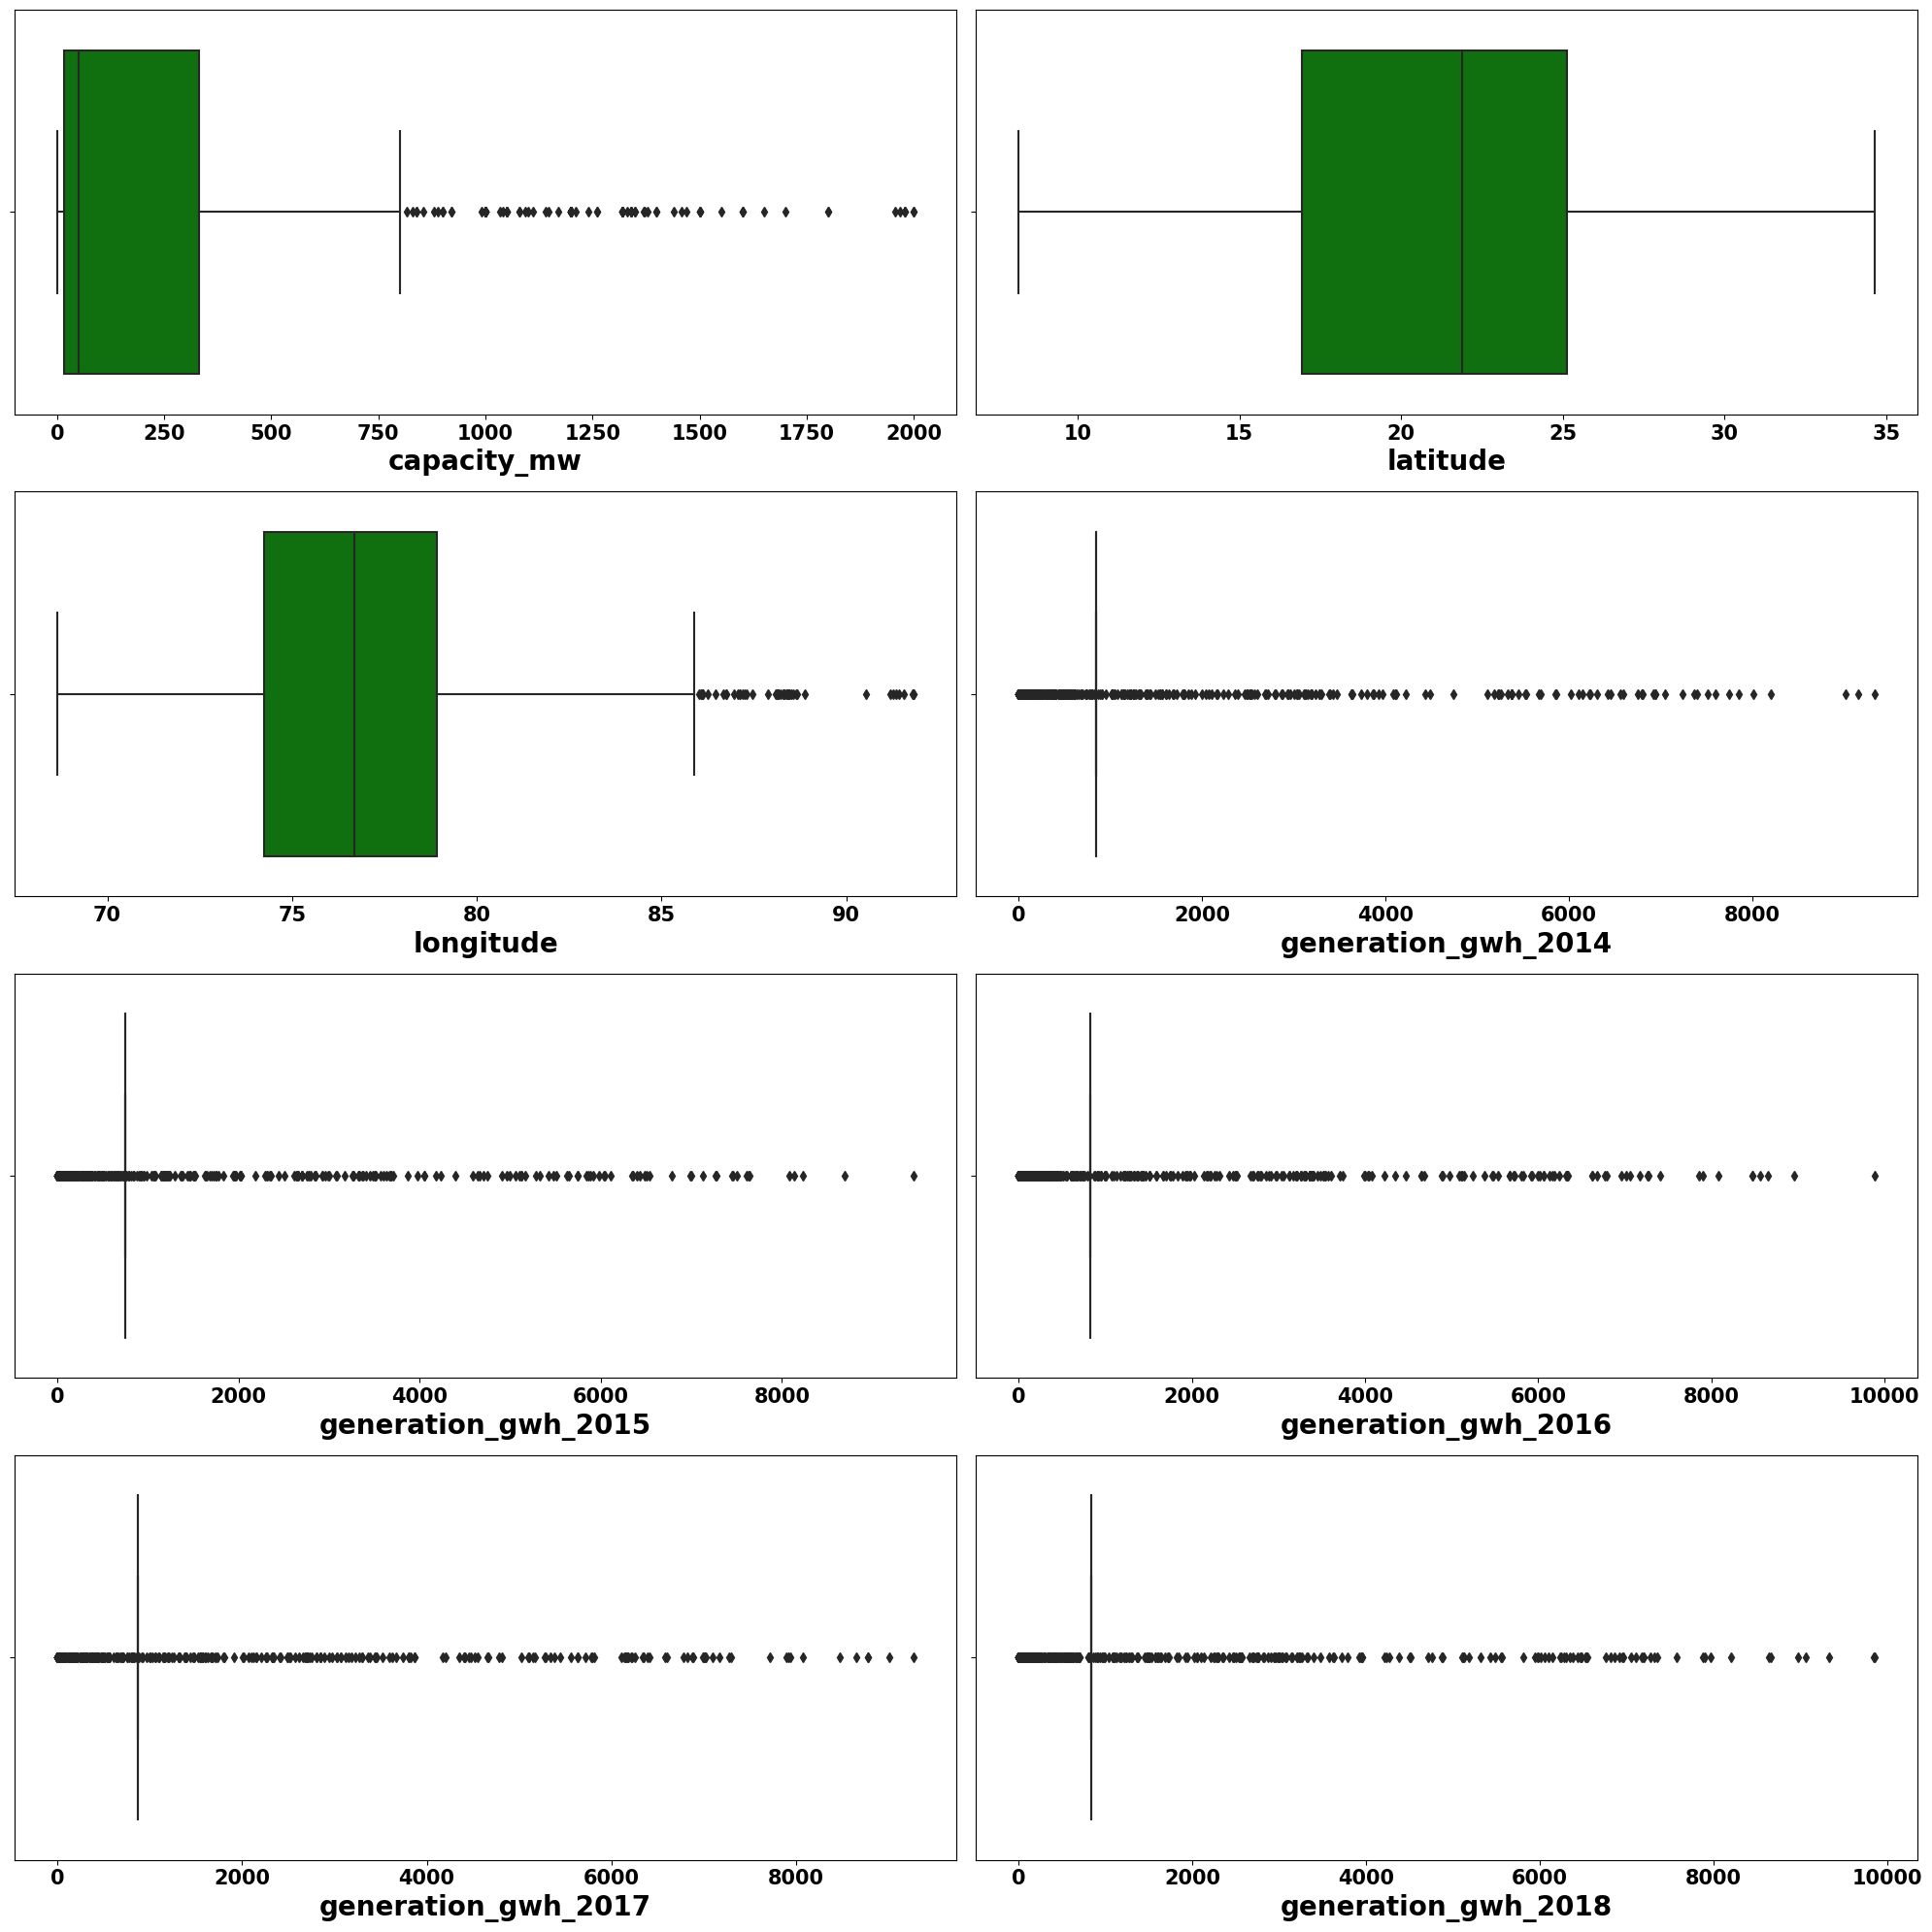

In [136]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [137]:
df_clas_1.shape

(848, 10)

In [138]:
df_clas.shape

(907, 10)

In [139]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_clas.shape[0]-df_clas_1.shape[0])/df_clas.shape[0]*100,1)
loss_percent_zscore

6.5

#### Observations:
- **Data loss with z-score method is 6.5%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

## Removing Outliers using IQR method

In [140]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_clas_2 = df_clas[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

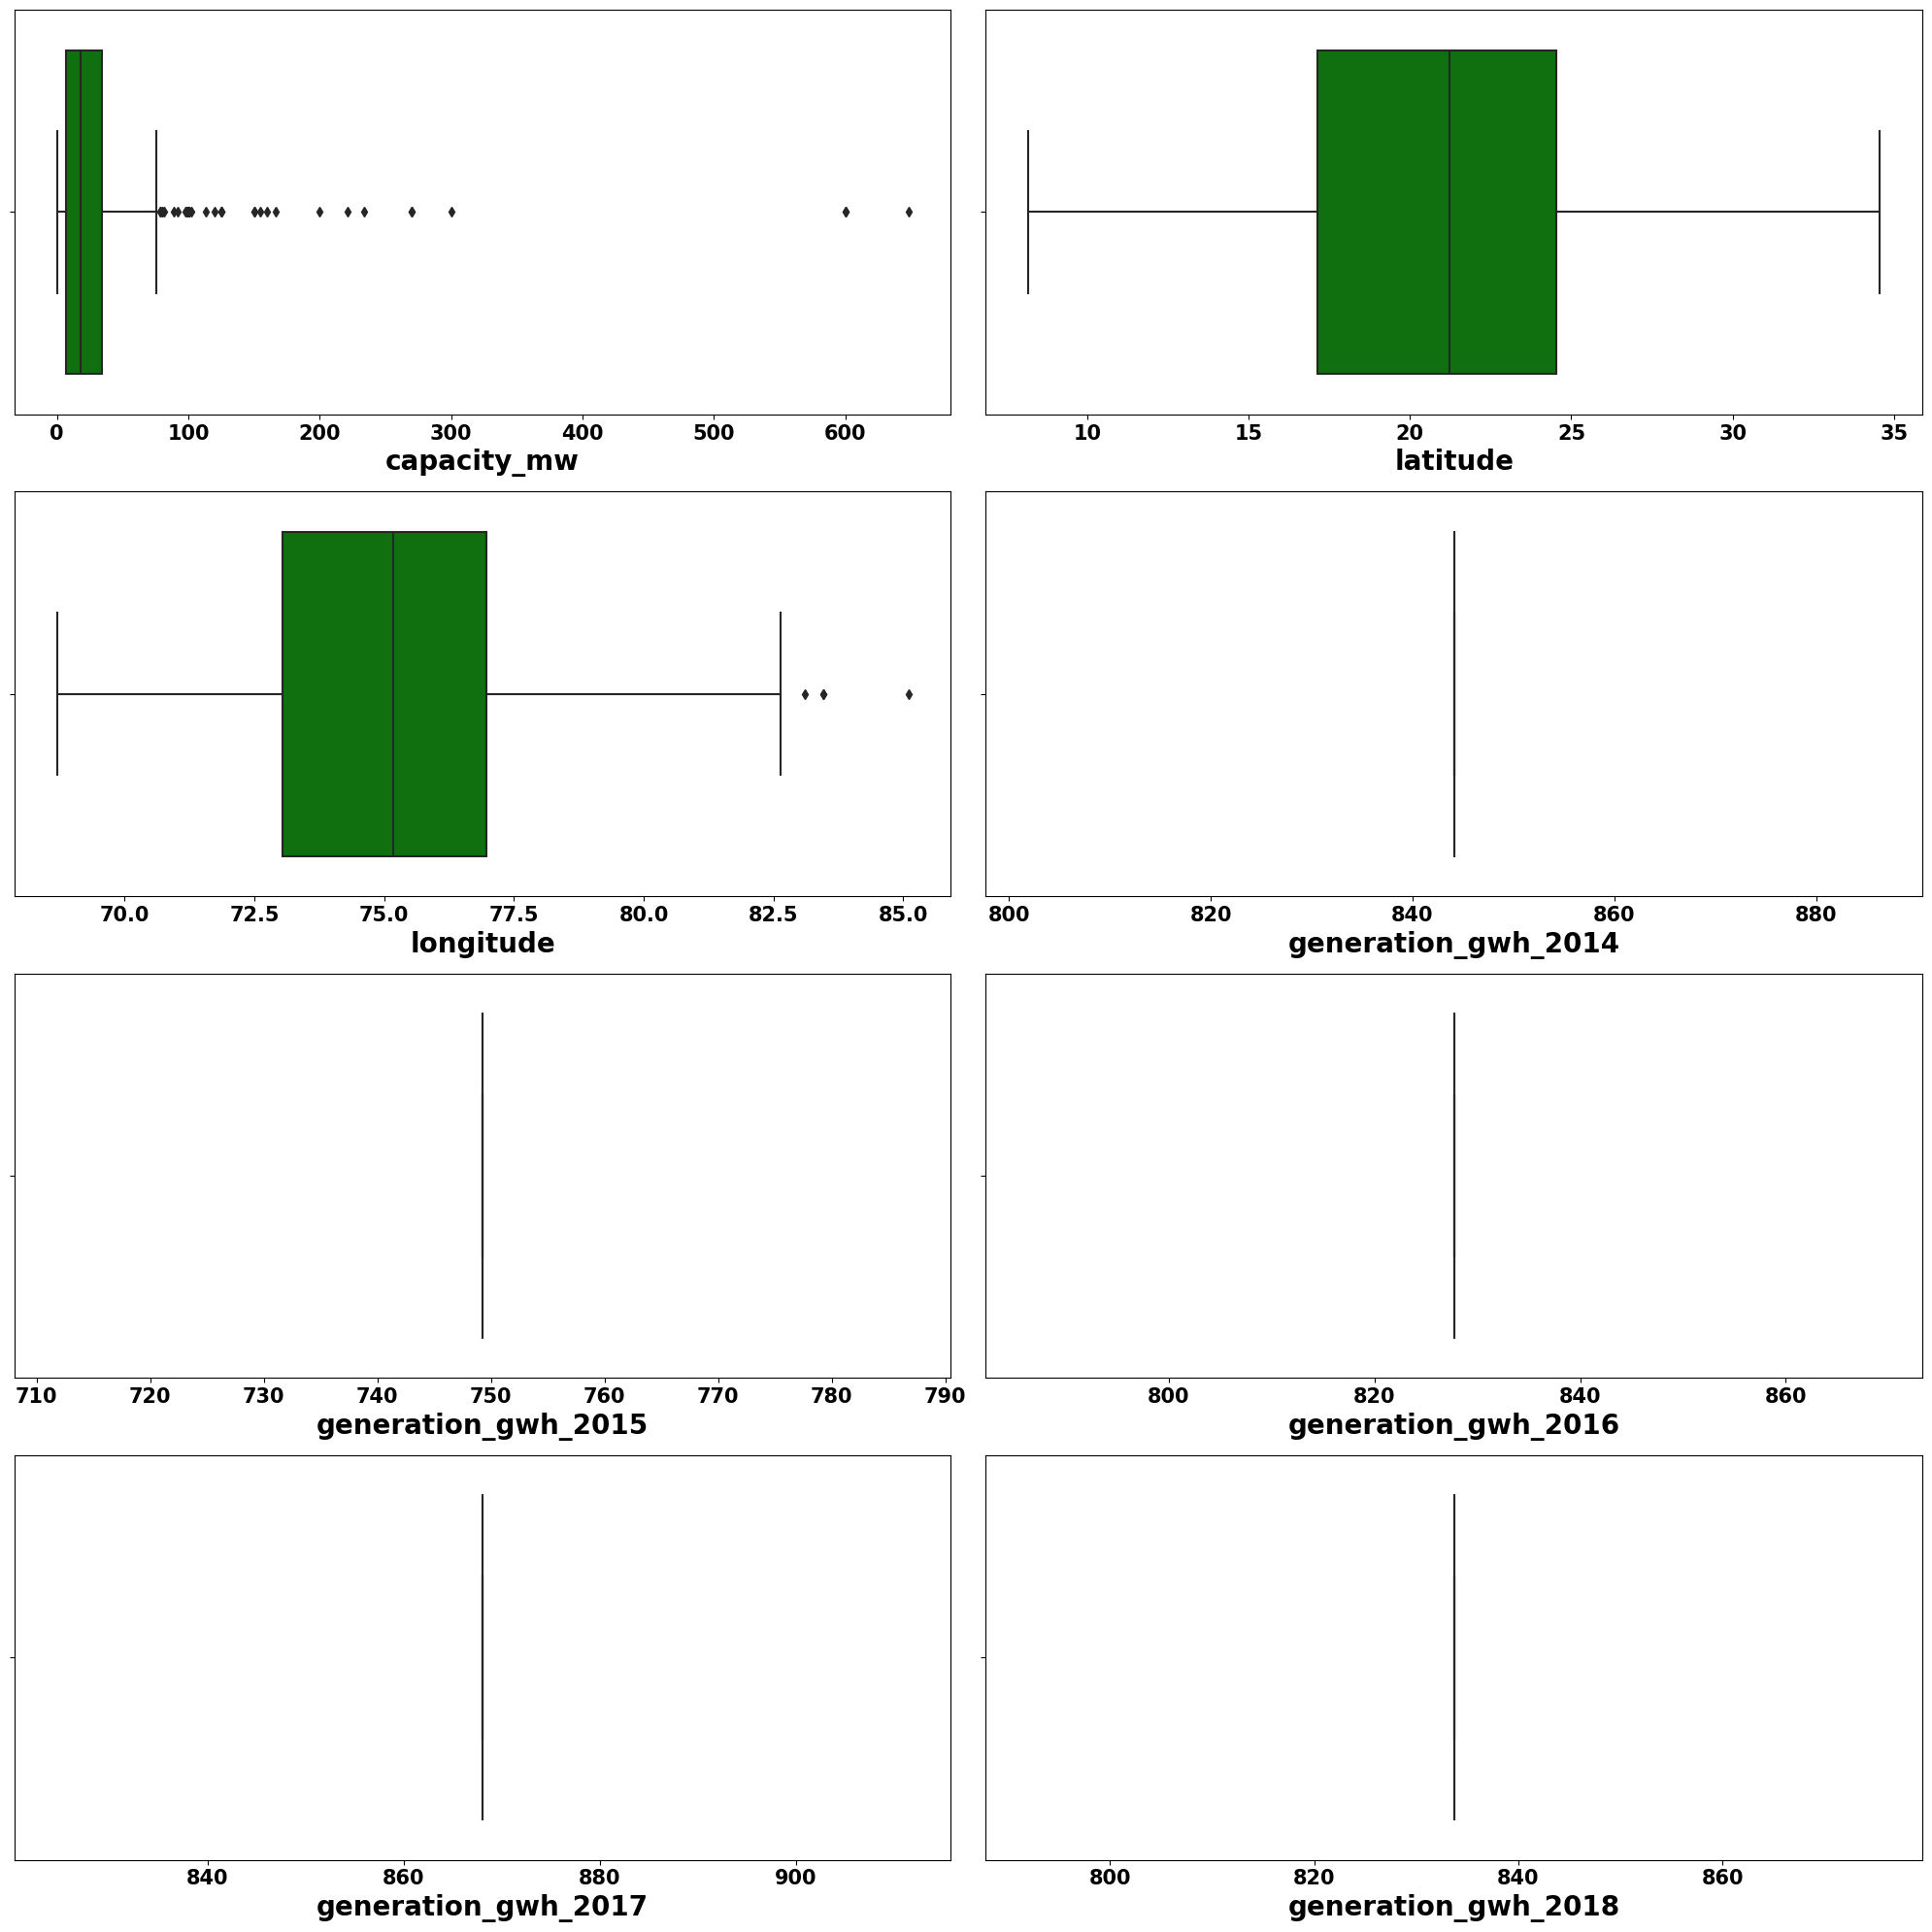

In [141]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df_clas_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [142]:
df_clas_2.shape

(439, 10)

In [143]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_clas.shape[0]-df_clas_2.shape[0])/df_clas.shape[0]*100,1)
display(loss_percent_IQR)

51.6

#### Observations: 
- **Data loss with IQR is 51.6% which is higher than data loss with z-score (6.5%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [144]:
df_clas_1.head(3)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   

   commissioning_year  primary_fuel  
0              2016.0             1  
1              2014.0             1  
2              2015.0             6

In [145]:
x_clas=df_clas_1.drop(['primary_fuel'],axis=1)
y_clas=df_clas_1["primary_fuel"].copy()
df_clas=df_clas_1

In [146]:
x_clas.head(3)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0        500.0   21.5837    72.2222           844.113738            749.26485   
1       1350.0   21.0782    77.9009          1920.971000           5629.66300   
2         15.2   23.9151    71.9424           844.113738            749.26485   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              49.9230           432.135000            467.43000   
1            1701.0080          4350.558000           3717.15400   
2             827.7405           868.042975            833.70055   

   commissioning_year  
0              2016.0  
1              2014.0  
2              2015.0

In [147]:
y_clas.head(3)

0    1
1    1
2    6
Name: primary_fuel, dtype: int32

## Skewness Check

In [148]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_clas.copy()

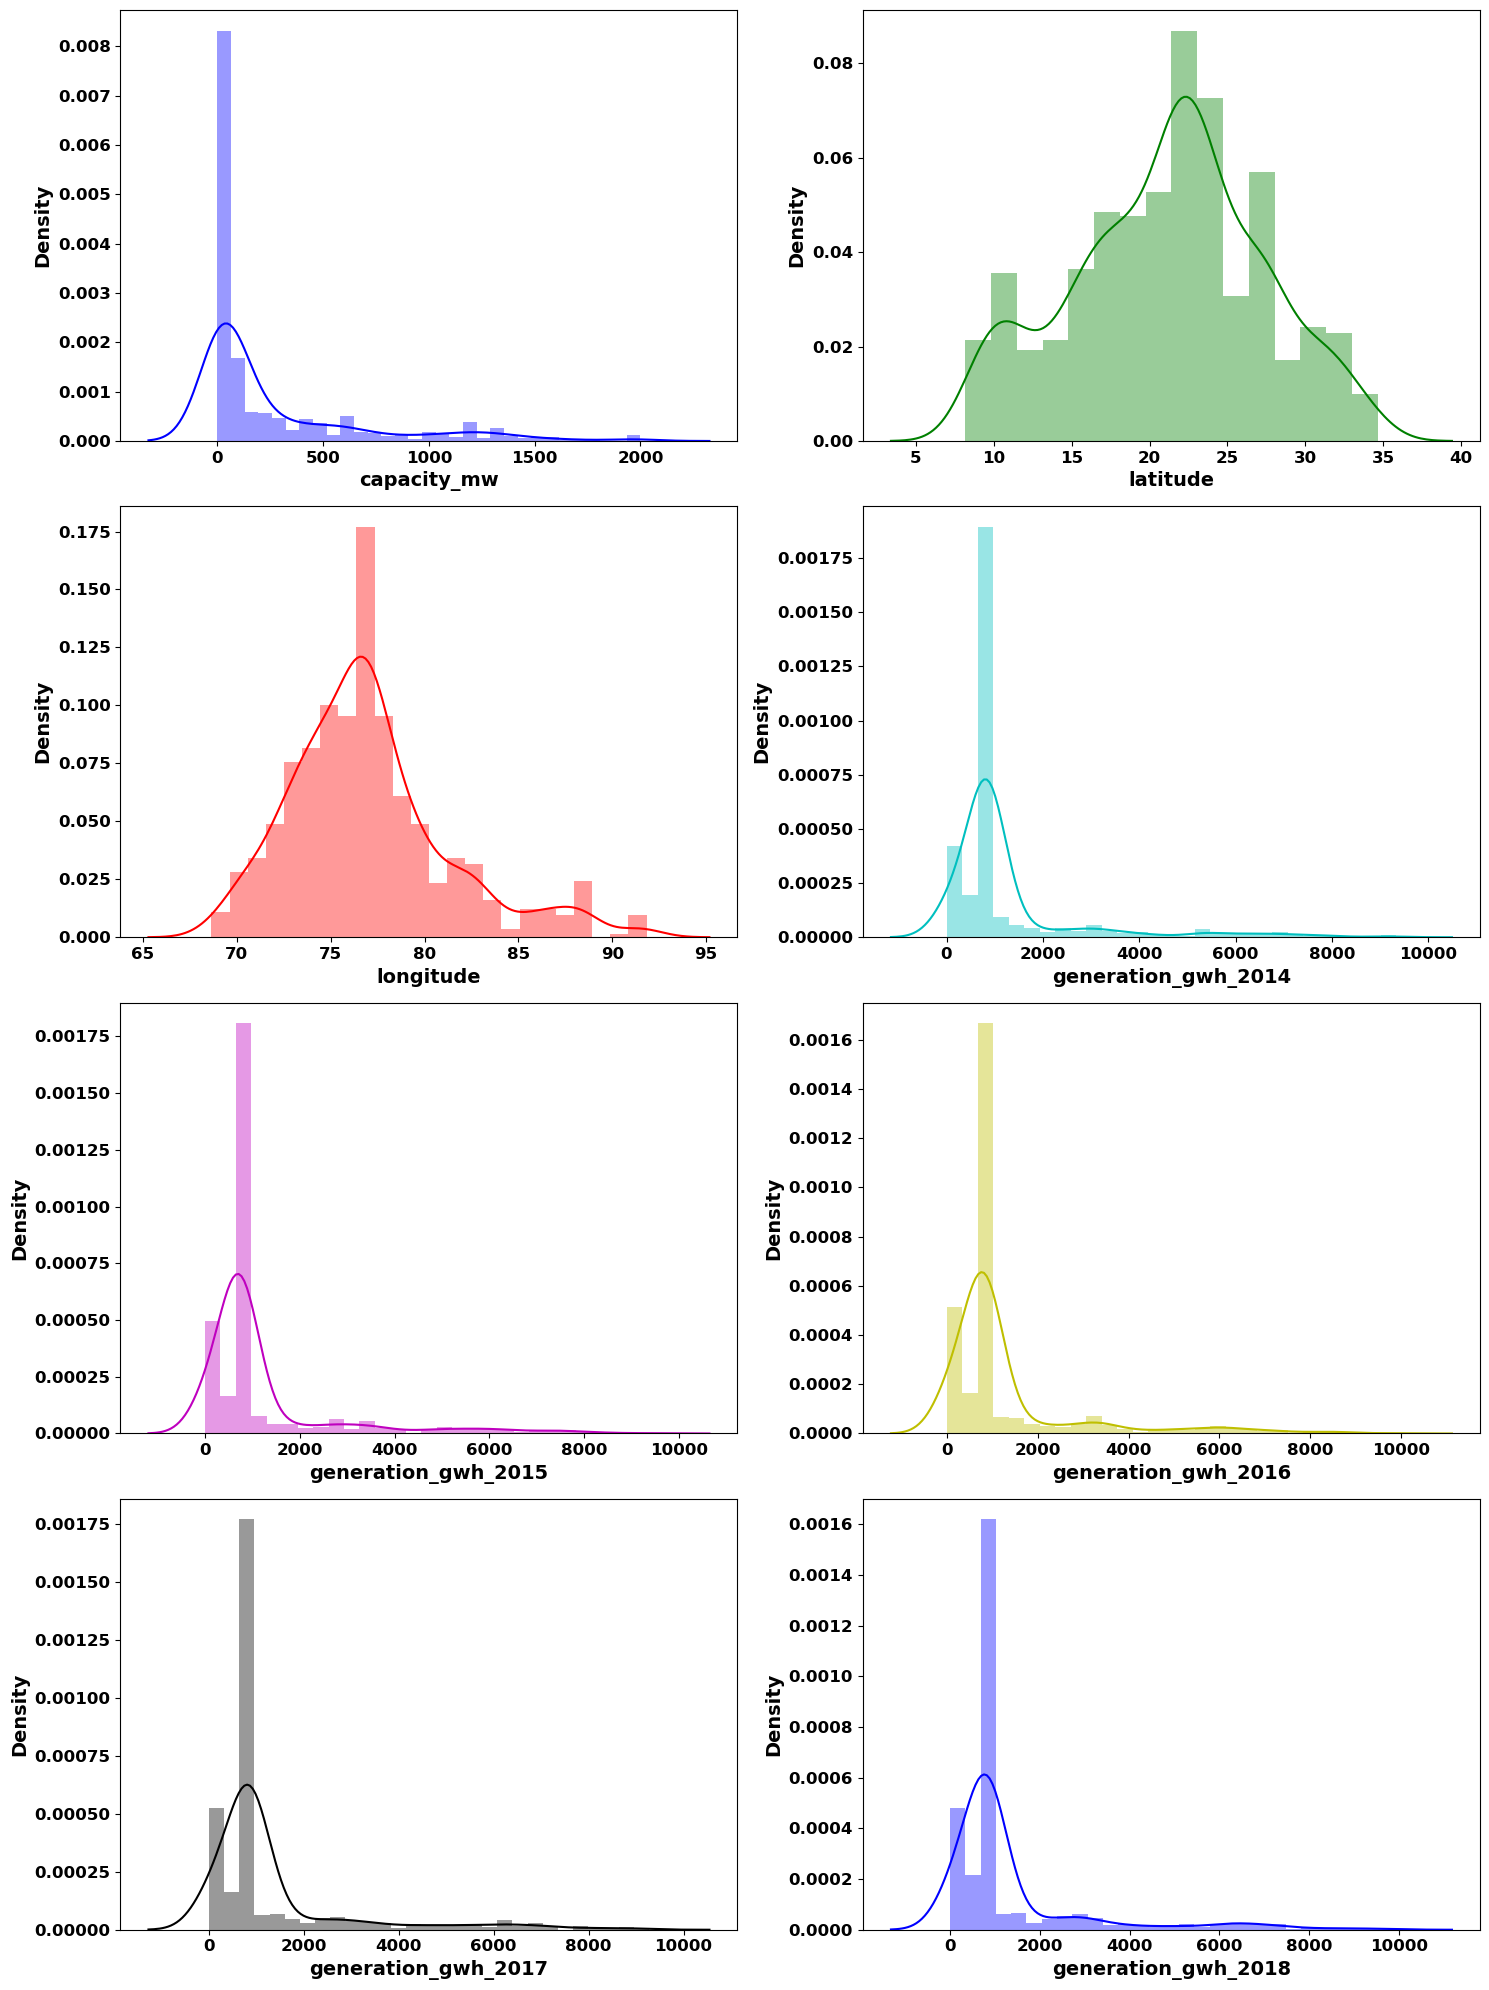

In [149]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [150]:
df_num.skew().sort_values(ascending=False) 

generation_gwh_2014    2.957800
generation_gwh_2015    2.760025
generation_gwh_2016    2.691377
generation_gwh_2018    2.659581
generation_gwh_2017    2.593587
capacity_mw            1.996260
longitude              0.952912
latitude              -0.130753
commissioning_year    -1.540498
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to remove skewness

In [151]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

generation_gwh_2014    0.229399
generation_gwh_2015    0.164411
generation_gwh_2016    0.141308
generation_gwh_2018    0.125621
generation_gwh_2017    0.123091
capacity_mw            0.015749
longitude              0.000063
latitude              -0.073014
commissioning_year    -1.104914
dtype: float64

### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-1.1,+1.1) which is outside the range of -0.5 to 0.5**

In [152]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

capacity_mw            0.000317
latitude              -0.000015
longitude             -0.000023
generation_gwh_2015   -0.039793
generation_gwh_2014   -0.044145
generation_gwh_2018   -0.045402
generation_gwh_2017   -0.046951
generation_gwh_2016   -0.048991
commissioning_year    -0.294649
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method**
- **Skewness range: (-0.29,+0.29) which is inside the range of -0.5 to 0.5 and is better than Power Transformer Method**

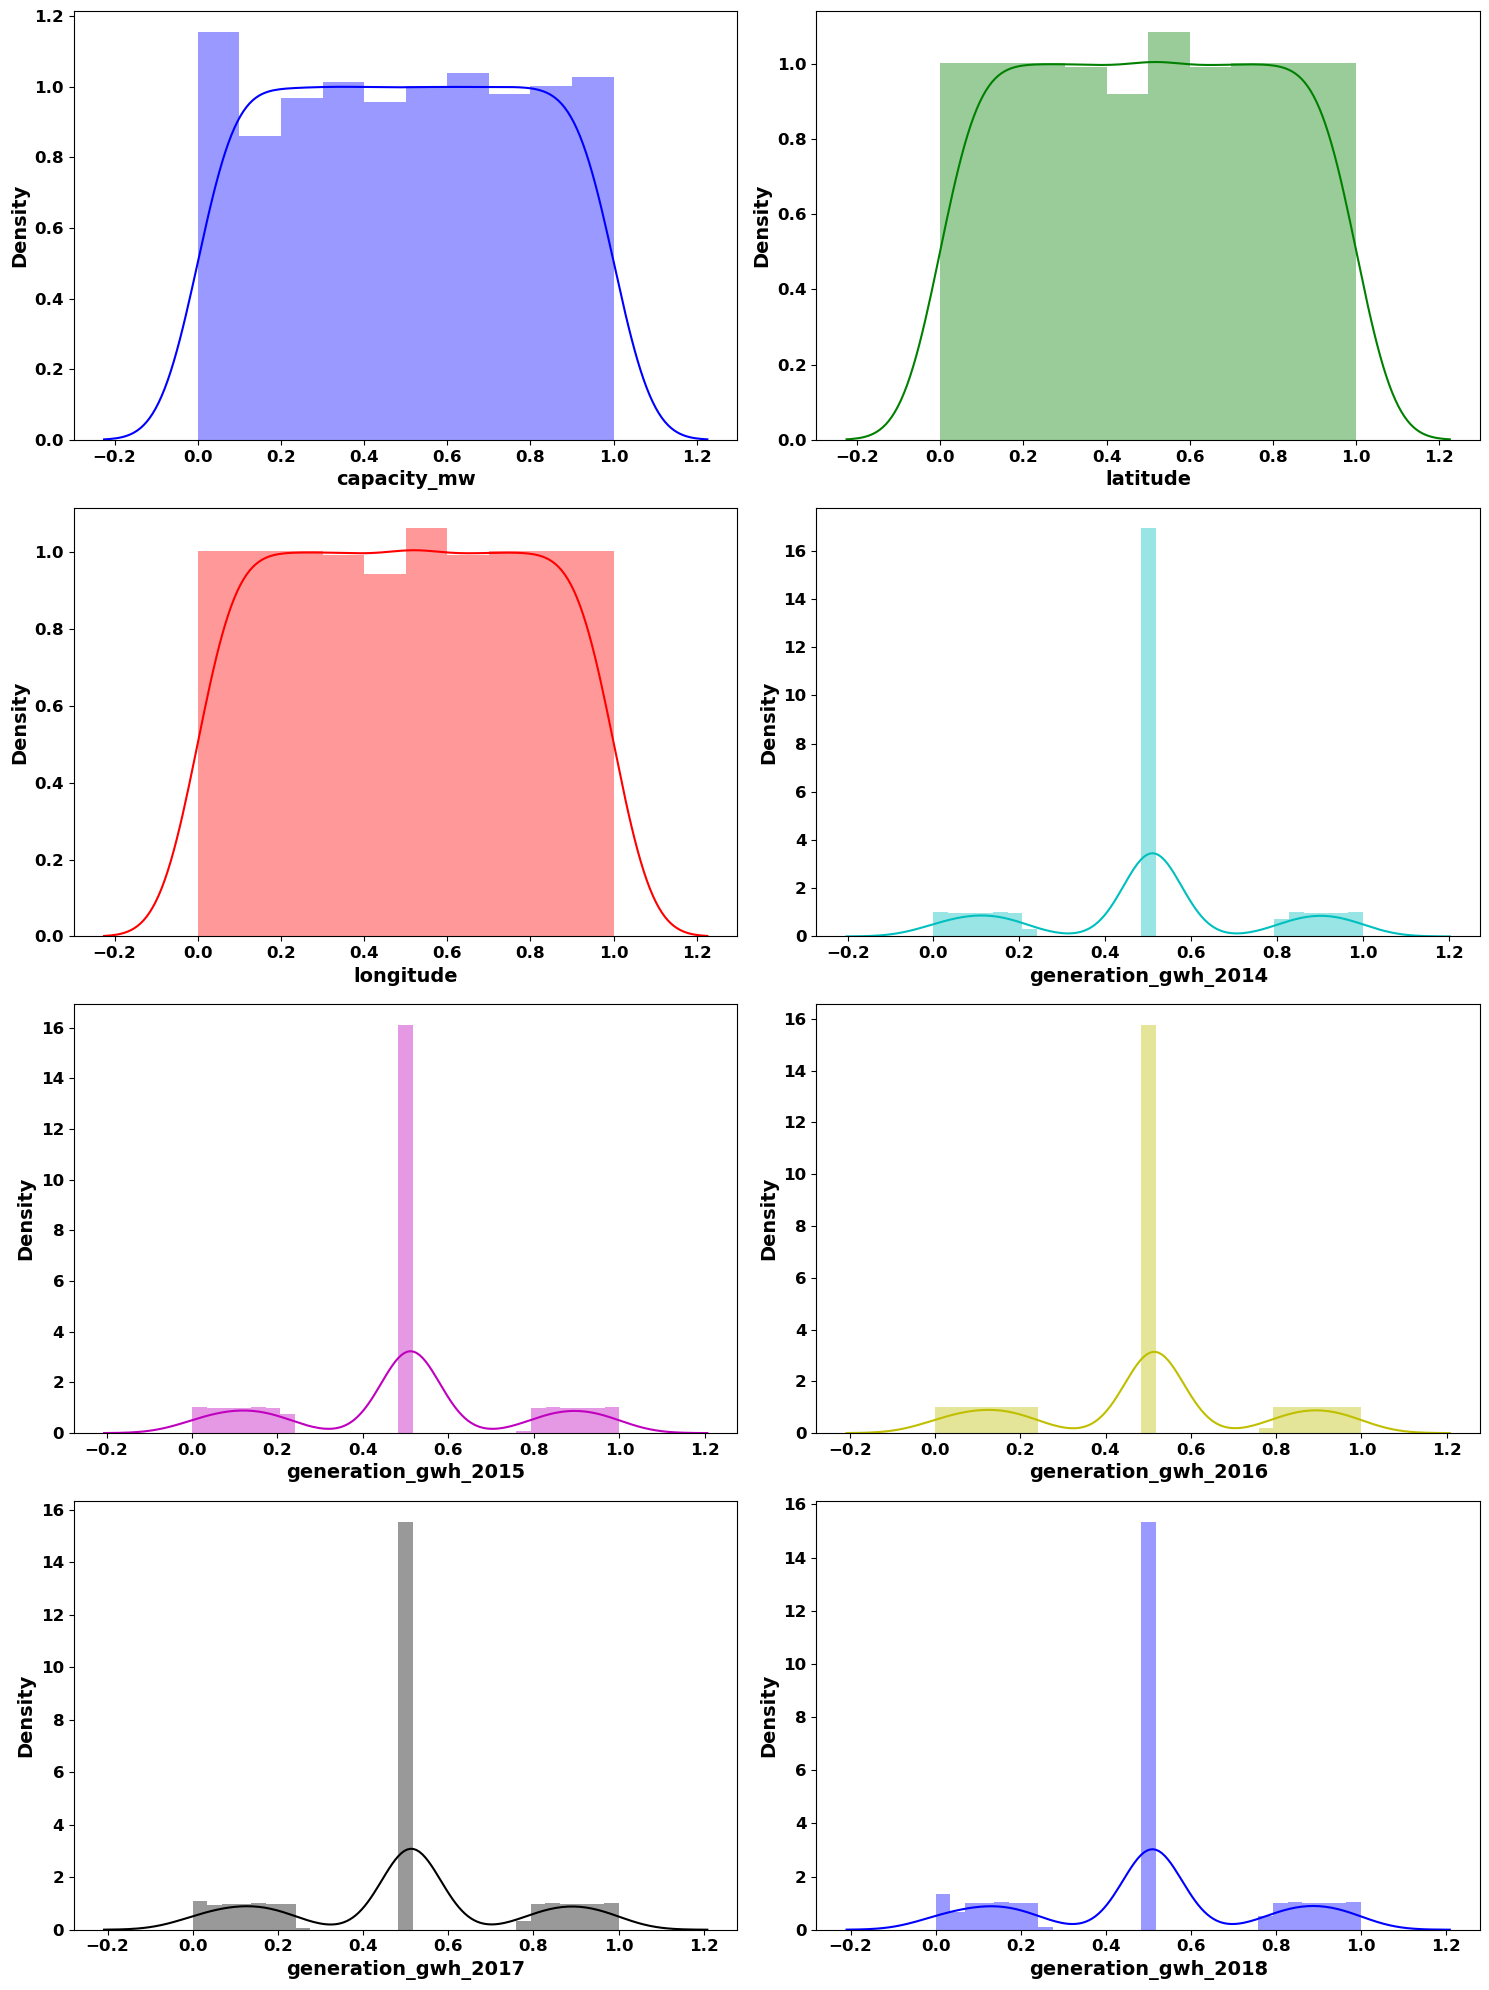

In [153]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [154]:
x_clas.shape

(848, 9)

In [155]:
x_clas.tail(5) # x data including both numerical and categorical features

capacity_mw  latitude  longitude  generation_gwh_2014  \
902        120.0   16.7739    80.0525           844.113738   
903       1500.0   13.2371    80.3023          5337.310000   
904          4.5   12.2135    77.0225           844.113738   
905        460.0   20.9099    85.2072          3382.000000   
906         50.0   21.8948    76.6814           844.113738   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
902            749.26485              12.9350             6.567000   
903           7130.50700            8564.3790          6605.259000   
904            749.26485             827.7405           868.042975   
905           3362.00000            3359.0000          3384.000000   
906            749.26485             827.7405           868.042975   

     generation_gwh_2018  commissioning_year  
902             17.21350              2017.0  
903           7111.42000              2013.0  
904            833.70055              2003.0  
905           3224.00000              1974.0  
906            833.70055              2015.0

In [156]:
new_x=x_clas.reset_index(drop=True)  # reset the index of x data

In [157]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

capacity_mw  latitude  longitude  generation_gwh_2014  \
843        120.0   16.7739    80.0525           844.113738   
844       1500.0   13.2371    80.3023          5337.310000   
845          4.5   12.2135    77.0225           844.113738   
846        460.0   20.9099    85.2072          3382.000000   
847         50.0   21.8948    76.6814           844.113738   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
843            749.26485              12.9350             6.567000   
844           7130.50700            8564.3790          6605.259000   
845            749.26485             827.7405           868.042975   
846           3362.00000            3359.0000          3384.000000   
847            749.26485             827.7405           868.042975   

     generation_gwh_2018  commissioning_year  
843             17.21350              2017.0  
844           7111.42000              2013.0  
845            833.70055              2003.0  
846           3224.00000              1974.0  
847            833.70055              2015.0

In [158]:
x_qtr.head(5)  # Transformed numerical data

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0     0.804604  0.474616   0.099174             0.510035             0.511216   
1     0.967532  0.433294   0.700118             0.868949             0.958678   
2     0.238489  0.690673   0.082645             0.510035             0.511216   
3     0.370720  0.517710   0.520071             0.510035             0.511216   
4     0.981110  0.902007   0.227863             0.998819             0.952774   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0             0.062574             0.190083             0.194805   
1             0.841795             0.922078             0.914994   
2             0.514168             0.512987             0.510035   
3             0.514168             0.512987             0.510035   
4             0.927981             0.926800             0.965762   

   commissioning_year  
0            0.967532  
1            0.468713  
2            0.717237  
3            0.468713  
4            0.291027

In [159]:
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [160]:
new_x.shape

(848, 9)

In [161]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

## Scaling data

In [162]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0     1.053589 -0.087843  -1.386961             0.040673             0.044336   
1     1.617336 -0.230827   0.692452             1.422841             1.739269   
2    -0.905226  0.659761  -1.444155             0.040673             0.044336   
3    -0.447692  0.061269   0.069445             0.040673             0.044336   
4     1.664314  1.391025  -0.941664             1.922967             1.716908   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            -1.643919            -1.159180            -1.132525   
1             1.286427             1.582000             1.549036   
2             0.054350             0.050034             0.041207   
3             0.054350             0.050034             0.041207   
4             1.610541             1.599685             1.738064   

   commissioning_year  
0            1.714375  
1           -0.114779  
2            0.796551  
3           -0.114779  
4           -0.766347

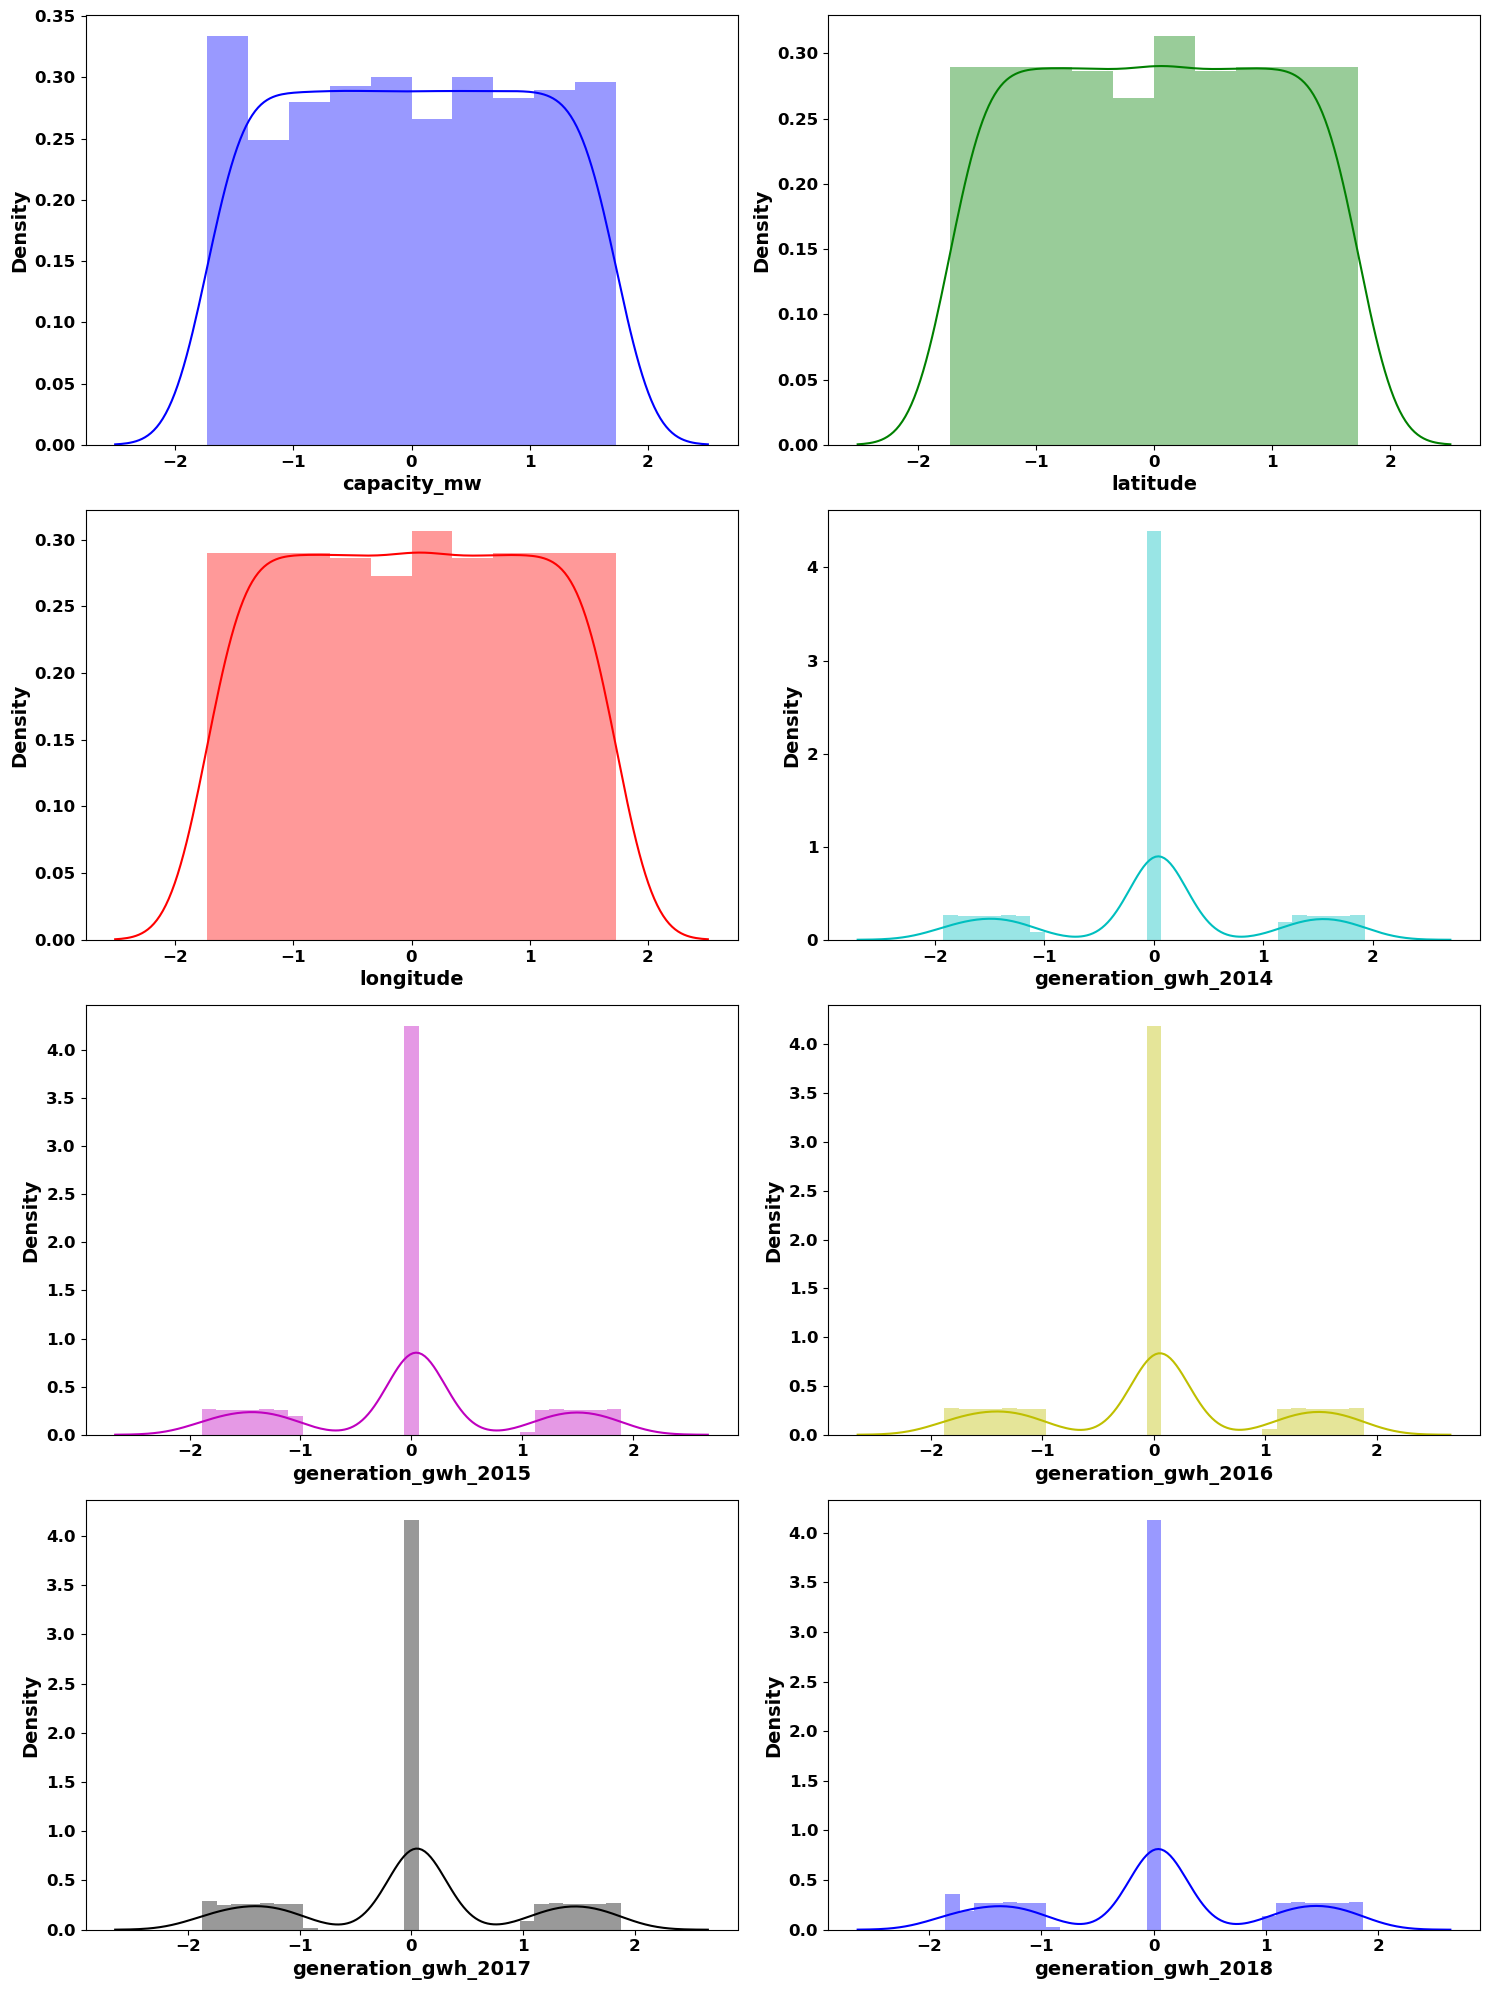

In [163]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=8:
        plt.subplot(4,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [164]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

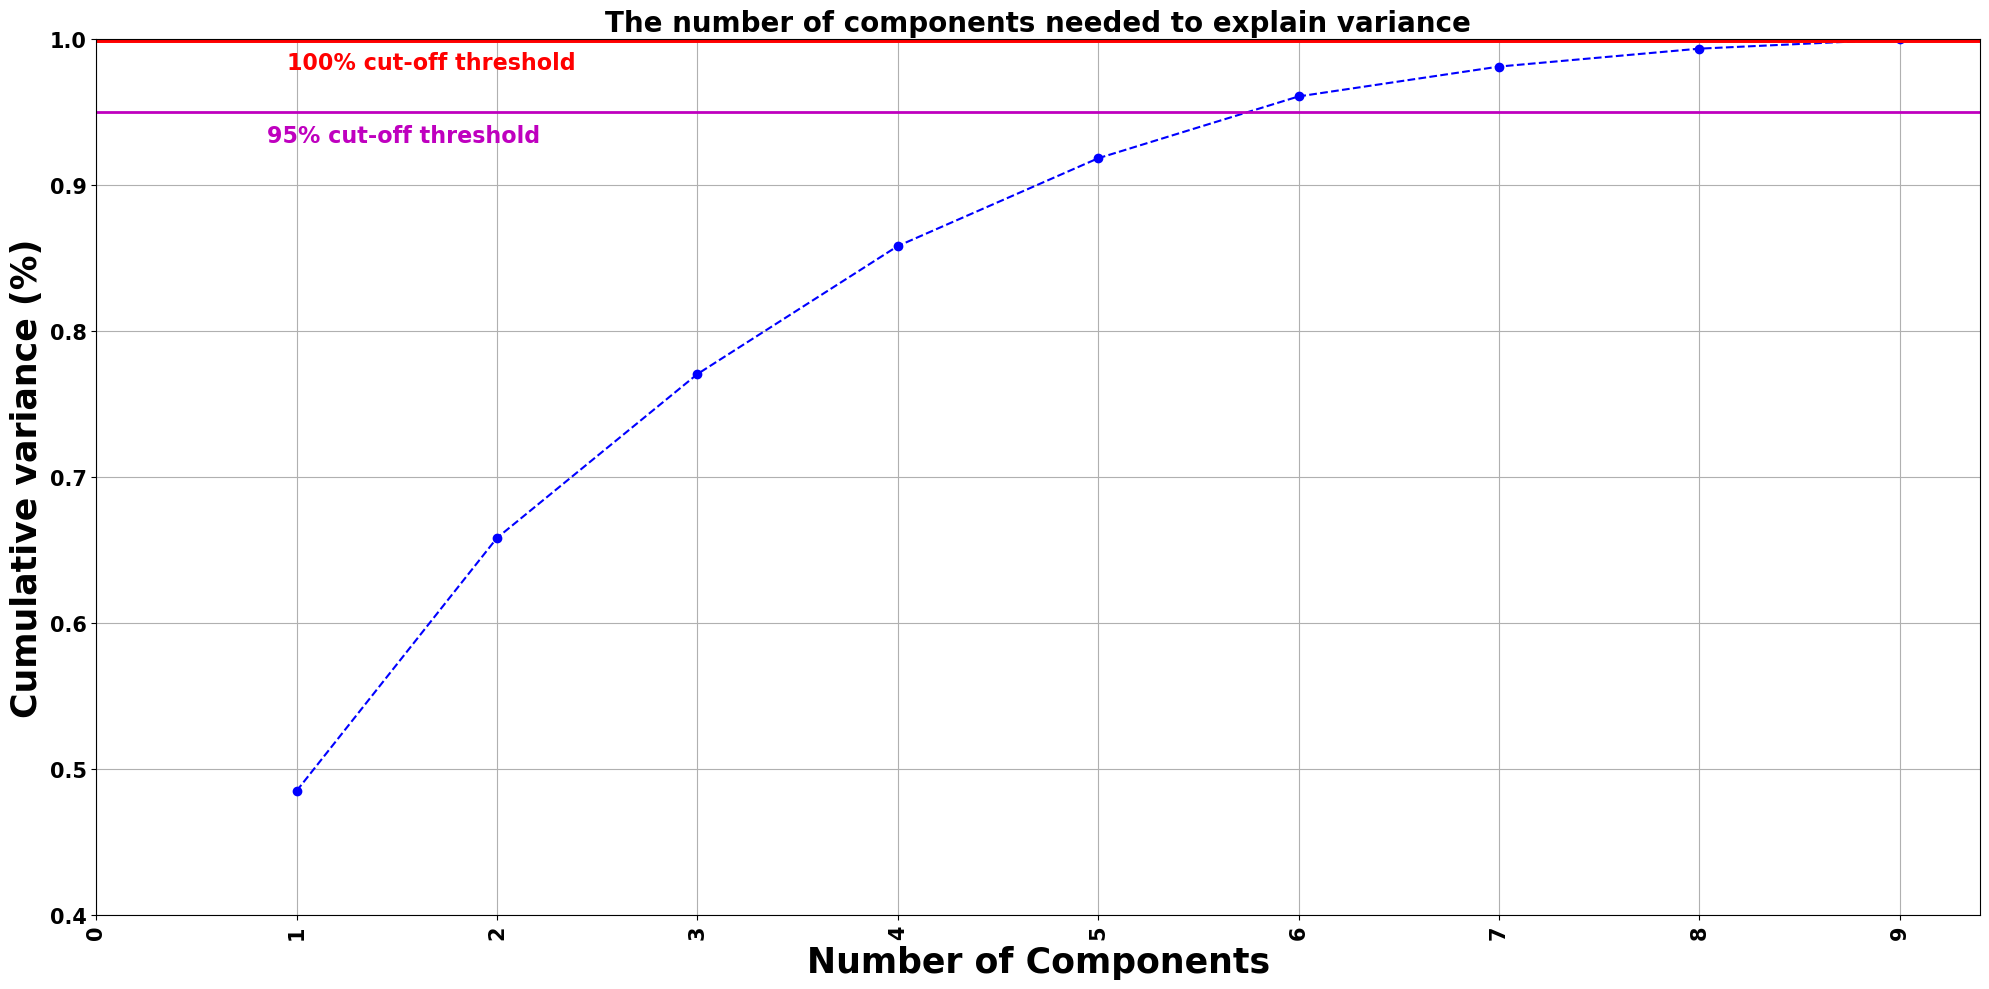

In [165]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 6 principal components attribute for 95% of variation in the data. Hence I will pick 6 components for our prediction**
- **I will use 6 features as no. of components in PCA to reduce the dimensions**

In [166]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=6)
x_clas=pca.fit_transform(x)
x_clas=pd.DataFrame(x_clas)
x_clas.head()

0         1         2         3         4         5
0 -1.530706 -0.980426  0.178487  0.249507  2.260653 -1.455515
1  3.582758  1.160821 -0.394929  0.104801  0.504921 -0.182016
2  0.005622 -1.865315  0.649770 -0.215661  0.173178  0.071165
3  0.031198 -0.173239  0.007671 -0.049253 -0.444214  0.045112
4  4.085921  0.458064  1.626834 -0.882380  0.767740 -0.090159

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 6 dimensions. This X data can be used for model training**

## Checking Multicollinearity again after PCA transformation

In [167]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_clas[list(x_clas.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
0  1.0       0
2  1.0       2
3  1.0       3
4  1.0       4
5  1.0       5
1  1.0       1

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [168]:
y_clas.shape

(848,)

In [169]:
x_clas.shape

(848, 6)

# Model Building - REGRESSION

- **Starting with "LinearRegression" to build the model**

In [169]:
x=x_reg
y=y_reg

In [170]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
1           622          42.078273         42.100536                0.022264
3           909          41.954301         41.981889                0.027589
2           810          42.066038         42.124380                0.058342
0           331          42.080796         42.140812                0.060016

#### Observations:
- **From the above table, as multple random states give same training and testing accuarcy scores, taking one of this  from the below code**

In [171]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

622

#### Observation:
- **Considering random state=622 for the model building**

In [172]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [173]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.42100536413495704
Mean Absolute Error(MAE) :  230.5632891863374
Mean Squared Error(MSE) :  124372.55783371274
Root Mean Squared Error(RMSE) :  352.6649370630893


## Cross Validation for Linear Regression

In [174]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the delta is small between cross validation score and model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


No of Folds  Cross Validation R2 Score  Model R2 Score  \
3            5                  41.550285       42.100536   
8           10                  41.503359       42.100536   
5            7                  41.022431       42.100536   
1            3                  41.018882       42.100536   
0            2                  40.906592       42.100536   
2            4                  40.858642       42.100536   
6            8                  40.801107       42.100536   
4            6                  40.654415       42.100536   
7            9                  39.918319       42.100536   

   Difference in R2 Score  
3                0.005503  
8                0.005972  
5                0.010781  
1                0.010817  
0                0.011939  
2                0.012419  
6                0.012994  
4                0.014461  
7                0.021822

#### Observations: 
- **Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=10 from the above table**

In [175]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

5

In [176]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 41.55028485156776 
The model r2 score is: 42.1005364134957
Difference is: 0.005502515619279447


## Other Regression Algorithms

In [177]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Model R2 Score"]<100].sort_values(by=["Model R2 Score"],ascending=False)  # sorting the score table using model score

Table with performance of the models


Model  Model R2 Score  Cross Validation R2 Score  \
12               XGBRegressor()       75.073815                  68.793093   
9         ExtraTreesRegressor()       74.853782                  73.781642   
8       RandomForestRegressor()       74.633773                  72.977665   
10  GradientBoostingRegressor()       73.354412                  71.919644   
1       DecisionTreeRegressor()       72.331058                  54.902621   
2         KNeighborsRegressor()       68.832561                  71.468203   
11          AdaBoostRegressor()       55.918457                  48.530726   
0            LinearRegression()       42.100536                  41.550285   
6                       Ridge()       42.097293                  41.552711   
5                       Lasso()       42.078556                  41.546314   
3                SGDRegressor()       42.039113                  41.646106   
7                  ElasticNet()       40.119739                  40.463026   
4                         SVR()       -2.844398                  -2.599463   

    Difference in R2 Score         MAE            MSE        RMSE  
12                0.062807  108.256608   53543.387375  231.394441  
9                 0.010721  109.977921   54016.035327  232.413501  
8                 0.016561  110.447469   54488.630476  233.427998  
10                0.014348  111.650649   57236.798825  239.242134  
1                 0.174284  112.138706   59435.043096  243.793033  
2                 0.026356  121.719185   66950.086151  258.747147  
11                0.073877  250.013065   94690.588359  307.718359  
0                 0.005503  230.563289  124372.557834  352.664937  
6                 0.005446  230.567849  124379.524874  352.674815  
5                 0.005322  230.690510  124419.772875  352.731871  
3                 0.003930  232.126780  124504.499534  352.851951  
7                 0.003433  235.701741  128627.464858  358.646713  
4                 0.002449  227.110863  220917.777215  470.018912

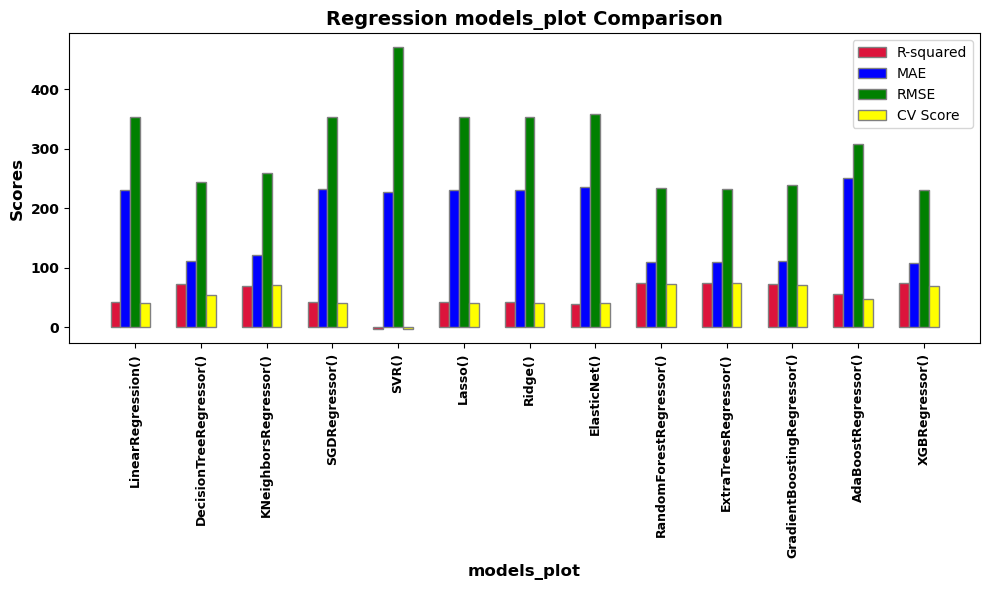

In [178]:
# Plotting all models_plot metrics
models_plot = ['LinearRegression()','DecisionTreeRegressor()','KNeighborsRegressor()','SGDRegressor()','SVR()','Lasso()','Ridge()','ElasticNet()',
          'RandomForestRegressor()','ExtraTreesRegressor()','GradientBoostingRegressor()','AdaBoostRegressor()','XGBRegressor()']

barWidth = 0.15 # set width of bars

# set heights of bars
r2_bar = Model_Score
mae_bar = MAE
RMSE_bar = RMSE
cv_bar = CV_Score

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]

# define colors for each bar
colors = ['crimson','blue','green', 'yellow', 'magenta']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(10,6))

# create bar plots with defined colors
ax.bar(pos1, r2_bar, color=colors[0], width=barWidth, edgecolor='grey', label='R-squared')
ax.bar(pos2, mae_bar, color=colors[1], width=barWidth, edgecolor='grey', label='MAE')
ax.bar(pos3, RMSE_bar, color=colors[2], width=barWidth, edgecolor='grey', label='RMSE')
ax.bar(pos4, cv_bar, color=colors[3], width=barWidth, edgecolor='grey', label='CV Score')

# add labels and title
plt.title('Regression models_plot Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### Observations: 
- **Based on the r2 score, RMSE values along with cross-validation scores for multiple models, I have considered "ExtraTreesRegressor()" is the best model as the ExtraTreesRegressor. XGBRegressor is also equally performing well along with ExtraTreeRegressor but cross-validation score is less compared to ExtraTreeRegressor hence considered ExtraTreeRegressor as the best model among all the models** 
- **Hyper parameter tuning will be pefromed for "ExtraTreesRegressor()"**

## Hyper Parameter Tuning

In [183]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesRegressor

# Number of trees in Extra Tree
n_estimators = [50,100,200,300,500,1000]
# Scoring criterion
criterion=["squared_error", "absolute_error", "friedman_mse"]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,3,4,5,7,9,10,20]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,6,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5,6,7]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [184]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'absolute_error',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [185]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesRegressor(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : ExtraTreesRegressor")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : ExtraTreesRegressor
R2 Score :  0.7310500123479258
Mean Absolute Error(MAE) :  103.19944774285713
Mean Squared Error(MSE) :  57772.55232020966
Root Mean Squared Error(RMSE) :  240.35921517638897


In [186]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: 75.03117022157076 
The model R2 score is: 73.10500123479258
Difference is: -0.019261689867781873


#### Observations for Hyper Parameter Tuning: 
- **Hyper Parameter Tuned model has slighlty lower R2 score and close cross-validation scores compared to the model with default parameters for ExtraTreesRegressor, hence considered the final model with default parameters for saving, however the delta is very small (with-in 2%)**
- **Considering the ExtraTreeRegressor() model with default parameters as the best and final model for saving**

## Model Saving - Regression

In [179]:
import pickle
filename='Global-Power-Plant-Database-Regression.pkl'
pickle.dump(models[8][1], open(filename,'wb'))  # saving the Hyper Parameter Tuned ExtraTreeRegressor model

## Conclusion - Prediction from Regression Model

In [182]:
loaded_model=pickle.load(open('Global-Power-Plant-Database-Regression.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion.head(10)

74.8537818551198


Predicted  Original
0    95.20000      30.0
1     5.00000       5.0
2   303.91800     768.0
3    65.44700      23.1
4    11.79000      10.5
5    70.49400      35.2
6    64.89000      50.4
7  1124.52744     540.0
8   123.43800     290.0
9   650.74572     500.0

 True Values Vs Predicted Values plot :


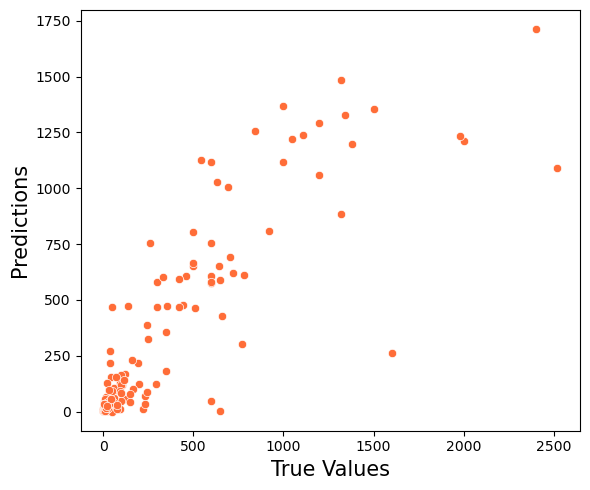

In [199]:
plt.figure(figsize=(6,5))
sns.scatterplot(y_test.round(2), Predicted)
print('\033[1m'+' True Values Vs Predicted Values plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Model Building - Multi-Class CLASSIFICATION

- **Here I didn't balance the dataset as the target variable "primary_fuel" has many classes. Instead of using "accuracy_score", I will use "ROC AUC Score", "F1_Score", "Precision", "Recall" as main metrics to decide the best model**
- **For imbalanced datasets, "ROC AUC Score", "F1_Score", "Precision", "Recall" are generally better metrics than accuracy score to evaluate the performance of a machine learning model.**
- **The reason for this is that accuracy score can be misleading in the presence of class imbalance, as a model that simply predicts the majority class for every sample can achieve a high accuracy score, even if it performs poorly on the minority class(es).**
- **ROC AUC Score is a good indicator of the model's ability to distinguish between positive and negative classes, even when the class distribution is imbalanced. ROC AUC Score takes into account the true positive rate (TPR) and false positive rate (FPR) at different classification thresholds, regardless of the class distribution. This means that even if the number of samples in the minority class is very small, the ROC AUC score will give a good indication of how well the model can distinguish between positive and negative classes.**
- **F1 score takes into account both precision and recall, and provides a better measure of overall performance that is not affected by class imbalance. By calculating the F1 score for each class separately and then taking the weighted average, where the weights are the number of samples in each class, we can get a better sense of how well the model is performing on each class, including the minority class(es). F1 score takes into account both precision and recall, which are metrics that focus on the performance of the model on the minority class. Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positive instances. F1 score is the harmonic mean of precision and recall, and it balances between these two metrics. This means that F1 score provides a more meaningful evaluation of the model's performance, especially when the dataset is imbalanced. A higher F1 score indicates that the model has a better balance between precision and recall, which is crucial when the minority class is of interest.**
- **I didn'try Logistic Regression first as the target variable "region" has more than 2 classes, hence starting with DecisionTreeClassifier to findout the best random state**

In [170]:
x=x_clas
y=y_clas

Best random state: 413, Best ROC AUC Score: 85.49


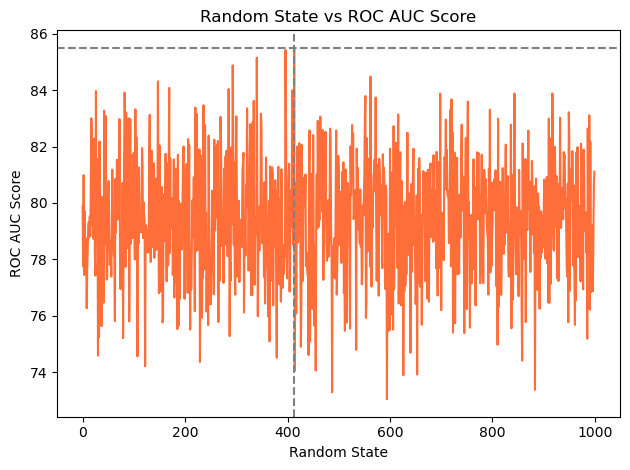

In [171]:
# Defining the required libraries
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve


dtc=DecisionTreeClassifier()  # Defining instance for DecisionTreeClassifier

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i,stratify=y)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    
    # Predict probabilities of the test set using the trained model
    y_prob = dtc.predict_proba(x_test)
    score = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")


    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best ROC AUC Score: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('ROC AUC Score')
plt.title('Random State vs ROC AUC Score')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [172]:
# Best Random State
BRS=best_random_state
BRS

413

#### Observations: 
- **From the above plot, best random state is 413 where testing ROC AUC Score is high. This random state will be used for buidling all classification models**

In [173]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS,stratify=y)

In [183]:
# Training the model and checking  classification metrics with the fixed random state
dtc.fit(x_train,y_train)
pred_test=dtc.predict(x_test)
y_prob = dtc.predict_proba(x_test)

roc_auc_score_sel=roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")*100,1))
f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
accu_score_sel=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))

ROC AUC Score: 84.9
F1 Score: 74.5
Precision Score: 75.1
Recall Score: 75.3
Accuracy Score: 75.3


In [184]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.84      0.79      0.81        47
           2       0.54      0.54      0.54        13
           3       0.83      0.91      0.87        44
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.63      0.76      0.69        25
           7       0.71      0.68      0.69        25

    accuracy                           0.75       170
   macro avg       0.66      0.58      0.59       170
weighted avg       0.75      0.75      0.75       170



In [185]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[ 7  1  0  0  0  0  0  2]
 [ 1 37  2  4  0  0  2  1]
 [ 0  1  7  3  0  0  1  1]
 [ 0  1  2 40  0  0  1  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  2  0  0  1  0  0]
 [ 1  2  0  0  0  0 19  3]
 [ 1  0  0  0  0  0  7 17]]


## Cross Validation for Decision Tree Classifier

- **Finding the best no. folds where the delta is least between cross validation and model scores.**
- **Used scoring parameter as 'roc_auc' in cross-validation**

Model score: 84.9246
CV score with 2 folds: 70.9644
CV score with 3 folds: 73.8421
CV score with 4 folds: 74.3049
CV score with 5 folds: 72.3063
CV score with 6 folds: 73.0167
CV score with 7 folds: 74.6432
CV score with 8 folds: 73.4522
CV score with 9 folds: 74.4810
Best number of folds: 7


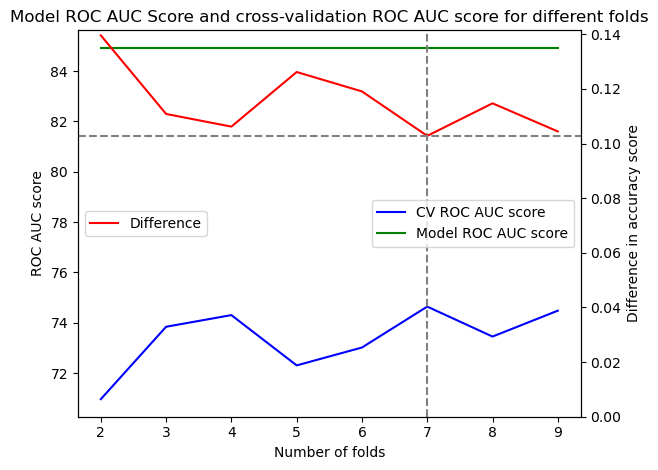

In [191]:
from sklearn.model_selection  import cross_val_score

pred_lr=dtc.predict(x_test)
y_prob = dtc.predict_proba(x_test)
lss=roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

# Finding the optimized folds from Decision Tree Classifier where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 10)

for j in folds_range:
    lsscore=cross_val_score(dtc,x,y,cv=j,scoring='roc_auc_ovr')
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='CV ROC AUC score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model ROC AUC score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('ROC AUC score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in accuracy score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model ROC AUC Score and cross-validation ROC AUC score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [192]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

7

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=10**

In [194]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore = cross_val_score(dtc, x, y, cv=BCV,scoring='roc_auc_ovr')
lsscore_selected = lsscore.mean()

print("CV ROC AUC scores for each fold are: ", lsscore*100)
print("Mean CV ROC AUC score:", round(lsscore_selected*100,1))
print("Model ROC AUC score:", round(lss*100,1))
print("Difference in ROC AUC Scores:", round(lss-lsscore_selected,5))

y_prob = dtc.predict_proba(x_test)

f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
accu_score_sel=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))

CV ROC AUC scores for each fold are:  [70.4912481  74.725543   76.22726059 73.55879793 74.76945126 71.81842363
 76.57829386]
Mean CV ROC AUC score: 74.0
Model ROC AUC score: 84.9
Difference in ROC AUC Scores: 0.109
F1 Score: 74.5
Precision Score: 75.1
Recall Score: 75.3
Accuracy Score: 75.3


## Other Classification Algorithms

In [196]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

# Defining the list with all Algorithms

models=[('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier(loss='log')),
        ('SVC()',SVC(probability=True)),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining lists with defaul model
Model=[dtc]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
F1_Scores=[round(f1_Score_sel*100,1)]
precision_scores=[round(precision_score_sel*100,1)]
recall_scores=[round(recall_score_sel*100,1)]
accu_scores=[round(accu_score_sel*100,1)]


# Loop for all algorithms to train the model and for the cross validation
for model in models:    
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    F1_Scores.append(round(f1_score(y_test,pred_test, average='weighted')*100,1))  # Appending "F1 score" to the list
    precision_scores.append(round(precision_score(y_test,pred_test, average='weighted')*100,1))  # Appending "precision score" to the list
    recall_scores.append(round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Appending "recall score" to the list
    accu_scores.append(round(accuracy_score(y_test,pred_test)*100,1))  # Appending "Accuracy score" to the list
    
    y_prob = model[1].predict_proba(x_test)
    Model_Score.append(round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")*100,1))  # Appending "roc auc score" to the list
    
    print('\n')
    print('\033[1m'+'Metrics for Model:', model[0], ':'+'\033[0m\n')
    print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")*100,1)) # Printing "roc auc_score"
    print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))        # Printing "f1_score"
    print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1)) # Printing "precision_score"
    print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Printing "recall_score"
    print("Accuracy Score:", round(accuracy_score(y_test,pred_test)*100,1))               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*80)    

    cvscore=cross_val_score(model[1],x,y,cv=BCV,scoring='roc_auc_ovr')               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation      
    
    print('\033[1m'+'Cross Validation Score for Model:', model[0], ':'+'\033[0m\n')
    print("CV ROC AUC scores for each fold are: ", cvscore*100)
    print("Mean CV ROC AUC score:", round(score*100,1))
    print('\n')
    print('='*80)
    
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'AUC-ROC': Model_Score,
                          'CV score': CV_Score,
                          'F1-score': F1_Scores,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'Accuracy': accu_scores,
                          'Difference in ROC AUC Scores':Difference})

print("Table with performance of the models")
scores_df.sort_values(by=["AUC-ROC"],ascending=False)  # sorting the score table using the model score



Metrics for Model: KNeighborsClassifier() :

ROC AUC Score: 92.8
F1 Score: 72.8
Precision Score: 73.5
Recall Score: 73.5
Accuracy Score: 73.5
Confusion Matrix:
[[ 8  1  0  0  0  0  0  1]
 [ 3 39  2  3  0  0  0  0]
 [ 0  4  6  2  0  0  0  1]
 [ 0  5  2 37  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  1  0  1  0  0]
 [ 1  1  0  0  0  0 17  6]
 [ 2  0  1  0  0  0  5 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.74      0.83      0.78        47
           2       0.50      0.46      0.48        13
           3       0.86      0.84      0.85        44
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.77      0.68      0.72        25
           7       0.68      0.68      0.68        25

    accuracy                           0.74       170
   macro avg       0.64      0.57      0.57       170
we

Cross Validation Score for Model: GradientBoostingClassifier() :

CV ROC AUC scores for each fold are:  [81.0268117  92.426849   88.78587365 91.78124942 89.97313365 89.52972806
 87.46771188]
Mean CV ROC AUC score: 88.7




Metrics for Model: AdaBoostClassifier() :

ROC AUC Score: 78.1
F1 Score: 52.4
Precision Score: 53.6
Recall Score: 56.5
Accuracy Score: 56.5
Confusion Matrix:
[[ 0  0  0  0  0  1  3  6]
 [ 0 32  1  6  0  0  8  0]
 [ 0  2  1 10  0  0  0  0]
 [ 0  4  0 39  0  0  1  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  0]
 [ 0  0  0  1  0  6 18  0]
 [ 0  1  1  0  0  1 17  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.76      0.68      0.72        47
           2       0.33      0.08      0.12        13
           3       0.67      0.89      0.76        44
           4       0.00      0.00      0.00         2
           5       0.11      0.25      0.15         4


Model  AUC-ROC  CV score  F1-score  Precision  \
5        ExtraTreesClassifier()     95.6      90.8      82.7       83.3   
4      RandomForestClassifier()     94.6      91.4      79.3       79.2   
8               XGBClassifier()     94.6      91.4      76.9       76.5   
3                         SVC()     94.5      90.2      60.9       63.1   
6  GradientBoostingClassifier()     93.6      88.7      72.6       71.7   
1        KNeighborsClassifier()     92.8      84.9      72.8       73.5   
2               SGDClassifier()     86.0      85.5      54.5       51.8   
0      DecisionTreeClassifier()     84.9      74.0      74.5       75.1   
7          AdaBoostClassifier()     78.1      71.4      52.4       53.6   

   Recall  Accuracy  Difference in ROC AUC Scores  
5    83.5      83.5                      0.048196  
4    80.6      80.6                      0.032037  
8    77.6      77.6                      0.032158  
3    65.9      65.9                      0.042839  
6    75.3      75.3                      0.048581  
1    73.5      73.5                      0.078743  
2    58.8      58.8                      0.005292  
0    75.3      75.3                      0.109005  
7    56.5      56.5                      0.067066

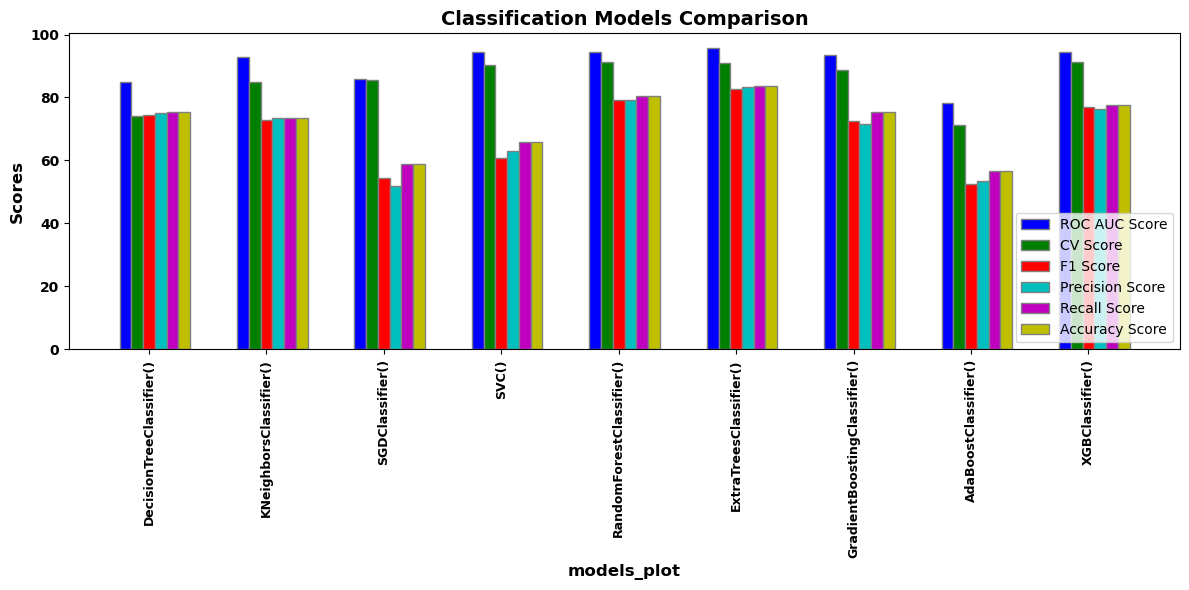

In [197]:
# Plotting all models_plot metrics
models_plot = ['DecisionTreeClassifier()','KNeighborsClassifier()','SGDClassifier()','SVC()','RandomForestClassifier()',
               'ExtraTreesClassifier()','GradientBoostingClassifier()','AdaBoostClassifier()','XGBClassifier()']


barWidth = 0.1 # set width of bars

# set heights of bars
roc_auc_bar = Model_Score
cv_bar = CV_Score
f1_bar = F1_Scores
precision_bar = precision_scores
recall_bar = recall_scores
accu_bar = accu_scores


# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]

# define colors for each bar
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(12,6))

# create bar plots with defined colors
ax.bar(pos1, roc_auc_bar, color=colors[0], width=barWidth, edgecolor='grey', label='ROC AUC Score')
ax.bar(pos2, cv_bar, color=colors[1], width=barWidth, edgecolor='grey', label='CV Score')
ax.bar(pos3, f1_bar, color=colors[2], width=barWidth, edgecolor='grey', label='F1 Score')
ax.bar(pos4, precision_bar, color=colors[3], width=barWidth, edgecolor='grey', label='Precision Score')
ax.bar(pos5, recall_bar, color=colors[4], width=barWidth, edgecolor='grey', label='Recall Score')
ax.bar(pos6, accu_bar, color=colors[5], width=barWidth, edgecolor='grey', label='Accuracy Score')


# add labels and title
plt.title('Classification Models Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
# plt.legend()
plt.legend(fontsize='10', title_fontsize='10',loc="lower right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations: 
- **We can see that ExtraTreesClassifier() gives us maximum ROC AUC Score, F1 score, Recall Score, Precision Score and Accuracy score along with max cross-validation score compared to remaining models.**
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier()**

## Hyper Parameter Tuning

In [198]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [200]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,scoring='roc_auc_ovr', n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [202]:
# Training the model using best parameters from GridSearchCV and checking the metrics and cross validation score
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

cvscores = cross_val_score(ht_model, x, y, cv=BCV,scoring='roc_auc_ovr')
score = cvscores.mean()
y_prob = ht_model.predict_proba(x_test)
ms=roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

print("Model ROC AUC score:", round(ms*100,1))
print("CV ROC AUC scores for each fold are: ", cvscores*100)
print("CV Mean ROC AUC score:", round(score*100,1))
print("Difference in ROC AUC Scores:", round(ms-score,5))
print("F1 Score:",round(f1_score(y_test,pred, average='weighted')*100,1))
print("Precision Score:",round(precision_score(y_test,pred, average='weighted')*100,1))
print("Recall Score:",round(recall_score(y_test,pred, average='weighted')*100,1))
print("Accuracy Score:",round(accuracy_score(y_test,pred)*100,1))
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("Classification Report:")
print(classification_report(y_test,pred))

Model ROC AUC score: 94.7
CV ROC AUC scores for each fold are:  [90.87051317 93.85277911 95.22604318 93.08559536 91.13615338 89.72563611
 90.92156299]
CV Mean ROC AUC score: 92.1
Difference in ROC AUC Scores: 0.02571
F1 Score: 64.4
Precision Score: 66.0
Recall Score: 70.0
Accuracy Score: 70.0
Confusion Matrix:
[[ 0  0  0  0  0  0  0 10]
 [ 0 40  0  2  0  0  4  1]
 [ 0  3  1  8  0  0  0  1]
 [ 0  4  0 40  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  2  0  0  0  1]
 [ 0  2  0  0  0  0 20  3]
 [ 0  1  0  0  0  0  6 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.75      0.85      0.80        47
           2       1.00      0.08      0.14        13
           3       0.77      0.91      0.83        44
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.67      0.80      0.73        25
           7   

### Observations for Hyper Parameter Tuning: 
- **ROC AUC Score, F1 score, Precision, Recall, Accuracy Score for the model with default parameters are better than the model with Hyper Parameter Tuning for ExtraTreesClassifier, hence considered the final model with default parameters for saving**

## ROC AUC Score

The below code calculates the ROC AUC (Area Under the Receiver Operating Characteristic Curve) score with a target variable that has more than two classes. It uses the roc_auc_score function from the scikit-learn library to calculate the ROC AUC score for one-vs-one and one-vs-rest methods with macro and weighted averaging.

The predict_proba method of the trained model is used to predict the probabilities of the test set, and the resulting probabilities are used to calculate the ROC AUC score.

The one-vs-one method calculates the ROC AUC score for each pair of classes, while the one-vs-rest method calculates the ROC AUC score for each class against the rest of the classes. Macro averaging calculates the ROC AUC score for each class separately and takes the unweighted average of those scores, while weighted averaging takes into account the class imbalance and calculates a weighted average of the ROC AUC scores.

The code prints the ROC AUC scores for each method with macro and weighted averaging, providing a way to evaluate the performance of the model on a multi-class classification problem.

In [203]:
y_train.nunique()

8

In [204]:
y_test.nunique()

8

In [205]:
from sklearn.metrics import roc_auc_score

# Predict probabilities of the test set using the trained model
y_prob = models[4][1].predict_proba(x_test)

# Calculate ROC AUC scores for one-vs-one and one-vs-rest methods, with macro and weighted averaging
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

# Print the ROC AUC scores for one-vs-one method with macro and weighted averaging
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

# Print a separator line
print("="*40)

# Print the ROC AUC scores for one-vs-rest method with macro and weighted averaging
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


One-vs-One ROC AUC scores:
0.902657 (macro),
0.919522 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.909173 (macro),
0.956040 (weighted by prevalence)


### Observations: 
- **Noticed very good different ROC AUC scores (One-Vs-One and One-Vs-Rest) for ExtraTreesClassifier model with default parameters, hence the decison of taking the ExtraTreesClassifier model with default parameters is further justified along with other metrics and cross-validation score, hence considered the final model with default parameters for saving**

## Model Saving - Classification

In [206]:
import pickle
filename='Global-Power-Plant-Database-Classification.pkl'
pickle.dump(models[4][1], open(filename,'wb')) # saving the ExtraTreesClassifier model

## Conclusion - Prediction from Classification Model

In [208]:
loaded_model=pickle.load(open('Global-Power-Plant-Database-Classification.pkl','rb'))
y_prob = loaded_model.predict_proba(x_test)
result=roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("Model Score:",round(result*100,1))

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head(10)

Model Score: 95.6


Predicted  Original
0          1         1
1          3         3
2          6         7
3          3         3
4          6         6
5          0         7
6          7         7
7          3         3
8          3         3
9          6         6

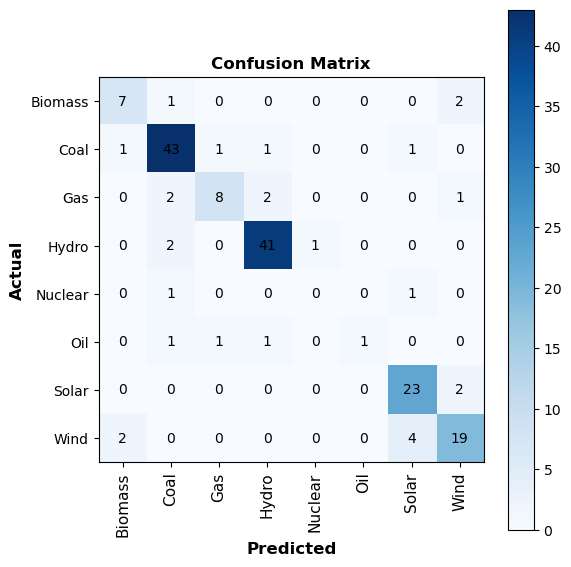

In [209]:
# Confusion Matrix for final saved model
pred=loaded_model.predict(x_test)
cm=confusion_matrix(y_test,pred)

# Target variable labels in the order
classes = ['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']

fig, ax = plt.subplots(figsize=(6, 6)) # create a figure and axis object
im = ax.imshow(cm, cmap='Blues')  # create a heatmap of the confusion matrix

# set axis labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xticks(fontsize=11,rotation=90)

# set labels for each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix",fontsize=12,fontweight ='bold')
ax.set_xlabel('Predicted',fontsize=12,fontweight ='bold')
ax.set_ylabel('Actual',fontsize=12,fontweight ='bold')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

## Overall Summary

- **Global Power Plant dataset was used to predict 2 datas: One was to predict the "capacity" of power plant and the other was to predict the "primary fuel" type used at power plant**

- **After getting the insights of Global Power Plant dataset, noticed many missing values in the dataset across most of the columns, hence instead of using simple imputer; I used various imputation techniques which considered the relationship among features to predict missing values however at the end, simple imputer gave good model accuracy/score values compared to other imputation techniques hence considered the imputed dataset from simple imputer. It may happen that the actual data doesn't exist also but I assumed here, the missing data is actually available but not provided.**

- **I applied multiple techniques to visulalize the entire dataset and got more indepth information about the data set**

- **I used various feature selection techniques to downselect the features for both regression and classification tasks**

- **I completed all EDA steps for the dataset to analyze the data for both regression and classification tasks and also recorded the observations after each step** 

### Regression:

- **Applied various algorithms and saved the best model on the basis of R2 score and RMSE score for regression model**

- **Applied various regression algorithms to predict the capacity of power plants, and found that ExtraTree Regressor is working well, on the basis of r2_score and less RMSE score**

- **Eventhough I applied techniques like Hyperparameter Tuning, Ensemble techniques and Regularization techniques, I could not     increase the score as there was insufficient and bad data in the dataset**

- **Selected ExtraTree Regressor as the final model because the RMSE score was very less and the R2 score was the highest among all.**

- **This dataset can be improved by providing the more data so that we can build good model with actual data instead of missing lot of data in most of the columns**

### Classification:

- **I applied classification algorithms to predict the primary fuel type and found that ExtraTreeClassifier algorithm was working well as it obtained maximum ROC AUC Score, F1 score, Precision Score, Recall Score, maximum accuracy score and maximum cross validation score compared to other algorithms** 

- **I tried to increase the accuracy by finding the best parameters during Hyperparameter Tuning technique but didn't notice any improvement compared to default model**

- **I can conclude that the dataset must be improved by adding more good data with lessskewness, less missing values, less number of errors in the data and with less number of outliers to get better predictions on regression and classification**